# Documentation for Assignment (2)

This assignment is consists of 2 main codes to evaluate the Joint Bailateral Upsampling and the Iterative upsampling algorithms to enhance the disparity map from the added noise as well as getting the information from a high resolution image which is the RGB image to make the low resolution image which is desparity map to be upsampled to a high resolution one.


A GUI is created to examine different sigma spatial and sigma spectral and as shown from the picture of the GUI; it is required to input 3 data which are the window size that affect the sigma spatial as sigma spatial is a function of window size. Also, it requires sigma spectral and output file name to save the produced images and the point clouds of JBU and IU.

In order to run the first program to execute the two algorithms:
./HelloWorld_Exec (image_1 path) (image_2 path) 

If you need to enter new window size and sigma spectral, press "Esc" to repeat the program again.

To run the code of computing the normals:
./surface_normal.py (radius of KDTreeSearch to compute normals) (number of neighboors)(path of the point cloud generated) (name of the output file with extension xyzn)


This documentation first includes the difference between the ground truth and the output from the JBU and the IU. It also includes evaluation of tweleve different pairs of images of some metrics as Sum of squared difference, Normalized cross correletion, and Structural similarity index with different window sizes and also with different sigma spectral. Moreover, a comparison between the time taken in the JBU and the IU in each pair is included.

Different window sizes are used with fixed sigma spectral which equals to 10, when the window size increases, the time taken increased and also the image got much blurry.

But when trying different sigma spectral with fixed window size which equals to 5, there is no effect on the time taken but the error between the ground truth and the output was much smaller than using different window sizes.

As observed that the JBU takes more time that the IU because the programming of JBU has a lot for loops and the IU is more compact. besides that, the output from the IU was much smoother but with a little bit blur in it.

Consequently, there are three files includes the point cloud and normals for pair 1, 4 and 12  which can be shown in meshlab.

In [ ]:
import sys
import numpy as np
import cv2
from PIL import Image
from SSIM_PIL import compare_ssim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## GUI Interface

Text(0.5, 1.0, 'GUI')

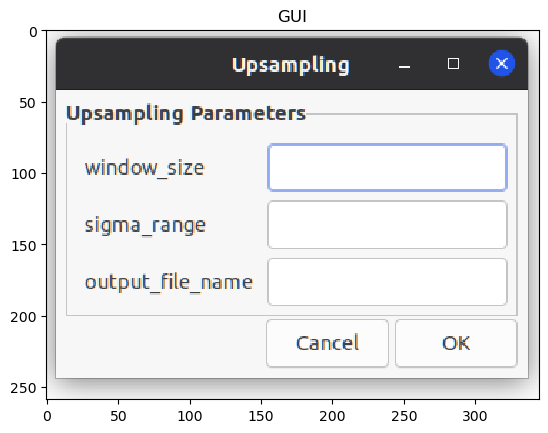

In [7]:
GUI=cv2.imread("../dataset/GUI.png")
plt.imshow(GUI)
plt.title("GUI")

In [2]:
def difference(image,gt):
    img=cv2.imread(image)
    ground_truth=cv2.imread(gt)
    output=cv2.subtract(img,ground_truth)
    return output

In [3]:
# Ground Truth
gt1=cv2.imread("../dataset/pair_1/disp1.png")
gt2=cv2.imread("../dataset/pair_2/disp1.png")
gt3=cv2.imread("../dataset/pair_3/disp1.png")
gt4=cv2.imread("../dataset/pair_4/disp1.png")
gt5=cv2.imread("../dataset/pair_5/disp1.png")
gt6=cv2.imread("../dataset/pair_6/disp1.png")
gt7=cv2.imread("../dataset/pair_7/disp1.png")
gt8=cv2.imread("../dataset/pair_8/disp1.png")
gt9=cv2.imread("../dataset/pair_9/disp1.png")
gt10=cv2.imread("../dataset/pair_10/disp1.png")
gt11=cv2.imread("../dataset/pair_11/disp1.png")
gt12=cv2.imread("../dataset/pair_12/disp1.png")

## Joint Bilateral Upsampling 

Difference between Output and the ground truth when window size is 11 and sigma spectral is 10

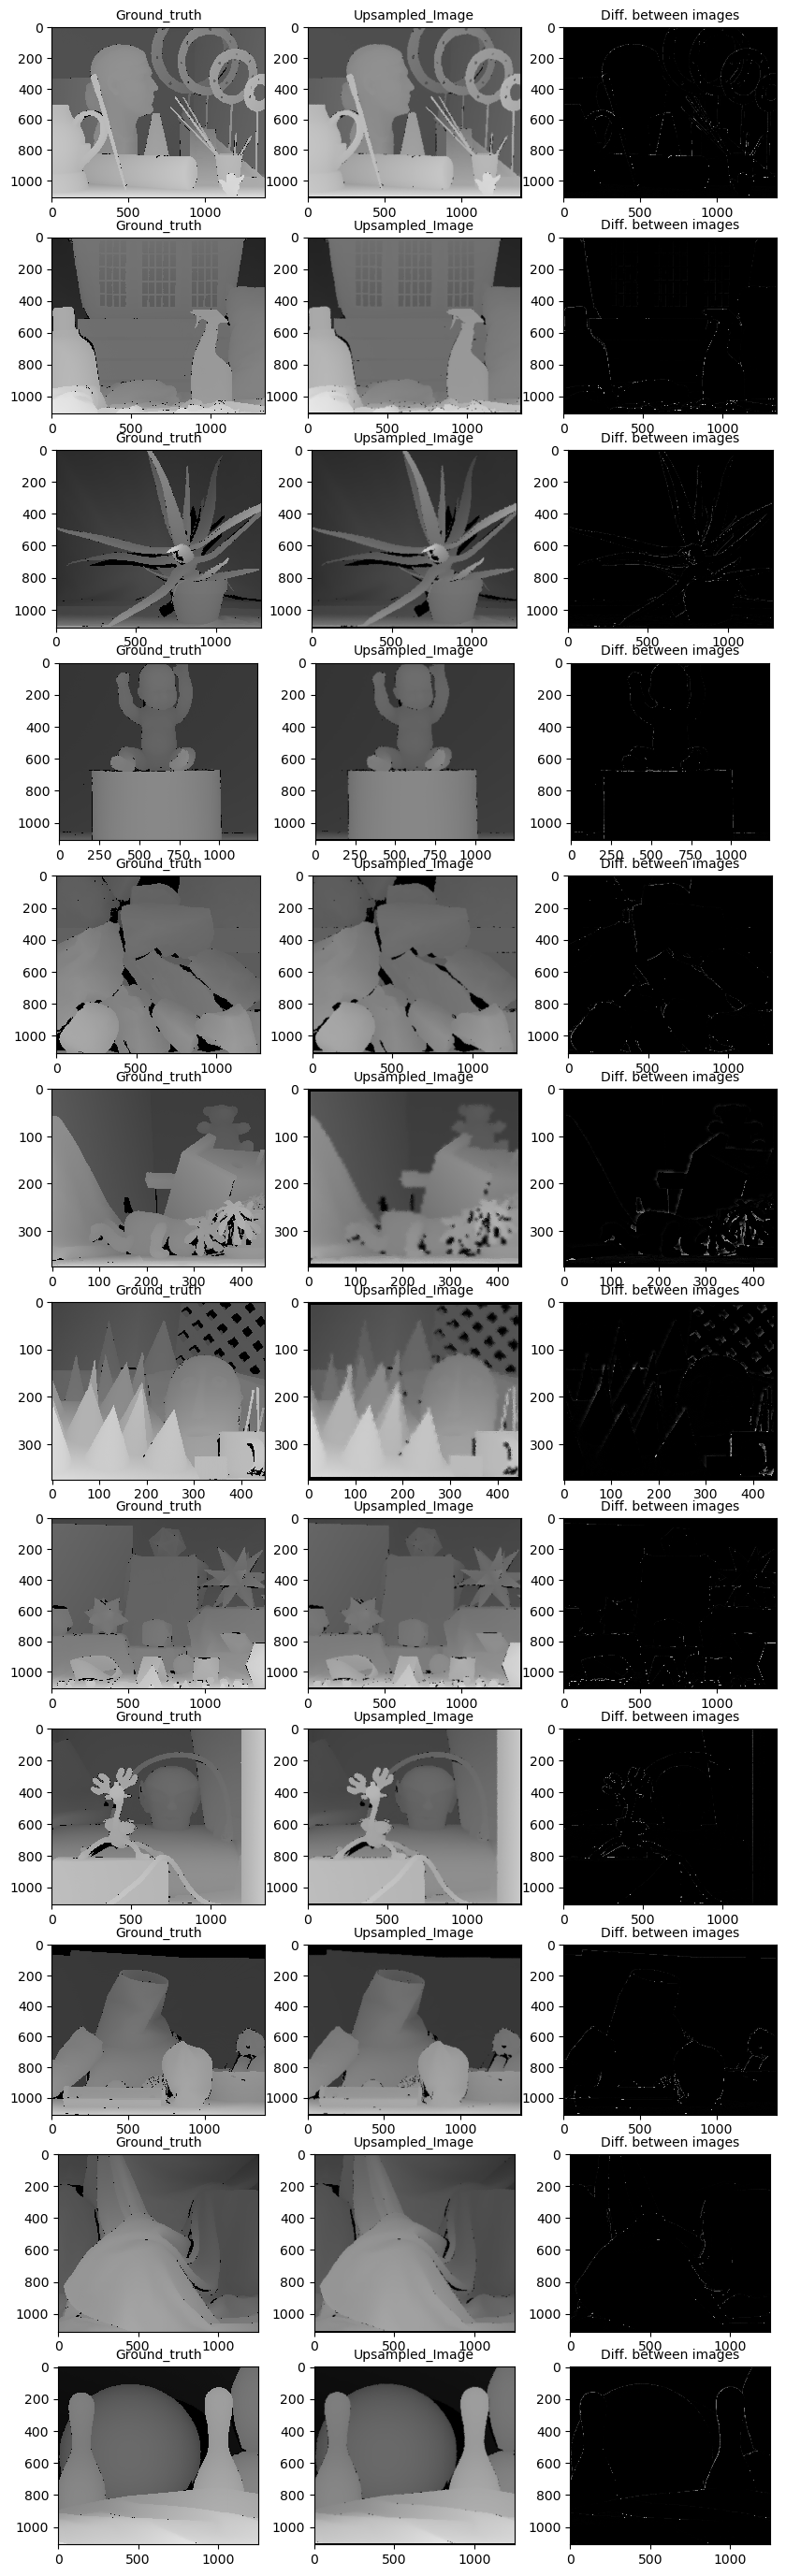

In [4]:
# Pair 1
jbu1=cv2.imread("../dataset/pair_1/results/window_size_11/pair1_11_10_JBU.png")
pair1=difference("../dataset/pair_1/results/window_size_11/pair1_11_10_JBU.png","../dataset/pair_1/disp1.png")

# Pair 2
jbu2=cv2.imread("../dataset/pair_2/results/window_size_11/pair2_11_10_JBU.png")
pair2=difference("../dataset/pair_2/results/window_size_11/pair2_11_10_JBU.png","../dataset/pair_2/disp1.png")

# Pair 3
jbu3=cv2.imread("../dataset/pair_3/results/window_size_11/pair3_11_10_JBU.png")
pair3=difference("../dataset/pair_3/results/window_size_11/pair3_11_10_JBU.png","../dataset/pair_3/disp1.png")

# Pair 4
jbu4=cv2.imread("../dataset/pair_4/results/window_size_11/pair4_11_10_JBU.png")
pair4=difference("../dataset/pair_4/results/window_size_11/pair4_11_10_JBU.png","../dataset/pair_4/disp1.png")

# Pair 5
jbu5=cv2.imread("../dataset/pair_5/results/window_size_11/pair5_11_10_JBU.png")
pair5=difference("../dataset/pair_5/results/window_size_11/pair5_11_10_JBU.png","../dataset/pair_5/disp1.png")

# Pair 6
jbu6=cv2.imread("../dataset/pair_6/results/window_size_11/pair6_11_10_JBU.png")
pair6=difference("../dataset/pair_6/results/window_size_11/pair6_11_10_JBU.png","../dataset/pair_6/disp1.png")

# Pair 7
jbu7=cv2.imread("../dataset/pair_7/results/window_size_11/pair7_11_10_JBU.png")
pair7=difference("../dataset/pair_7/results/window_size_11/pair7_11_10_JBU.png","../dataset/pair_7/disp1.png")

# Pair 8
jbu8=cv2.imread("../dataset/pair_8/results/window_size_11/pair8_11_10_JBU.png")
pair8=difference("../dataset/pair_8/results/window_size_11/pair8_11_10_JBU.png","../dataset/pair_8/disp1.png")

# Pair 9
jbu9=cv2.imread("../dataset/pair_9/results/window_size_11/pair9_11_10_JBU.png")
pair9=difference("../dataset/pair_9/results/window_size_11/pair9_11_10_JBU.png","../dataset/pair_9/disp1.png")

# Pair 11
jbu10=cv2.imread("../dataset/pair_10/results/window_size_11/pair10_11_10_JBU.png")
pair10=difference("../dataset/pair_10/results/window_size_11/pair10_11_10_JBU.png","../dataset/pair_10/disp1.png")

# Pair 15
jbu11=cv2.imread("../dataset/pair_11/results/window_size_11/pair11_11_10_JBU.png")
pair11=difference("../dataset/pair_11/results/window_size_11/pair11_11_10_JBU.png","../dataset/pair_11/disp1.png")

# Pair 17
jbu12=cv2.imread("../dataset/pair_12/results/window_size_11/pair12_11_10_JBU.png")
pair12=difference("../dataset/pair_12/results/window_size_11/pair12_11_10_JBU.png","../dataset/pair_12/disp1.png")

## Plot
f1 = plt.figure(figsize=(10, 35))
f1.add_subplot(12,3, 1)
plt.imshow(gt1,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 2)
plt.imshow(jbu1,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 3)
plt.imshow(pair1,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 4)
plt.imshow(gt2,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 5)
plt.imshow(jbu2,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 6)
plt.imshow(pair2,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 7)
plt.imshow(gt3,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 8)
plt.imshow(jbu3,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 9)
plt.imshow(pair3,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 10)
plt.imshow(gt4,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 11)
plt.imshow(jbu4,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 12)
plt.imshow(pair4,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 13)
plt.imshow(gt5,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 14)
plt.imshow(jbu5,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 15)
plt.imshow(pair5,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 16)
plt.imshow(gt6,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 17)
plt.imshow(jbu6,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 18)
plt.imshow(pair6,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 19)
plt.imshow(gt7,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 20)
plt.imshow(jbu7,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 21)
plt.imshow(pair7,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 22)
plt.imshow(gt8,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 23)
plt.imshow(jbu8,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 24)
plt.imshow(pair8,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 25)
plt.imshow(gt9,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 26)
plt.imshow(jbu9,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 27)
plt.imshow(pair9,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 28)
plt.imshow(gt10,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 29)
plt.imshow(jbu10,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 30)
plt.imshow(pair10,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 31)
plt.imshow(gt11,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 32)
plt.imshow(jbu11,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 33)
plt.imshow(pair11,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 34)
plt.imshow(gt12,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 35)
plt.imshow(jbu12,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 36)
plt.imshow(pair12,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)
plt.show()

## Iterative Upsampling 

Difference between Output and the ground truth when window size is 11 and sigma spectral is 10

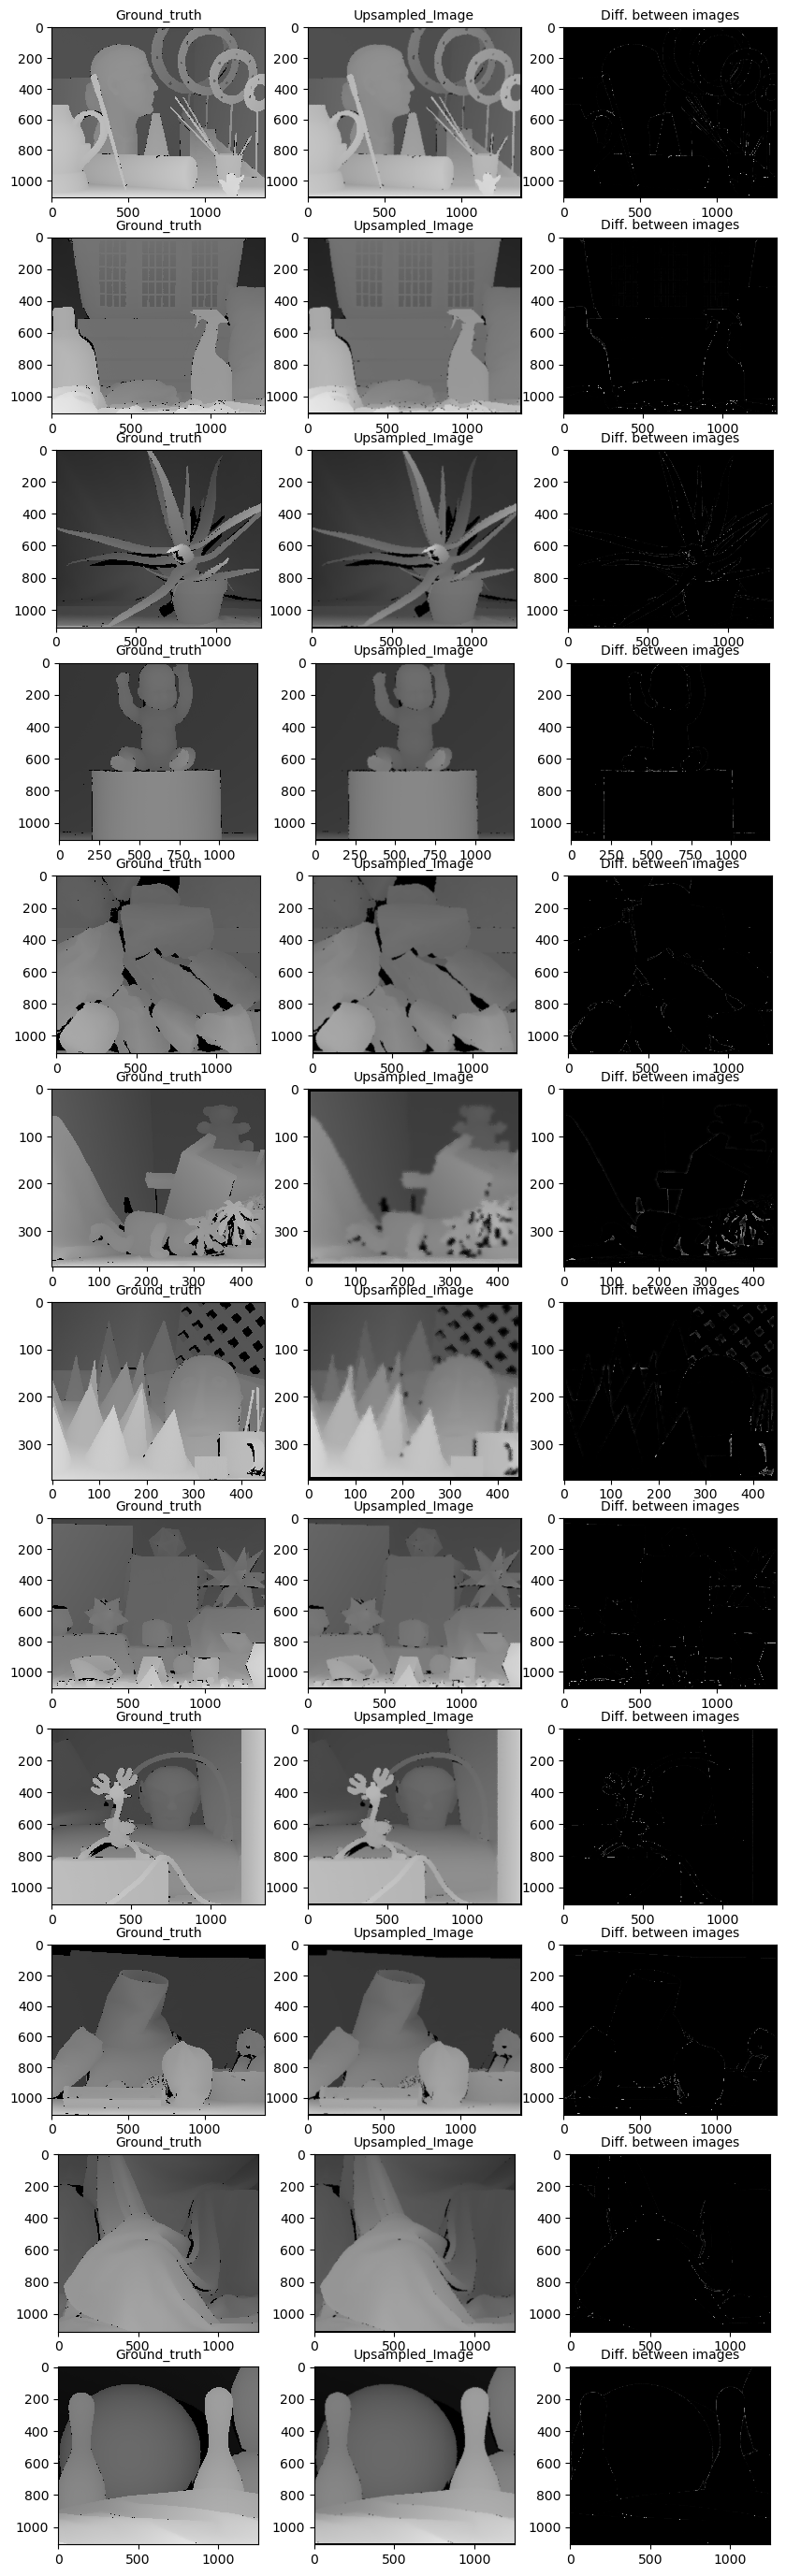

In [5]:
# Pair 1
iu1=cv2.imread("../dataset/pair_1/results/window_size_11/pair1_11_10_IU.png")
pair1=difference("../dataset/pair_1/results/window_size_11/pair1_11_10_IU.png","../dataset/pair_1/disp1.png")

# Pair 2
iu2=cv2.imread("../dataset/pair_2/results/window_size_11/pair2_11_10_IU.png")
pair2=difference("../dataset/pair_2/results/window_size_11/pair2_11_10_IU.png","../dataset/pair_2/disp1.png")

# Pair 3
iu3=cv2.imread("../dataset/pair_3/results/window_size_11/pair3_11_10_IU.png")
pair3=difference("../dataset/pair_3/results/window_size_11/pair3_11_10_IU.png","../dataset/pair_3/disp1.png")

# Pair 4
iu4=cv2.imread("../dataset/pair_4/results/window_size_11/pair4_11_10_IU.png")
pair4=difference("../dataset/pair_4/results/window_size_11/pair4_11_10_IU.png","../dataset/pair_4/disp1.png")

# Pair 5
iu5=cv2.imread("../dataset/pair_5/results/window_size_11/pair5_11_10_IU.png")
pair5=difference("../dataset/pair_5/results/window_size_11/pair5_11_10_IU.png","../dataset/pair_5/disp1.png")

# Pair 6
iu6=cv2.imread("../dataset/pair_6/results/window_size_11/pair6_11_10_IU.png")
pair6=difference("../dataset/pair_6/results/window_size_11/pair6_11_10_IU.png","../dataset/pair_6/disp1.png")

# Pair 7
iu7=cv2.imread("../dataset/pair_7/results/window_size_11/pair7_11_10_IU.png")
pair7=difference("../dataset/pair_7/results/window_size_11/pair7_11_10_IU.png","../dataset/pair_7/disp1.png")

# Pair 8
iu8=cv2.imread("../dataset/pair_8/results/window_size_11/pair8_11_10_IU.png")
pair8=difference("../dataset/pair_8/results/window_size_11/pair8_11_10_IU.png","../dataset/pair_8/disp1.png")

# Pair 9
iu9=cv2.imread("../dataset/pair_9/results/window_size_11/pair9_11_10_IU.png")
pair9=difference("../dataset/pair_9/results/window_size_11/pair9_11_10_IU.png","../dataset/pair_9/disp1.png")

# Pair 10
iu10=cv2.imread("../dataset/pair_10/results/window_size_11/pair10_11_10_IU.png")
pair10=difference("../dataset/pair_10/results/window_size_11/pair10_11_10_IU.png","../dataset/pair_10/disp1.png")

# Pair 11
iu11=cv2.imread("../dataset/pair_11/results/window_size_11/pair11_11_10_IU.png")
pair11=difference("../dataset/pair_11/results/window_size_11/pair11_11_10_IU.png","../dataset/pair_11/disp1.png")

# Pair 12
iu12=cv2.imread("../dataset/pair_12/results/window_size_11/pair12_11_10_IU.png")
pair12=difference("../dataset/pair_12/results/window_size_11/pair12_11_10_IU.png","../dataset/pair_12/disp1.png")

## Plot
f1 = plt.figure(figsize=(10, 35))
f1.add_subplot(12,3, 1)
plt.imshow(gt1,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 2)
plt.imshow(iu1,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 3)
plt.imshow(pair1,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 4)
plt.imshow(gt2,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 5)
plt.imshow(iu2,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 6)
plt.imshow(pair2,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 7)
plt.imshow(gt3,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 8)
plt.imshow(iu3,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 9)
plt.imshow(pair3,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 10)
plt.imshow(gt4,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 11)
plt.imshow(iu4,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 12)
plt.imshow(pair4,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 13)
plt.imshow(gt5,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 14)
plt.imshow(iu5,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 15)
plt.imshow(pair5,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 16)
plt.imshow(gt6,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 17)
plt.imshow(iu6,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 18)
plt.imshow(pair6,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 19)
plt.imshow(gt7,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 20)
plt.imshow(iu7,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 21)
plt.imshow(pair7,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 22)
plt.imshow(gt8,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 23)
plt.imshow(iu8,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 24)
plt.imshow(pair8,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 25)
plt.imshow(gt9,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 26)
plt.imshow(iu9,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 27)
plt.imshow(pair9,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 28)
plt.imshow(gt10,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 29)
plt.imshow(iu10,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 30)
plt.imshow(pair10,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 31)
plt.imshow(gt11,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 32)
plt.imshow(iu11,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 33)
plt.imshow(pair11,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)

f1.add_subplot(12,3, 34)
plt.imshow(gt12,cmap='gray', vmin=0, vmax=255)
plt.title('Ground_truth', fontsize=10)
f1.add_subplot(12,3, 35)
plt.imshow(iu12,cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled_Image', fontsize=10)
f1.add_subplot(12,3, 36)
plt.imshow(pair12,cmap='gray', vmin=0, vmax=255)
plt.title('Diff. between images', fontsize=10)
plt.show()

In [6]:
def SSD(image,gt):
    img=Image.open(image)
    ground_truth=Image.open(gt)
    SSD=np.sum((np.array(img) - np.array(ground_truth))**2)
    return SSD

In [7]:
def NCC(image,gt):
    method = 'cv2.TM_CCORR_NORMED'
    img=Image.open(image)
    ground_truth=Image.open(gt)
    NCC = cv2.matchTemplate(np.array(img), np.array(ground_truth), eval(method))
    return NCC

In [8]:
def SSIM(image,gt):
    img=Image.open(image)
    ground_truth=Image.open(gt)
    SSIM = compare_ssim(img, ground_truth,GPU=False)
    return SSIM

In [9]:
def plot_Metrics(x,JBU1,IU1,JBU2,IU2,JBU3,IU3,JBU4,IU4,JBU5,IU5,JBU6,IU6,JBU7,IU7,JBU8,IU8,JBU9,IU9,JBU10,IU10,JBU11,IU11,JBU12,IU12,metrics_name,title,xlabel):
    fig = plt.figure(figsize =(15, 10))
    plt.boxplot([JBU1,IU1,JBU2,IU2,JBU3,IU3,JBU4,IU4,JBU5,IU5,JBU6,IU6,JBU7,IU7,JBU8,IU8,JBU9,IU9,JBU10,IU10,JBU11,IU11,JBU12,IU12],labels=x)
    plt.xlabel(xlabel)
    plt.ylabel(metrics_name)
    plt.title(title)
    plt.show()

## Metrics Comparison with different Sigma Spatial
 
As sigma spatial is function of the window_size so different window size is used.

Window_Size used are 3,5,9,11,15,17

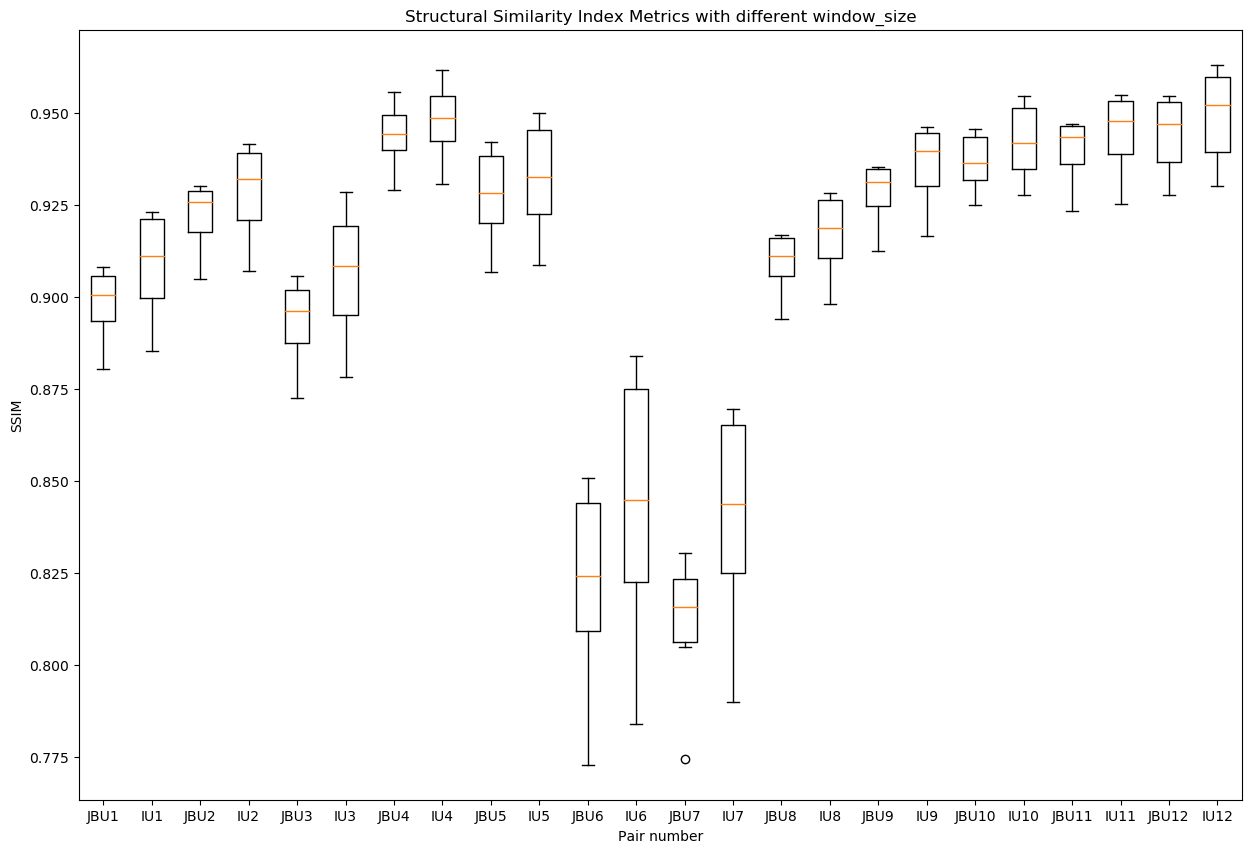

In [12]:
## JBU Approach
## Pair (1)
SSIM_JBU_1_3=SSIM("../dataset/pair_1/results/window_size_3/pair1_3_10_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_5=SSIM("../dataset/pair_1/results/window_size_5/pair1_5_10_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_9=SSIM("../dataset/pair_1/results/window_size_9/pair1_9_10_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_11=SSIM("../dataset/pair_1/results/window_size_11/pair1_11_10_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_15=SSIM("../dataset/pair_1/results/window_size_15/pair1_15_10_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_17=SSIM("../dataset/pair_1/results/window_size_17/pair1_17_10_JBU.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSIM_JBU_2_3=SSIM("../dataset/pair_2/results/window_size_3/pair2_3_10_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_5=SSIM("../dataset/pair_2/results/window_size_5/pair2_5_10_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_9=SSIM("../dataset/pair_2/results/window_size_9/pair2_9_10_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_11=SSIM("../dataset/pair_2/results/window_size_11/pair2_11_10_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_15=SSIM("../dataset/pair_2/results/window_size_15/pair2_15_10_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_17=SSIM("../dataset/pair_2/results/window_size_17/pair2_17_10_JBU.png","../dataset/pair_2/disp1.png")


## Pair (3)
SSIM_JBU_3_3=SSIM("../dataset/pair_3/results/window_size_3/pair3_3_10_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_5=SSIM("../dataset/pair_3/results/window_size_5/pair3_5_10_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_9=SSIM("../dataset/pair_3/results/window_size_9/pair3_9_10_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_11=SSIM("../dataset/pair_3/results/window_size_11/pair3_11_10_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_15=SSIM("../dataset/pair_3/results/window_size_15/pair3_15_10_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_17=SSIM("../dataset/pair_3/results/window_size_17/pair3_17_10_JBU.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSIM_JBU_4_3=SSIM("../dataset/pair_4/results/window_size_3/pair4_3_10_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_5=SSIM("../dataset/pair_4/results/window_size_5/pair4_5_10_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_9=SSIM("../dataset/pair_4/results/window_size_9/pair4_9_10_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_11=SSIM("../dataset/pair_4/results/window_size_11/pair4_11_10_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_15=SSIM("../dataset/pair_4/results/window_size_15/pair4_15_10_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_17=SSIM("../dataset/pair_4/results/window_size_17/pair4_17_10_JBU.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSIM_JBU_5_3=SSIM("../dataset/pair_5/results/window_size_3/pair5_3_10_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_5=SSIM("../dataset/pair_5/results/window_size_5/pair5_5_10_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_9=SSIM("../dataset/pair_5/results/window_size_9/pair5_9_10_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_11=SSIM("../dataset/pair_5/results/window_size_11/pair5_11_10_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_15=SSIM("../dataset/pair_5/results/window_size_15/pair5_15_10_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_17=SSIM("../dataset/pair_5/results/window_size_17/pair5_17_10_JBU.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSIM_JBU_6_3=SSIM("../dataset/pair_6/results/window_size_3/pair6_3_10_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_5=SSIM("../dataset/pair_6/results/window_size_5/pair6_5_10_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_9=SSIM("../dataset/pair_6/results/window_size_9/pair6_9_10_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_11=SSIM("../dataset/pair_6/results/window_size_11/pair6_11_10_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_15=SSIM("../dataset/pair_6/results/window_size_15/pair6_15_10_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_17=SSIM("../dataset/pair_6/results/window_size_17/pair6_17_10_JBU.png","../dataset/pair_6/disp1.png")

## Pair (7)
SSIM_JBU_7_3=SSIM("../dataset/pair_7/results/window_size_3/pair7_3_10_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_5=SSIM("../dataset/pair_7/results/window_size_5/pair7_5_10_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_9=SSIM("../dataset/pair_7/results/window_size_9/pair7_9_10_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_11=SSIM("../dataset/pair_7/results/window_size_11/pair7_11_10_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_15=SSIM("../dataset/pair_7/results/window_size_15/pair7_15_10_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_17=SSIM("../dataset/pair_7/results/window_size_17/pair7_17_10_JBU.png","../dataset/pair_7/disp1.png")

## Pair (8)
SSIM_JBU_8_3=SSIM("../dataset/pair_8/results/window_size_3/pair8_3_10_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_5=SSIM("../dataset/pair_8/results/window_size_5/pair8_5_10_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_9=SSIM("../dataset/pair_8/results/window_size_9/pair8_9_10_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_11=SSIM("../dataset/pair_8/results/window_size_11/pair8_11_10_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_15=SSIM("../dataset/pair_8/results/window_size_15/pair8_15_10_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_17=SSIM("../dataset/pair_8/results/window_size_17/pair8_17_10_JBU.png","../dataset/pair_8/disp1.png")

## Pair (9)
SSIM_JBU_9_3=SSIM("../dataset/pair_9/results/window_size_3/pair9_3_10_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_5=SSIM("../dataset/pair_9/results/window_size_5/pair9_5_10_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_9=SSIM("../dataset/pair_9/results/window_size_9/pair9_9_10_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_11=SSIM("../dataset/pair_9/results/window_size_11/pair9_11_10_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_15=SSIM("../dataset/pair_9/results/window_size_15/pair9_15_10_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_17=SSIM("../dataset/pair_9/results/window_size_17/pair9_17_10_JBU.png","../dataset/pair_9/disp1.png")

## Pair (10)
SSIM_JBU_10_3=SSIM("../dataset/pair_10/results/window_size_3/pair10_3_10_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_5=SSIM("../dataset/pair_10/results/window_size_5/pair10_5_10_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_9=SSIM("../dataset/pair_10/results/window_size_9/pair10_9_10_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_11=SSIM("../dataset/pair_10/results/window_size_11/pair10_11_10_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_15=SSIM("../dataset/pair_10/results/window_size_15/pair10_15_10_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_17=SSIM("../dataset/pair_10/results/window_size_17/pair10_17_10_JBU.png","../dataset/pair_10/disp1.png")

## Pair (11)
SSIM_JBU_11_3=SSIM("../dataset/pair_11/results/window_size_3/pair11_3_10_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_5=SSIM("../dataset/pair_11/results/window_size_5/pair11_5_10_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_9=SSIM("../dataset/pair_11/results/window_size_9/pair11_9_10_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_11=SSIM("../dataset/pair_11/results/window_size_11/pair11_11_10_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_15=SSIM("../dataset/pair_11/results/window_size_15/pair11_15_10_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_17=SSIM("../dataset/pair_11/results/window_size_17/pair11_17_10_JBU.png","../dataset/pair_11/disp1.png")

## Pair (12)
SSIM_JBU_12_3=SSIM("../dataset/pair_12/results/window_size_3/pair12_3_10_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_5=SSIM("../dataset/pair_12/results/window_size_5/pair12_5_10_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_9=SSIM("../dataset/pair_12/results/window_size_9/pair12_9_10_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_11=SSIM("../dataset/pair_12/results/window_size_11/pair12_11_10_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_15=SSIM("../dataset/pair_12/results/window_size_15/pair12_15_10_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_17=SSIM("../dataset/pair_12/results/window_size_17/pair12_17_10_JBU.png","../dataset/pair_12/disp1.png")

## Iterative Upsampling
## Pair (1)
SSIM_IU_1_3=SSIM("../dataset/pair_1/results/window_size_3/pair1_3_10_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_5=SSIM("../dataset/pair_1/results/window_size_5/pair1_5_10_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_9=SSIM("../dataset/pair_1/results/window_size_9/pair1_9_10_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_11=SSIM("../dataset/pair_1/results/window_size_11/pair1_11_10_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_15=SSIM("../dataset/pair_1/results/window_size_15/pair1_15_10_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_17=SSIM("../dataset/pair_1/results/window_size_17/pair1_17_10_IU.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSIM_IU_2_3=SSIM("../dataset/pair_2/results/window_size_3/pair2_3_10_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_5=SSIM("../dataset/pair_2/results/window_size_5/pair2_5_10_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_9=SSIM("../dataset/pair_2/results/window_size_9/pair2_9_10_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_11=SSIM("../dataset/pair_2/results/window_size_11/pair2_11_10_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_15=SSIM("../dataset/pair_2/results/window_size_15/pair2_15_10_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_17=SSIM("../dataset/pair_2/results/window_size_17/pair2_17_10_IU.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSIM_IU_3_3=SSIM("../dataset/pair_3/results/window_size_3/pair3_3_10_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_5=SSIM("../dataset/pair_3/results/window_size_5/pair3_5_10_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_9=SSIM("../dataset/pair_3/results/window_size_9/pair3_9_10_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_11=SSIM("../dataset/pair_3/results/window_size_11/pair3_11_10_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_15=SSIM("../dataset/pair_3/results/window_size_15/pair3_15_10_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_17=SSIM("../dataset/pair_3/results/window_size_17/pair3_17_10_IU.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSIM_IU_4_3=SSIM("../dataset/pair_4/results/window_size_3/pair4_3_10_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_5=SSIM("../dataset/pair_4/results/window_size_5/pair4_5_10_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_9=SSIM("../dataset/pair_4/results/window_size_9/pair4_9_10_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_11=SSIM("../dataset/pair_4/results/window_size_11/pair4_11_10_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_15=SSIM("../dataset/pair_4/results/window_size_15/pair4_15_10_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_17=SSIM("../dataset/pair_4/results/window_size_17/pair4_17_10_IU.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSIM_IU_5_3=SSIM("../dataset/pair_5/results/window_size_3/pair5_3_10_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_5=SSIM("../dataset/pair_5/results/window_size_5/pair5_5_10_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_9=SSIM("../dataset/pair_5/results/window_size_9/pair5_9_10_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_11=SSIM("../dataset/pair_5/results/window_size_11/pair5_11_10_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_15=SSIM("../dataset/pair_5/results/window_size_15/pair5_15_10_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_17=SSIM("../dataset/pair_5/results/window_size_17/pair5_17_10_IU.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSIM_IU_6_3=SSIM("../dataset/pair_6/results/window_size_3/pair6_3_10_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_5=SSIM("../dataset/pair_6/results/window_size_5/pair6_5_10_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_9=SSIM("../dataset/pair_6/results/window_size_9/pair6_9_10_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_11=SSIM("../dataset/pair_6/results/window_size_11/pair6_11_10_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_15=SSIM("../dataset/pair_6/results/window_size_15/pair6_15_10_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_17=SSIM("../dataset/pair_6/results/window_size_17/pair6_17_10_IU.png","../dataset/pair_6/disp1.png")

## Pair (7)
SSIM_IU_7_3=SSIM("../dataset/pair_7/results/window_size_3/pair7_3_10_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_5=SSIM("../dataset/pair_7/results/window_size_5/pair7_5_10_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_9=SSIM("../dataset/pair_7/results/window_size_9/pair7_9_10_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_11=SSIM("../dataset/pair_7/results/window_size_11/pair7_11_10_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_15=SSIM("../dataset/pair_7/results/window_size_15/pair7_15_10_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_17=SSIM("../dataset/pair_7/results/window_size_17/pair7_17_10_IU.png","../dataset/pair_7/disp1.png")

## Pair (8)
SSIM_IU_8_3=SSIM("../dataset/pair_8/results/window_size_3/pair8_3_10_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_5=SSIM("../dataset/pair_8/results/window_size_5/pair8_5_10_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_9=SSIM("../dataset/pair_8/results/window_size_9/pair8_9_10_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_11=SSIM("../dataset/pair_8/results/window_size_11/pair8_11_10_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_15=SSIM("../dataset/pair_8/results/window_size_15/pair8_15_10_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_17=SSIM("../dataset/pair_8/results/window_size_17/pair8_17_10_IU.png","../dataset/pair_8/disp1.png")

## Pair (9)
SSIM_IU_9_3=SSIM("../dataset/pair_9/results/window_size_3/pair9_3_10_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_5=SSIM("../dataset/pair_9/results/window_size_5/pair9_5_10_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_9=SSIM("../dataset/pair_9/results/window_size_9/pair9_9_10_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_11=SSIM("../dataset/pair_9/results/window_size_11/pair9_11_10_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_15=SSIM("../dataset/pair_9/results/window_size_15/pair9_15_10_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_17=SSIM("../dataset/pair_9/results/window_size_17/pair9_17_10_IU.png","../dataset/pair_9/disp1.png")

## Pair (10)
SSIM_IU_10_3=SSIM("../dataset/pair_10/results/window_size_3/pair10_3_10_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_5=SSIM("../dataset/pair_10/results/window_size_5/pair10_5_10_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_9=SSIM("../dataset/pair_10/results/window_size_9/pair10_9_10_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_11=SSIM("../dataset/pair_10/results/window_size_11/pair10_11_10_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_15=SSIM("../dataset/pair_10/results/window_size_15/pair10_15_10_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_17=SSIM("../dataset/pair_10/results/window_size_17/pair10_17_10_IU.png","../dataset/pair_10/disp1.png")

## Pair (11)
SSIM_IU_11_3=SSIM("../dataset/pair_11/results/window_size_3/pair11_3_10_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_5=SSIM("../dataset/pair_11/results/window_size_5/pair11_5_10_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_9=SSIM("../dataset/pair_11/results/window_size_9/pair11_9_10_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_11=SSIM("../dataset/pair_11/results/window_size_11/pair11_11_10_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_15=SSIM("../dataset/pair_11/results/window_size_15/pair11_15_10_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_17=SSIM("../dataset/pair_11/results/window_size_17/pair11_17_10_IU.png","../dataset/pair_11/disp1.png")

## Pair (12)
SSIM_IU_12_3=SSIM("../dataset/pair_12/results/window_size_3/pair12_3_10_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_5=SSIM("../dataset/pair_12/results/window_size_5/pair12_5_10_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_9=SSIM("../dataset/pair_12/results/window_size_9/pair12_9_10_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_11=SSIM("../dataset/pair_12/results/window_size_11/pair12_11_10_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_15=SSIM("../dataset/pair_12/results/window_size_15/pair12_15_10_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_17=SSIM("../dataset/pair_12/results/window_size_17/pair12_17_10_IU.png","../dataset/pair_12/disp1.png")

# Plotting SSIM
JBU_Pair1_SSIM=[SSIM_JBU_1_3,SSIM_JBU_1_5,SSIM_JBU_1_9,SSIM_JBU_1_11,SSIM_JBU_1_15,SSIM_JBU_1_17]
IU_Pair1_SSIM=[SSIM_IU_1_3,SSIM_IU_1_5,SSIM_IU_1_9,SSIM_IU_1_11,SSIM_IU_1_15,SSIM_IU_1_17]

JBU_Pair2_SSIM=[SSIM_JBU_2_3,SSIM_JBU_2_5,SSIM_JBU_2_9,SSIM_JBU_2_11,SSIM_JBU_2_15,SSIM_JBU_2_17]
IU_Pair2_SSIM=[SSIM_IU_2_3,SSIM_IU_2_5,SSIM_IU_2_9,SSIM_IU_2_11,SSIM_IU_2_15,SSIM_IU_2_17]

JBU_Pair3_SSIM=[SSIM_JBU_3_3,SSIM_JBU_3_5,SSIM_JBU_3_9,SSIM_JBU_3_11,SSIM_JBU_3_15,SSIM_JBU_3_17]
IU_Pair3_SSIM=[SSIM_IU_3_3,SSIM_IU_3_5,SSIM_IU_3_9,SSIM_IU_3_11,SSIM_IU_3_15,SSIM_IU_3_17]

JBU_Pair4_SSIM=[SSIM_JBU_4_3,SSIM_JBU_4_5,SSIM_JBU_4_9,SSIM_JBU_4_11,SSIM_JBU_4_15,SSIM_JBU_4_17]
IU_Pair4_SSIM=[SSIM_IU_4_3,SSIM_IU_4_5,SSIM_IU_4_9,SSIM_IU_4_11,SSIM_IU_4_15,SSIM_IU_4_17]

JBU_Pair5_SSIM=[SSIM_JBU_5_3,SSIM_JBU_5_5,SSIM_JBU_5_9,SSIM_JBU_5_11,SSIM_JBU_5_15,SSIM_JBU_5_17]
IU_Pair5_SSIM=[SSIM_IU_5_3,SSIM_IU_5_5,SSIM_IU_5_9,SSIM_IU_5_11,SSIM_IU_5_15,SSIM_IU_5_17]

JBU_Pair6_SSIM=[SSIM_JBU_6_3,SSIM_JBU_6_5,SSIM_JBU_6_9,SSIM_JBU_6_11,SSIM_JBU_6_15,SSIM_JBU_6_17]
IU_Pair6_SSIM=[SSIM_IU_6_3,SSIM_IU_6_5,SSIM_IU_6_9,SSIM_IU_6_11,SSIM_IU_6_15,SSIM_IU_6_17]

JBU_Pair7_SSIM=[SSIM_JBU_7_3,SSIM_JBU_7_5,SSIM_JBU_7_9,SSIM_JBU_7_11,SSIM_JBU_7_15,SSIM_JBU_7_17]
IU_Pair7_SSIM=[SSIM_IU_7_3,SSIM_IU_7_5,SSIM_IU_7_9,SSIM_IU_7_11,SSIM_IU_7_15,SSIM_IU_7_17]

JBU_Pair8_SSIM=[SSIM_JBU_8_3,SSIM_JBU_8_5,SSIM_JBU_8_9,SSIM_JBU_8_11,SSIM_JBU_8_15,SSIM_JBU_8_17]
IU_Pair8_SSIM=[SSIM_IU_8_3,SSIM_IU_8_5,SSIM_IU_8_9,SSIM_IU_8_11,SSIM_IU_8_15,SSIM_IU_8_17]

JBU_Pair9_SSIM=[SSIM_JBU_9_3,SSIM_JBU_9_5,SSIM_JBU_9_9,SSIM_JBU_9_11,SSIM_JBU_9_15,SSIM_JBU_9_17]
IU_Pair9_SSIM=[SSIM_IU_9_3,SSIM_IU_9_5,SSIM_IU_9_9,SSIM_IU_9_11,SSIM_IU_9_15,SSIM_IU_9_17]

JBU_Pair10_SSIM=[SSIM_JBU_10_3,SSIM_JBU_10_5,SSIM_JBU_10_9,SSIM_JBU_10_11,SSIM_JBU_10_15,SSIM_JBU_10_17]
IU_Pair10_SSIM=[SSIM_IU_10_3,SSIM_IU_10_5,SSIM_IU_10_9,SSIM_IU_10_11,SSIM_IU_10_15,SSIM_IU_10_17]

JBU_Pair11_SSIM=[SSIM_JBU_11_3,SSIM_JBU_11_5,SSIM_JBU_11_9,SSIM_JBU_11_11,SSIM_JBU_11_15,SSIM_JBU_11_17]
IU_Pair11_SSIM=[SSIM_IU_11_3,SSIM_IU_11_5,SSIM_IU_11_9,SSIM_IU_11_11,SSIM_IU_11_15,SSIM_IU_11_17]

JBU_Pair12_SSIM=[SSIM_JBU_12_3,SSIM_JBU_12_5,SSIM_JBU_12_9,SSIM_JBU_12_11,SSIM_JBU_12_15,SSIM_JBU_12_17]
IU_Pair12_SSIM=[SSIM_IU_12_3,SSIM_IU_12_5,SSIM_IU_12_9,SSIM_IU_12_11,SSIM_IU_12_15,SSIM_IU_12_17]


plot_Metrics(["JBU1","IU1","JBU2","IU2","JBU3","IU3","JBU4","IU4","JBU5","IU5"
            ,"JBU6","IU6","JBU7","IU7","JBU8","IU8","JBU9","IU9","JBU10","IU10","JBU11","IU11"
            ,"JBU12","IU12"],JBU_Pair1_SSIM,IU_Pair1_SSIM,JBU_Pair2_SSIM,IU_Pair2_SSIM,JBU_Pair3_SSIM,IU_Pair3_SSIM
            ,JBU_Pair4_SSIM,IU_Pair4_SSIM,JBU_Pair5_SSIM,IU_Pair5_SSIM
            ,JBU_Pair6_SSIM,IU_Pair6_SSIM,JBU_Pair7_SSIM,IU_Pair7_SSIM,JBU_Pair8_SSIM,IU_Pair8_SSIM,JBU_Pair9_SSIM,IU_Pair9_SSIM
            ,JBU_Pair10_SSIM,IU_Pair10_SSIM,JBU_Pair11_SSIM,IU_Pair11_SSIM,JBU_Pair12_SSIM,IU_Pair12_SSIM,
            "SSIM","Structural Similarity Index Metrics with different window_size","Pair number")

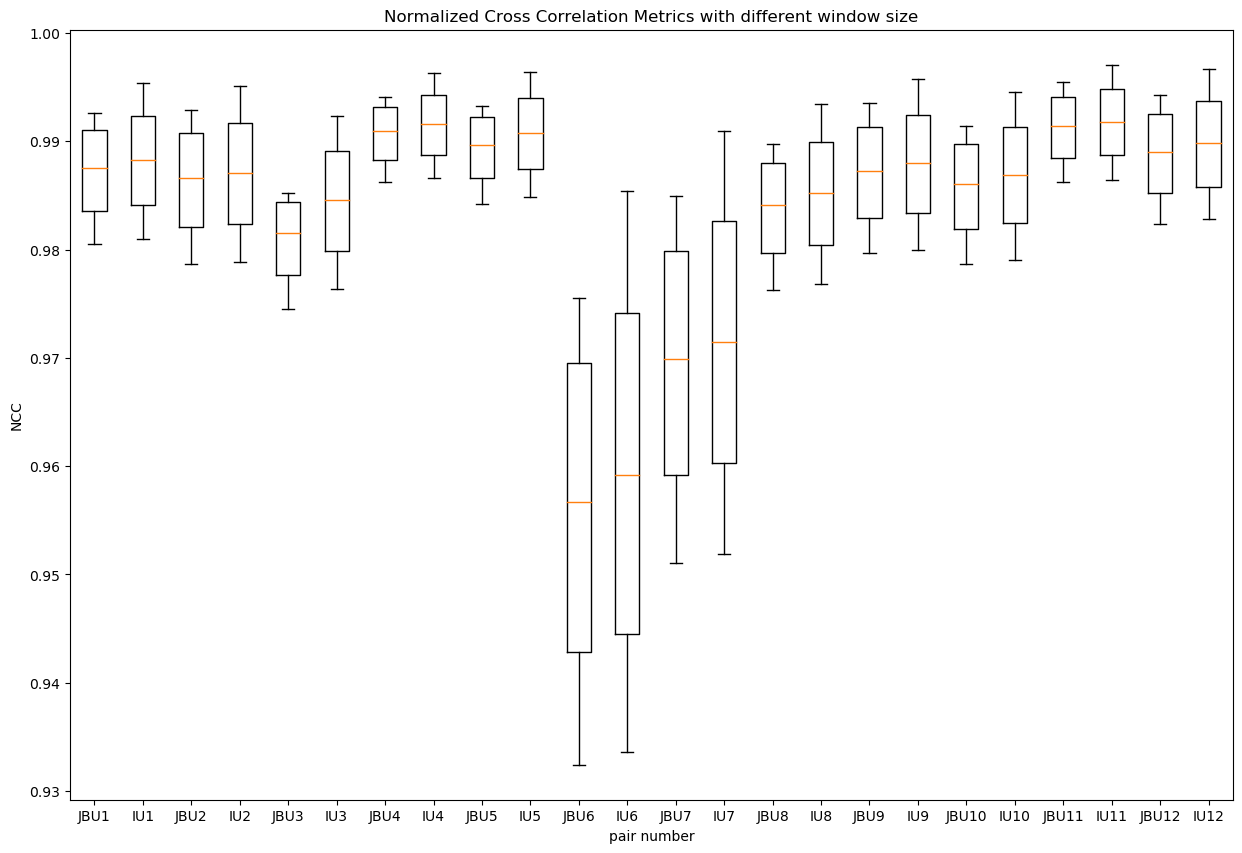

In [11]:
## JBU Approach
## Pair (1)
NCC_JBU_1_3=NCC("../dataset/pair_1/results/window_size_3/pair1_3_10_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_5=NCC("../dataset/pair_1/results/window_size_5/pair1_5_10_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_9=NCC("../dataset/pair_1/results/window_size_9/pair1_9_10_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_11=NCC("../dataset/pair_1/results/window_size_11/pair1_11_10_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_15=NCC("../dataset/pair_1/results/window_size_15/pair1_15_10_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_17=NCC("../dataset/pair_1/results/window_size_17/pair1_17_10_JBU.png","../dataset/pair_1/disp1.png")

## Pair (2)
NCC_JBU_2_3=NCC("../dataset/pair_2/results/window_size_3/pair2_3_10_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_5=NCC("../dataset/pair_2/results/window_size_5/pair2_5_10_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_9=NCC("../dataset/pair_2/results/window_size_9/pair2_9_10_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_11=NCC("../dataset/pair_2/results/window_size_11/pair2_11_10_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_15=NCC("../dataset/pair_2/results/window_size_15/pair2_15_10_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_17=NCC("../dataset/pair_2/results/window_size_17/pair2_17_10_JBU.png","../dataset/pair_2/disp1.png")

## Pair (3)
NCC_JBU_3_3=NCC("../dataset/pair_3/results/window_size_3/pair3_3_10_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_5=NCC("../dataset/pair_3/results/window_size_5/pair3_5_10_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_9=NCC("../dataset/pair_3/results/window_size_9/pair3_9_10_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_11=NCC("../dataset/pair_3/results/window_size_11/pair3_11_10_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_15=NCC("../dataset/pair_3/results/window_size_15/pair3_15_10_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_17=NCC("../dataset/pair_3/results/window_size_17/pair3_17_10_JBU.png","../dataset/pair_3/disp1.png")

## Pair (4)
NCC_JBU_4_3=NCC("../dataset/pair_4/results/window_size_3/pair4_3_10_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_5=NCC("../dataset/pair_4/results/window_size_5/pair4_5_10_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_9=NCC("../dataset/pair_4/results/window_size_9/pair4_9_10_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_11=NCC("../dataset/pair_4/results/window_size_11/pair4_11_10_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_15=NCC("../dataset/pair_4/results/window_size_15/pair4_15_10_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_17=NCC("../dataset/pair_4/results/window_size_17/pair4_17_10_JBU.png","../dataset/pair_4/disp1.png")

## Pair (5)
NCC_JBU_5_3=NCC("../dataset/pair_5/results/window_size_3/pair5_3_10_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_5=NCC("../dataset/pair_5/results/window_size_5/pair5_5_10_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_9=NCC("../dataset/pair_5/results/window_size_9/pair5_9_10_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_11=NCC("../dataset/pair_5/results/window_size_11/pair5_11_10_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_15=NCC("../dataset/pair_5/results/window_size_15/pair5_15_10_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_17=NCC("../dataset/pair_5/results/window_size_17/pair5_17_10_JBU.png","../dataset/pair_5/disp1.png")

## Pair (6)
NCC_JBU_6_3=NCC("../dataset/pair_6/results/window_size_3/pair6_3_10_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_5=NCC("../dataset/pair_6/results/window_size_5/pair6_5_10_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_9=NCC("../dataset/pair_6/results/window_size_9/pair6_9_10_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_11=NCC("../dataset/pair_6/results/window_size_11/pair6_11_10_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_15=NCC("../dataset/pair_6/results/window_size_15/pair6_15_10_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_17=NCC("../dataset/pair_6/results/window_size_17/pair6_17_10_JBU.png","../dataset/pair_6/disp1.png")

## Pair (7)
NCC_JBU_7_3=NCC("../dataset/pair_7/results/window_size_3/pair7_3_10_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_5=NCC("../dataset/pair_7/results/window_size_5/pair7_5_10_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_9=NCC("../dataset/pair_7/results/window_size_9/pair7_9_10_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_11=NCC("../dataset/pair_7/results/window_size_11/pair7_11_10_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_15=NCC("../dataset/pair_7/results/window_size_15/pair7_15_10_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_17=NCC("../dataset/pair_7/results/window_size_17/pair7_17_10_JBU.png","../dataset/pair_7/disp1.png")

## Pair (8)
NCC_JBU_8_3=NCC("../dataset/pair_8/results/window_size_3/pair8_3_10_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_5=NCC("../dataset/pair_8/results/window_size_5/pair8_5_10_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_9=NCC("../dataset/pair_8/results/window_size_9/pair8_9_10_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_11=NCC("../dataset/pair_8/results/window_size_11/pair8_11_10_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_15=NCC("../dataset/pair_8/results/window_size_15/pair8_15_10_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_17=NCC("../dataset/pair_8/results/window_size_17/pair8_17_10_JBU.png","../dataset/pair_8/disp1.png")

## Pair (9)
NCC_JBU_9_3=NCC("../dataset/pair_9/results/window_size_3/pair9_3_10_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_5=NCC("../dataset/pair_9/results/window_size_5/pair9_5_10_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_9=NCC("../dataset/pair_9/results/window_size_9/pair9_9_10_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_11=NCC("../dataset/pair_9/results/window_size_11/pair9_11_10_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_15=NCC("../dataset/pair_9/results/window_size_15/pair9_15_10_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_17=NCC("../dataset/pair_9/results/window_size_17/pair9_17_10_JBU.png","../dataset/pair_9/disp1.png")

## Pair (10)
NCC_JBU_10_3=NCC("../dataset/pair_10/results/window_size_3/pair10_3_10_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_5=NCC("../dataset/pair_10/results/window_size_5/pair10_5_10_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_9=NCC("../dataset/pair_10/results/window_size_9/pair10_9_10_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_11=NCC("../dataset/pair_10/results/window_size_11/pair10_11_10_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_15=NCC("../dataset/pair_10/results/window_size_15/pair10_15_10_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_17=NCC("../dataset/pair_10/results/window_size_17/pair10_17_10_JBU.png","../dataset/pair_10/disp1.png")

## Pair (11)
NCC_JBU_11_3=NCC("../dataset/pair_11/results/window_size_3/pair11_3_10_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_5=NCC("../dataset/pair_11/results/window_size_5/pair11_5_10_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_9=NCC("../dataset/pair_11/results/window_size_9/pair11_9_10_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_11=NCC("../dataset/pair_11/results/window_size_11/pair11_11_10_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_15=NCC("../dataset/pair_11/results/window_size_15/pair11_15_10_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_17=NCC("../dataset/pair_11/results/window_size_17/pair11_17_10_JBU.png","../dataset/pair_11/disp1.png")

## Pair (12)
NCC_JBU_12_3=NCC("../dataset/pair_12/results/window_size_3/pair12_3_10_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_5=NCC("../dataset/pair_12/results/window_size_5/pair12_5_10_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_9=NCC("../dataset/pair_12/results/window_size_9/pair12_9_10_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_11=NCC("../dataset/pair_12/results/window_size_11/pair12_11_10_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_15=NCC("../dataset/pair_12/results/window_size_15/pair12_15_10_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_17=NCC("../dataset/pair_12/results/window_size_17/pair12_17_10_JBU.png","../dataset/pair_12/disp1.png")


## Iterative Upsampling
## Pair (1)
NCC_IU_1_3=NCC("../dataset/pair_1/results/window_size_3/pair1_3_10_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_5=NCC("../dataset/pair_1/results/window_size_5/pair1_5_10_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_9=NCC("../dataset/pair_1/results/window_size_9/pair1_9_10_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_11=NCC("../dataset/pair_1/results/window_size_11/pair1_11_10_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_15=NCC("../dataset/pair_1/results/window_size_15/pair1_15_10_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_17=NCC("../dataset/pair_1/results/window_size_17/pair1_17_10_IU.png","../dataset/pair_1/disp1.png")

## Pair (2)
NCC_IU_2_3=NCC("../dataset/pair_2/results/window_size_3/pair2_3_10_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_5=NCC("../dataset/pair_2/results/window_size_5/pair2_5_10_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_9=NCC("../dataset/pair_2/results/window_size_9/pair2_9_10_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_11=NCC("../dataset/pair_2/results/window_size_11/pair2_11_10_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_15=NCC("../dataset/pair_2/results/window_size_15/pair2_15_10_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_17=NCC("../dataset/pair_2/results/window_size_17/pair2_17_10_IU.png","../dataset/pair_2/disp1.png")

## Pair (3)
NCC_IU_3_3=NCC("../dataset/pair_3/results/window_size_3/pair3_3_10_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_5=NCC("../dataset/pair_3/results/window_size_5/pair3_5_10_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_9=NCC("../dataset/pair_3/results/window_size_9/pair3_9_10_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_11=NCC("../dataset/pair_3/results/window_size_11/pair3_11_10_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_15=NCC("../dataset/pair_3/results/window_size_15/pair3_15_10_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_17=NCC("../dataset/pair_3/results/window_size_17/pair3_17_10_IU.png","../dataset/pair_3/disp1.png")

## Pair (4)
NCC_IU_4_3=NCC("../dataset/pair_4/results/window_size_3/pair4_3_10_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_5=NCC("../dataset/pair_4/results/window_size_5/pair4_5_10_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_9=NCC("../dataset/pair_4/results/window_size_9/pair4_9_10_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_11=NCC("../dataset/pair_4/results/window_size_11/pair4_11_10_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_15=NCC("../dataset/pair_4/results/window_size_15/pair4_15_10_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_17=NCC("../dataset/pair_4/results/window_size_17/pair4_17_10_IU.png","../dataset/pair_4/disp1.png")

## Pair (5)
NCC_IU_5_3=NCC("../dataset/pair_5/results/window_size_3/pair5_3_10_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_5=NCC("../dataset/pair_5/results/window_size_5/pair5_5_10_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_9=NCC("../dataset/pair_5/results/window_size_9/pair5_9_10_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_11=NCC("../dataset/pair_5/results/window_size_11/pair5_11_10_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_15=NCC("../dataset/pair_5/results/window_size_15/pair5_15_10_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_17=NCC("../dataset/pair_5/results/window_size_17/pair5_17_10_IU.png","../dataset/pair_5/disp1.png")

## Pair (6)
NCC_IU_6_3=NCC("../dataset/pair_6/results/window_size_3/pair6_3_10_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_5=NCC("../dataset/pair_6/results/window_size_5/pair6_5_10_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_9=NCC("../dataset/pair_6/results/window_size_9/pair6_9_10_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_11=NCC("../dataset/pair_6/results/window_size_11/pair6_11_10_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_15=NCC("../dataset/pair_6/results/window_size_15/pair6_15_10_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_17=NCC("../dataset/pair_6/results/window_size_17/pair6_17_10_IU.png","../dataset/pair_6/disp1.png")

## Pair (7)
NCC_IU_7_3=NCC("../dataset/pair_7/results/window_size_3/pair7_3_10_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_5=NCC("../dataset/pair_7/results/window_size_5/pair7_5_10_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_9=NCC("../dataset/pair_7/results/window_size_9/pair7_9_10_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_11=NCC("../dataset/pair_7/results/window_size_11/pair7_11_10_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_15=NCC("../dataset/pair_7/results/window_size_15/pair7_15_10_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_17=NCC("../dataset/pair_7/results/window_size_17/pair7_17_10_IU.png","../dataset/pair_7/disp1.png")

## Pair (8)
NCC_IU_8_3=NCC("../dataset/pair_8/results/window_size_3/pair8_3_10_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_5=NCC("../dataset/pair_8/results/window_size_5/pair8_5_10_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_9=NCC("../dataset/pair_8/results/window_size_9/pair8_9_10_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_11=NCC("../dataset/pair_8/results/window_size_11/pair8_11_10_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_15=NCC("../dataset/pair_8/results/window_size_15/pair8_15_10_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_17=NCC("../dataset/pair_8/results/window_size_17/pair8_17_10_IU.png","../dataset/pair_8/disp1.png")

## Pair (9)
NCC_IU_9_3=NCC("../dataset/pair_9/results/window_size_3/pair9_3_10_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_5=NCC("../dataset/pair_9/results/window_size_5/pair9_5_10_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_9=NCC("../dataset/pair_9/results/window_size_9/pair9_9_10_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_11=NCC("../dataset/pair_9/results/window_size_11/pair9_11_10_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_15=NCC("../dataset/pair_9/results/window_size_15/pair9_15_10_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_17=NCC("../dataset/pair_9/results/window_size_17/pair9_17_10_IU.png","../dataset/pair_9/disp1.png")

## Pair (10)
NCC_IU_10_3=NCC("../dataset/pair_10/results/window_size_3/pair10_3_10_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_5=NCC("../dataset/pair_10/results/window_size_5/pair10_5_10_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_9=NCC("../dataset/pair_10/results/window_size_9/pair10_9_10_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_11=NCC("../dataset/pair_10/results/window_size_11/pair10_11_10_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_15=NCC("../dataset/pair_10/results/window_size_15/pair10_15_10_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_17=NCC("../dataset/pair_10/results/window_size_17/pair10_17_10_IU.png","../dataset/pair_10/disp1.png")

## Pair (11)
NCC_IU_11_3=NCC("../dataset/pair_11/results/window_size_3/pair11_3_10_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_5=NCC("../dataset/pair_11/results/window_size_5/pair11_5_10_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_9=NCC("../dataset/pair_11/results/window_size_9/pair11_9_10_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_11=NCC("../dataset/pair_11/results/window_size_11/pair11_11_10_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_15=NCC("../dataset/pair_11/results/window_size_15/pair11_15_10_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_17=NCC("../dataset/pair_11/results/window_size_17/pair11_17_10_IU.png","../dataset/pair_11/disp1.png")

## Pair (12)
NCC_IU_12_3=NCC("../dataset/pair_12/results/window_size_3/pair12_3_10_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_5=NCC("../dataset/pair_12/results/window_size_5/pair12_5_10_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_9=NCC("../dataset/pair_12/results/window_size_9/pair12_9_10_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_11=NCC("../dataset/pair_12/results/window_size_11/pair12_11_10_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_15=NCC("../dataset/pair_12/results/window_size_15/pair12_15_10_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_17=NCC("../dataset/pair_12/results/window_size_17/pair12_17_10_IU.png","../dataset/pair_12/disp1.png")

# Plotting NCC 
JBU_Pair1_NCC=[NCC_JBU_1_3[0][0],NCC_JBU_1_5[0][0],NCC_JBU_1_9[0][0],NCC_JBU_1_11[0][0],NCC_JBU_1_15[0][0],NCC_JBU_1_17[0][0]]
IU_Pair1_NCC=[NCC_IU_1_3[0][0],NCC_IU_1_5[0][0],NCC_IU_1_9[0][0],NCC_IU_1_11[0][0],NCC_IU_1_15[0][0],NCC_IU_1_17[0][0]]

JBU_Pair2_NCC=[NCC_JBU_2_3[0][0],NCC_JBU_2_5[0][0],NCC_JBU_2_9[0][0],NCC_JBU_2_11[0][0],NCC_JBU_2_15[0][0],NCC_JBU_2_17[0][0]]
IU_Pair2_NCC=[NCC_IU_2_3[0][0],NCC_IU_2_5[0][0],NCC_IU_2_9[0][0],NCC_IU_2_11[0][0],NCC_IU_2_15[0][0],NCC_IU_2_17[0][0]]

JBU_Pair3_NCC=[NCC_JBU_3_3[0][0],NCC_JBU_3_5[0][0],NCC_JBU_3_9[0][0],NCC_JBU_3_11[0][0],NCC_JBU_3_15[0][0],NCC_JBU_3_17[0][0]]
IU_Pair3_NCC=[NCC_IU_3_3[0][0],NCC_IU_3_5[0][0],NCC_IU_3_9[0][0],NCC_IU_3_11[0][0],NCC_IU_3_15[0][0],NCC_IU_3_17[0][0]]

JBU_Pair4_NCC=[NCC_JBU_4_3[0][0],NCC_JBU_4_5[0][0],NCC_JBU_4_9[0][0],NCC_JBU_4_11[0][0],NCC_JBU_4_15[0][0],NCC_JBU_4_17[0][0]]
IU_Pair4_NCC=[NCC_IU_4_3[0][0],NCC_IU_4_5[0][0],NCC_IU_4_9[0][0],NCC_IU_4_11[0][0],NCC_IU_4_15[0][0],NCC_IU_4_17[0][0]]

JBU_Pair5_NCC=[NCC_JBU_5_3[0][0],NCC_JBU_5_5[0][0],NCC_JBU_5_9[0][0],NCC_JBU_5_11[0][0],NCC_JBU_5_15[0][0],NCC_JBU_5_17[0][0]]
IU_Pair5_NCC=[NCC_IU_5_3[0][0],NCC_IU_5_5[0][0],NCC_IU_5_9[0][0],NCC_IU_5_11[0][0],NCC_IU_5_15[0][0],NCC_IU_5_17[0][0]]

JBU_Pair6_NCC=[NCC_JBU_6_3[0][0],NCC_JBU_6_5[0][0],NCC_JBU_6_9[0][0],NCC_JBU_6_11[0][0],NCC_JBU_6_15[0][0],NCC_JBU_6_17[0][0]]
IU_Pair6_NCC=[NCC_IU_6_3[0][0],NCC_IU_6_5[0][0],NCC_IU_6_9[0][0],NCC_IU_6_11[0][0],NCC_IU_6_15[0][0],NCC_IU_6_17[0][0]]

JBU_Pair7_NCC=[NCC_JBU_7_3[0][0],NCC_JBU_7_5[0][0],NCC_JBU_7_9[0][0],NCC_JBU_7_11[0][0],NCC_JBU_7_15[0][0],NCC_JBU_7_17[0][0]]
IU_Pair7_NCC=[NCC_IU_7_3[0][0],NCC_IU_7_5[0][0],NCC_IU_7_9[0][0],NCC_IU_7_11[0][0],NCC_IU_7_15[0][0],NCC_IU_7_17[0][0]]

JBU_Pair8_NCC=[NCC_JBU_8_3[0][0],NCC_JBU_8_5[0][0],NCC_JBU_8_9[0][0],NCC_JBU_8_11[0][0],NCC_JBU_8_15[0][0],NCC_JBU_8_17[0][0]]
IU_Pair8_NCC=[NCC_IU_8_3[0][0],NCC_IU_8_5[0][0],NCC_IU_8_9[0][0],NCC_IU_8_11[0][0],NCC_IU_8_15[0][0],NCC_IU_8_17[0][0]]

JBU_Pair9_NCC=[NCC_JBU_9_3[0][0],NCC_JBU_9_5[0][0],NCC_JBU_9_9[0][0],NCC_JBU_9_11[0][0],NCC_JBU_9_15[0][0],NCC_JBU_9_17[0][0]]
IU_Pair9_NCC=[NCC_IU_9_3[0][0],NCC_IU_9_5[0][0],NCC_IU_9_9[0][0],NCC_IU_9_11[0][0],NCC_IU_9_15[0][0],NCC_IU_9_17[0][0]]

JBU_Pair10_NCC=[NCC_JBU_10_3[0][0],NCC_JBU_10_5[0][0],NCC_JBU_10_9[0][0],NCC_JBU_10_11[0][0],NCC_JBU_10_15[0][0],NCC_JBU_10_17[0][0]]
IU_Pair10_NCC=[NCC_IU_10_3[0][0],NCC_IU_10_5[0][0],NCC_IU_10_9[0][0],NCC_IU_10_11[0][0],NCC_IU_10_15[0][0],NCC_IU_10_17[0][0]]

JBU_Pair11_NCC=[NCC_JBU_11_3[0][0],NCC_JBU_11_5[0][0],NCC_JBU_11_9[0][0],NCC_JBU_11_11[0][0],NCC_JBU_11_15[0][0],NCC_JBU_11_17[0][0]]
IU_Pair11_NCC=[NCC_IU_11_3[0][0],NCC_IU_11_5[0][0],NCC_IU_11_9[0][0],NCC_IU_11_11[0][0],NCC_IU_11_15[0][0],NCC_IU_11_17[0][0]]

JBU_Pair12_NCC=[NCC_JBU_12_3[0][0],NCC_JBU_12_5[0][0],NCC_JBU_12_9[0][0],NCC_JBU_12_11[0][0],NCC_JBU_12_15[0][0],NCC_JBU_12_17[0][0]]
IU_Pair12_NCC=[NCC_IU_12_3[0][0],NCC_IU_12_5[0][0],NCC_IU_12_9[0][0],NCC_IU_12_11[0][0],NCC_IU_12_15[0][0],NCC_IU_12_17[0][0]]


plot_Metrics(["JBU1","IU1","JBU2","IU2","JBU3","IU3","JBU4","IU4","JBU5","IU5"
            ,"JBU6","IU6","JBU7","IU7","JBU8","IU8","JBU9","IU9","JBU10","IU10","JBU11","IU11"
            ,"JBU12","IU12"],JBU_Pair1_NCC,IU_Pair1_NCC,JBU_Pair2_NCC,IU_Pair2_NCC,JBU_Pair3_NCC,IU_Pair3_NCC
            ,JBU_Pair4_NCC,IU_Pair4_NCC,JBU_Pair5_NCC,IU_Pair5_NCC
            ,JBU_Pair6_NCC,IU_Pair6_NCC,JBU_Pair7_NCC,IU_Pair7_NCC,JBU_Pair8_NCC,IU_Pair8_NCC,JBU_Pair9_NCC,IU_Pair9_NCC
            ,JBU_Pair10_NCC,IU_Pair10_NCC,JBU_Pair11_NCC,IU_Pair11_NCC
            ,JBU_Pair12_NCC,IU_Pair12_NCC,"NCC","Normalized Cross Correlation Metrics with different window size","pair number")

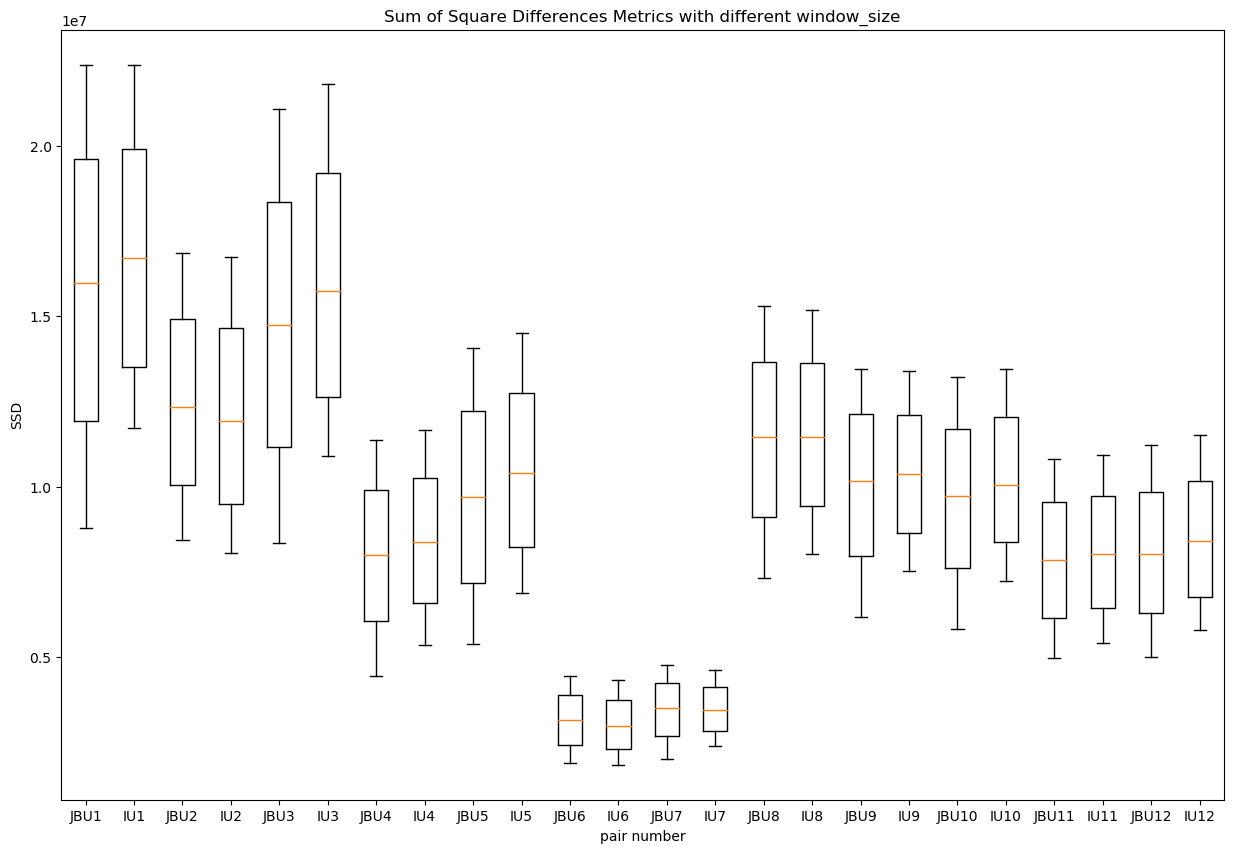

In [10]:
x_window=[3,5,9,11,15,17]
## Joint Bilateral Upsampling
## Pair (1)
SSD_JBU_1_3=SSD("../dataset/pair_1/results/window_size_3/pair1_3_10_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_5=SSD("../dataset/pair_1/results/window_size_5/pair1_5_10_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_9=SSD("../dataset/pair_1/results/window_size_9/pair1_9_10_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_11=SSD("../dataset/pair_1/results/window_size_11/pair1_11_10_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_15=SSD("../dataset/pair_1/results/window_size_15/pair1_15_10_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_17=SSD("../dataset/pair_1/results/window_size_17/pair1_17_10_JBU.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSD_JBU_2_3=SSD("../dataset/pair_2/results/window_size_3/pair2_3_10_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_5=SSD("../dataset/pair_2/results/window_size_5/pair2_5_10_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_9=SSD("../dataset/pair_2/results/window_size_9/pair2_9_10_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_11=SSD("../dataset/pair_2/results/window_size_11/pair2_11_10_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_15=SSD("../dataset/pair_2/results/window_size_15/pair2_15_10_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_17=SSD("../dataset/pair_2/results/window_size_17/pair2_17_10_JBU.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSD_JBU_3_3=SSD("../dataset/pair_3/results/window_size_3/pair3_3_10_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_5=SSD("../dataset/pair_3/results/window_size_5/pair3_5_10_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_9=SSD("../dataset/pair_3/results/window_size_9/pair3_9_10_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_11=SSD("../dataset/pair_3/results/window_size_11/pair3_11_10_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_15=SSD("../dataset/pair_3/results/window_size_15/pair3_15_10_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_17=SSD("../dataset/pair_3/results/window_size_17/pair3_17_10_JBU.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSD_JBU_4_3=SSD("../dataset/pair_4/results/window_size_3/pair4_3_10_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_5=SSD("../dataset/pair_4/results/window_size_5/pair4_5_10_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_9=SSD("../dataset/pair_4/results/window_size_9/pair4_9_10_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_11=SSD("../dataset/pair_4/results/window_size_11/pair4_11_10_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_15=SSD("../dataset/pair_4/results/window_size_15/pair4_15_10_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_17=SSD("../dataset/pair_4/results/window_size_17/pair4_17_10_JBU.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSD_JBU_5_3=SSD("../dataset/pair_5/results/window_size_3/pair5_3_10_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_5=SSD("../dataset/pair_5/results/window_size_5/pair5_5_10_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_9=SSD("../dataset/pair_5/results/window_size_9/pair5_9_10_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_11=SSD("../dataset/pair_5/results/window_size_11/pair5_11_10_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_15=SSD("../dataset/pair_5/results/window_size_15/pair5_15_10_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_17=SSD("../dataset/pair_5/results/window_size_17/pair5_17_10_JBU.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSD_JBU_6_3=SSD("../dataset/pair_6/results/window_size_3/pair6_3_10_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_5=SSD("../dataset/pair_6/results/window_size_5/pair6_5_10_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_9=SSD("../dataset/pair_6/results/window_size_9/pair6_9_10_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_11=SSD("../dataset/pair_6/results/window_size_11/pair6_11_10_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_15=SSD("../dataset/pair_6/results/window_size_15/pair6_15_10_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_17=SSD("../dataset/pair_6/results/window_size_17/pair6_17_10_JBU.png","../dataset/pair_6/disp1.png")

## Pair (7)
SSD_JBU_7_3=SSD("../dataset/pair_7/results/window_size_3/pair7_3_10_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_5=SSD("../dataset/pair_7/results/window_size_5/pair7_5_10_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_9=SSD("../dataset/pair_7/results/window_size_9/pair7_9_10_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_11=SSD("../dataset/pair_7/results/window_size_11/pair7_11_10_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_15=SSD("../dataset/pair_7/results/window_size_15/pair7_15_10_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_17=SSD("../dataset/pair_7/results/window_size_17/pair7_17_10_JBU.png","../dataset/pair_7/disp1.png")

## Pair (8)
SSD_JBU_8_3=SSD("../dataset/pair_8/results/window_size_3/pair8_3_10_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_5=SSD("../dataset/pair_8/results/window_size_5/pair8_5_10_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_9=SSD("../dataset/pair_8/results/window_size_9/pair8_9_10_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_11=SSD("../dataset/pair_8/results/window_size_11/pair8_11_10_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_15=SSD("../dataset/pair_8/results/window_size_15/pair8_15_10_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_17=SSD("../dataset/pair_8/results/window_size_17/pair8_17_10_JBU.png","../dataset/pair_8/disp1.png")

## Pair (9)
SSD_JBU_9_3=SSD("../dataset/pair_9/results/window_size_3/pair9_3_10_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_5=SSD("../dataset/pair_9/results/window_size_5/pair9_5_10_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_9=SSD("../dataset/pair_9/results/window_size_9/pair9_9_10_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_11=SSD("../dataset/pair_9/results/window_size_11/pair9_11_10_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_15=SSD("../dataset/pair_9/results/window_size_15/pair9_15_10_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_17=SSD("../dataset/pair_9/results/window_size_17/pair9_17_10_JBU.png","../dataset/pair_9/disp1.png")

## Pair (10)
SSD_JBU_10_3=SSD("../dataset/pair_10/results/window_size_3/pair10_3_10_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_5=SSD("../dataset/pair_10/results/window_size_5/pair10_5_10_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_9=SSD("../dataset/pair_10/results/window_size_9/pair10_9_10_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_11=SSD("../dataset/pair_10/results/window_size_11/pair10_11_10_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_15=SSD("../dataset/pair_10/results/window_size_15/pair10_15_10_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_17=SSD("../dataset/pair_10/results/window_size_17/pair10_17_10_JBU.png","../dataset/pair_10/disp1.png")

## Pair (11)
SSD_JBU_11_3=SSD("../dataset/pair_11/results/window_size_3/pair11_3_10_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_5=SSD("../dataset/pair_11/results/window_size_5/pair11_5_10_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_9=SSD("../dataset/pair_11/results/window_size_9/pair11_9_10_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_11=SSD("../dataset/pair_11/results/window_size_11/pair11_11_10_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_15=SSD("../dataset/pair_11/results/window_size_15/pair11_15_10_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_17=SSD("../dataset/pair_11/results/window_size_17/pair11_17_10_JBU.png","../dataset/pair_11/disp1.png")

## Pair (12)
SSD_JBU_12_3=SSD("../dataset/pair_12/results/window_size_3/pair12_3_10_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_5=SSD("../dataset/pair_12/results/window_size_5/pair12_5_10_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_9=SSD("../dataset/pair_12/results/window_size_9/pair12_9_10_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_11=SSD("../dataset/pair_12/results/window_size_11/pair12_11_10_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_15=SSD("../dataset/pair_12/results/window_size_15/pair12_15_10_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_17=SSD("../dataset/pair_12/results/window_size_17/pair12_17_10_JBU.png","../dataset/pair_12/disp1.png")


## Iterative Upsampling  
## Pair (1)
SSD_IU_1_3=SSD("../dataset/pair_1/results/window_size_3/pair1_3_10_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_5=SSD("../dataset/pair_1/results/window_size_5/pair1_5_10_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_9=SSD("../dataset/pair_1/results/window_size_9/pair1_9_10_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_11=SSD("../dataset/pair_1/results/window_size_11/pair1_11_10_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_15=SSD("../dataset/pair_1/results/window_size_15/pair1_15_10_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_17=SSD("../dataset/pair_1/results/window_size_17/pair1_17_10_IU.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSD_IU_2_3=SSD("../dataset/pair_2/results/window_size_3/pair2_3_10_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_5=SSD("../dataset/pair_2/results/window_size_5/pair2_5_10_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_9=SSD("../dataset/pair_2/results/window_size_9/pair2_9_10_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_11=SSD("../dataset/pair_2/results/window_size_11/pair2_11_10_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_15=SSD("../dataset/pair_2/results/window_size_15/pair2_15_10_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_17=SSD("../dataset/pair_2/results/window_size_17/pair2_17_10_IU.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSD_IU_3_3=SSD("../dataset/pair_3/results/window_size_3/pair3_3_10_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_5=SSD("../dataset/pair_3/results/window_size_5/pair3_5_10_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_9=SSD("../dataset/pair_3/results/window_size_9/pair3_9_10_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_11=SSD("../dataset/pair_3/results/window_size_11/pair3_11_10_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_15=SSD("../dataset/pair_3/results/window_size_15/pair3_15_10_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_17=SSD("../dataset/pair_3/results/window_size_17/pair3_17_10_IU.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSD_IU_4_3=SSD("../dataset/pair_4/results/window_size_3/pair4_3_10_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_5=SSD("../dataset/pair_4/results/window_size_5/pair4_5_10_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_9=SSD("../dataset/pair_4/results/window_size_9/pair4_9_10_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_11=SSD("../dataset/pair_4/results/window_size_11/pair4_11_10_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_15=SSD("../dataset/pair_4/results/window_size_15/pair4_15_10_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_17=SSD("../dataset/pair_4/results/window_size_17/pair4_17_10_IU.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSD_IU_5_3=SSD("../dataset/pair_5/results/window_size_3/pair5_3_10_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_5=SSD("../dataset/pair_5/results/window_size_5/pair5_5_10_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_9=SSD("../dataset/pair_5/results/window_size_9/pair5_9_10_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_11=SSD("../dataset/pair_5/results/window_size_11/pair5_11_10_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_15=SSD("../dataset/pair_5/results/window_size_15/pair5_15_10_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_17=SSD("../dataset/pair_5/results/window_size_17/pair5_17_10_IU.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSD_IU_6_3=SSD("../dataset/pair_6/results/window_size_3/pair6_3_10_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_5=SSD("../dataset/pair_6/results/window_size_5/pair6_5_10_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_9=SSD("../dataset/pair_6/results/window_size_9/pair6_9_10_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_11=SSD("../dataset/pair_6/results/window_size_11/pair6_11_10_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_15=SSD("../dataset/pair_6/results/window_size_15/pair6_15_10_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_17=SSD("../dataset/pair_6/results/window_size_17/pair6_17_10_IU.png","../dataset/pair_6/disp1.png")

## Pair (7)
SSD_IU_7_3=SSD("../dataset/pair_7/results/window_size_3/pair7_3_10_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_5=SSD("../dataset/pair_7/results/window_size_5/pair7_5_10_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_9=SSD("../dataset/pair_7/results/window_size_9/pair7_9_10_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_11=SSD("../dataset/pair_7/results/window_size_11/pair7_11_10_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_15=SSD("../dataset/pair_7/results/window_size_15/pair7_15_10_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_17=SSD("../dataset/pair_7/results/window_size_17/pair7_17_10_IU.png","../dataset/pair_7/disp1.png")

## Pair (8)
SSD_IU_8_3=SSD("../dataset/pair_8/results/window_size_3/pair8_3_10_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_5=SSD("../dataset/pair_8/results/window_size_5/pair8_5_10_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_9=SSD("../dataset/pair_8/results/window_size_9/pair8_9_10_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_11=SSD("../dataset/pair_8/results/window_size_11/pair8_11_10_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_15=SSD("../dataset/pair_8/results/window_size_15/pair8_15_10_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_17=SSD("../dataset/pair_8/results/window_size_17/pair8_17_10_IU.png","../dataset/pair_8/disp1.png")

## Pair (9)
SSD_IU_9_3=SSD("../dataset/pair_9/results/window_size_3/pair9_3_10_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_5=SSD("../dataset/pair_9/results/window_size_5/pair9_5_10_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_9=SSD("../dataset/pair_9/results/window_size_9/pair9_9_10_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_11=SSD("../dataset/pair_9/results/window_size_11/pair9_11_10_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_15=SSD("../dataset/pair_9/results/window_size_15/pair9_15_10_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_17=SSD("../dataset/pair_9/results/window_size_17/pair9_17_10_IU.png","../dataset/pair_9/disp1.png")

## Pair (10)
SSD_IU_10_3=SSD("../dataset/pair_10/results/window_size_3/pair10_3_10_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_5=SSD("../dataset/pair_10/results/window_size_5/pair10_5_10_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_9=SSD("../dataset/pair_10/results/window_size_9/pair10_9_10_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_11=SSD("../dataset/pair_10/results/window_size_11/pair10_11_10_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_15=SSD("../dataset/pair_10/results/window_size_15/pair10_15_10_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_17=SSD("../dataset/pair_10/results/window_size_17/pair10_17_10_IU.png","../dataset/pair_10/disp1.png")

## Pair (11)
SSD_IU_11_3=SSD("../dataset/pair_11/results/window_size_3/pair11_3_10_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_5=SSD("../dataset/pair_11/results/window_size_5/pair11_5_10_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_9=SSD("../dataset/pair_11/results/window_size_9/pair11_9_10_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_11=SSD("../dataset/pair_11/results/window_size_11/pair11_11_10_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_15=SSD("../dataset/pair_11/results/window_size_15/pair11_15_10_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_17=SSD("../dataset/pair_11/results/window_size_17/pair11_17_10_IU.png","../dataset/pair_11/disp1.png")

## Pair (12)
SSD_IU_12_3=SSD("../dataset/pair_12/results/window_size_3/pair12_3_10_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_5=SSD("../dataset/pair_12/results/window_size_5/pair12_5_10_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_9=SSD("../dataset/pair_12/results/window_size_9/pair12_9_10_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_11=SSD("../dataset/pair_12/results/window_size_11/pair12_11_10_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_15=SSD("../dataset/pair_12/results/window_size_15/pair12_15_10_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_17=SSD("../dataset/pair_12/results/window_size_17/pair12_17_10_IU.png","../dataset/pair_12/disp1.png")

# Plotting SSD 
JBU_Pair1_SSD=[SSD_JBU_1_3,SSD_JBU_1_5,SSD_JBU_1_9,SSD_JBU_1_11,SSD_JBU_1_15,SSD_JBU_1_17]
IU_Pair1_SSD=[SSD_IU_1_3,SSD_IU_1_5,SSD_IU_1_9,SSD_IU_1_11,SSD_IU_1_15,SSD_IU_1_17]

JBU_Pair2_SSD=[SSD_JBU_2_3,SSD_JBU_2_5,SSD_JBU_2_9,SSD_JBU_2_11,SSD_JBU_2_15,SSD_JBU_2_17]
IU_Pair2_SSD=[SSD_IU_2_3,SSD_IU_2_5,SSD_IU_2_9,SSD_IU_2_11,SSD_IU_2_15,SSD_IU_2_17]

JBU_Pair3_SSD=[SSD_JBU_3_3,SSD_JBU_3_5,SSD_JBU_3_9,SSD_JBU_3_11,SSD_JBU_3_15,SSD_JBU_3_17]
IU_Pair3_SSD=[SSD_IU_3_3,SSD_IU_3_5,SSD_IU_3_9,SSD_IU_3_11,SSD_IU_3_15,SSD_IU_3_17]

JBU_Pair4_SSD=[SSD_JBU_4_3,SSD_JBU_4_5,SSD_JBU_4_9,SSD_JBU_4_11,SSD_JBU_4_15,SSD_JBU_4_17]
IU_Pair4_SSD=[SSD_IU_4_3,SSD_IU_4_5,SSD_IU_4_9,SSD_IU_4_11,SSD_IU_4_15,SSD_IU_4_17]

JBU_Pair5_SSD=[SSD_JBU_5_3,SSD_JBU_5_5,SSD_JBU_5_9,SSD_JBU_5_11,SSD_JBU_5_15,SSD_JBU_5_17]
IU_Pair5_SSD=[SSD_IU_5_3,SSD_IU_5_5,SSD_IU_5_9,SSD_IU_5_11,SSD_IU_5_15,SSD_IU_5_17]

JBU_Pair6_SSD=[SSD_JBU_6_3,SSD_JBU_6_5,SSD_JBU_6_9,SSD_JBU_6_11,SSD_JBU_6_15,SSD_JBU_6_17]
IU_Pair6_SSD=[SSD_IU_6_3,SSD_IU_6_5,SSD_IU_6_9,SSD_IU_6_11,SSD_IU_6_15,SSD_IU_6_17]

JBU_Pair7_SSD=[SSD_JBU_7_3,SSD_JBU_7_5,SSD_JBU_7_9,SSD_JBU_7_11,SSD_JBU_7_15,SSD_JBU_7_17]
IU_Pair7_SSD=[SSD_IU_7_3,SSD_IU_7_5,SSD_IU_7_9,SSD_IU_7_11,SSD_IU_7_15,SSD_IU_7_17]

JBU_Pair8_SSD=[SSD_JBU_8_3,SSD_JBU_8_5,SSD_JBU_8_9,SSD_JBU_8_11,SSD_JBU_8_15,SSD_JBU_8_17]
IU_Pair8_SSD=[SSD_IU_8_3,SSD_IU_8_5,SSD_IU_8_9,SSD_IU_8_11,SSD_IU_8_15,SSD_IU_8_17]

JBU_Pair9_SSD=[SSD_JBU_9_3,SSD_JBU_9_5,SSD_JBU_9_9,SSD_JBU_9_11,SSD_JBU_9_15,SSD_JBU_9_17]
IU_Pair9_SSD=[SSD_IU_9_3,SSD_IU_9_5,SSD_IU_9_9,SSD_IU_9_11,SSD_IU_9_15,SSD_IU_9_17]

JBU_Pair10_SSD=[SSD_JBU_10_3,SSD_JBU_10_5,SSD_JBU_10_9,SSD_JBU_10_11,SSD_JBU_10_15,SSD_JBU_10_17]
IU_Pair10_SSD=[SSD_IU_10_3,SSD_IU_10_5,SSD_IU_10_9,SSD_IU_10_11,SSD_IU_10_15,SSD_IU_10_17]

JBU_Pair11_SSD=[SSD_JBU_11_3,SSD_JBU_11_5,SSD_JBU_11_9,SSD_JBU_11_11,SSD_JBU_11_15,SSD_JBU_11_17]
IU_Pair11_SSD=[SSD_IU_11_3,SSD_IU_11_5,SSD_IU_11_9,SSD_IU_11_11,SSD_IU_11_15,SSD_IU_11_17]

JBU_Pair12_SSD=[SSD_JBU_12_3,SSD_JBU_12_5,SSD_JBU_12_9,SSD_JBU_12_11,SSD_JBU_12_15,SSD_JBU_12_17]
IU_Pair12_SSD=[SSD_IU_12_3,SSD_IU_12_5,SSD_IU_12_9,SSD_IU_12_11,SSD_IU_12_15,SSD_IU_12_17]


plot_Metrics(["JBU1","IU1","JBU2","IU2","JBU3","IU3","JBU4","IU4","JBU5","IU5"
            ,"JBU6","IU6","JBU7","IU7","JBU8","IU8","JBU9","IU9","JBU10","IU10","JBU11","IU11"
            ,"JBU12","IU12"],JBU_Pair1_SSD,IU_Pair1_SSD,JBU_Pair2_SSD,IU_Pair2_SSD,JBU_Pair3_SSD,IU_Pair3_SSD
            ,JBU_Pair4_SSD,IU_Pair4_SSD,JBU_Pair5_SSD,IU_Pair5_SSD
            ,JBU_Pair6_SSD,IU_Pair6_SSD,JBU_Pair7_SSD,IU_Pair7_SSD,JBU_Pair8_SSD,IU_Pair8_SSD,JBU_Pair9_SSD,IU_Pair9_SSD
            ,JBU_Pair10_SSD,IU_Pair10_SSD,JBU_Pair11_SSD,IU_Pair11_SSD
            ,JBU_Pair12_SSD,IU_Pair12_SSD,"SSD","Sum of Square Differences Metrics with different window_size","pair number")

## Metrics with different Sigma Spectral

Different sigma spectral are used which are 5,10,15,20,50,100

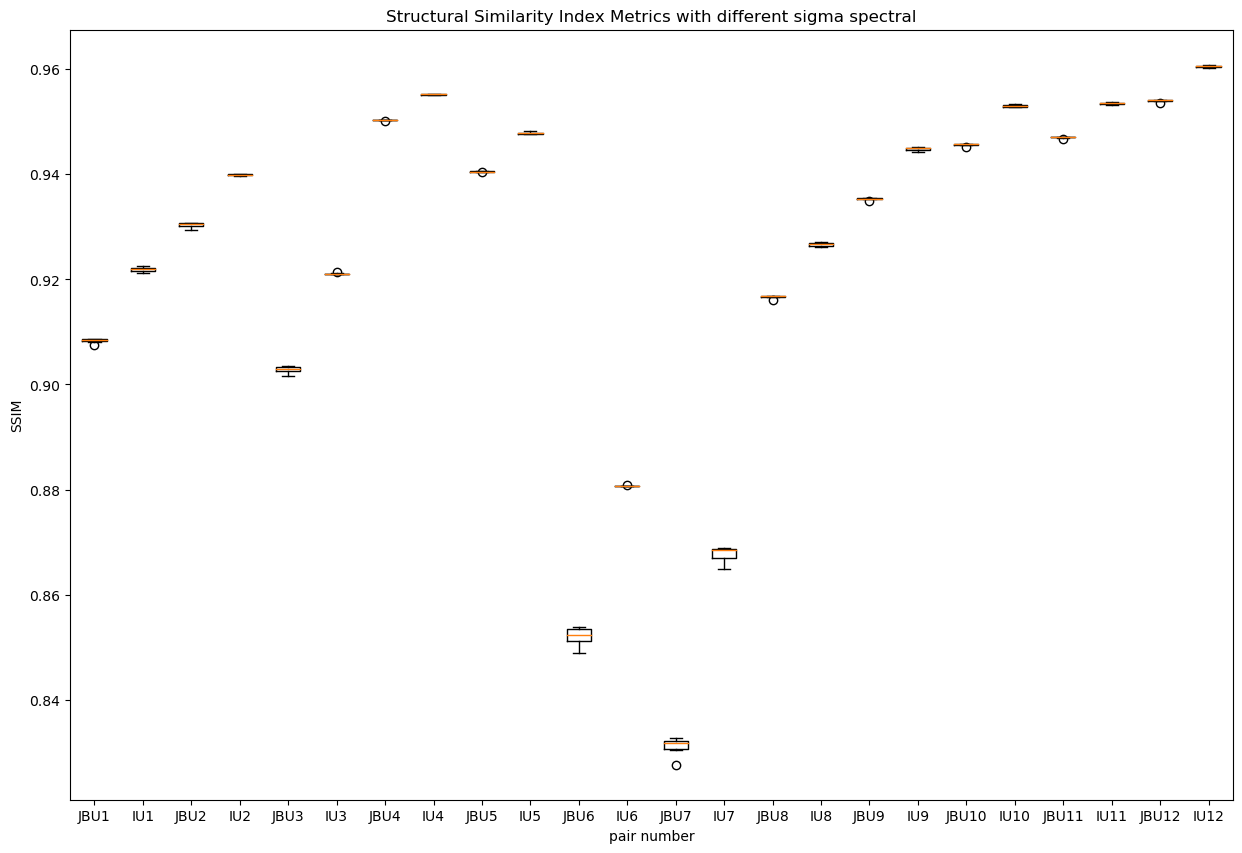

In [15]:
## JBU Approach
## Pair (1)
SSIM_JBU_1_5=SSIM("../dataset/pair_1/results/sigma_range_5/pair1_5_5_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_10=SSIM("../dataset/pair_1/results/window_size_5/pair1_5_10_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_15=SSIM("../dataset/pair_1/results/sigma_range_15/pair1_5_15_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_20=SSIM("../dataset/pair_1/results/sigma_range_20/pair1_5_20_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_50=SSIM("../dataset/pair_1/results/sigma_range_50/pair1_5_50_JBU.png","../dataset/pair_1/disp1.png")
SSIM_JBU_1_100=SSIM("../dataset/pair_1/results/sigma_range_100/pair1_5_100_JBU.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSIM_JBU_2_5=SSIM("../dataset/pair_2/results/sigma_range_5/pair2_5_5_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_10=SSIM("../dataset/pair_2/results/window_size_5/pair2_5_10_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_15=SSIM("../dataset/pair_2/results/sigma_range_15/pair2_5_15_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_20=SSIM("../dataset/pair_2/results/sigma_range_20/pair2_5_20_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_50=SSIM("../dataset/pair_2/results/sigma_range_50/pair2_5_50_JBU.png","../dataset/pair_2/disp1.png")
SSIM_JBU_2_100=SSIM("../dataset/pair_2/results/sigma_range_100/pair2_5_100_JBU.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSIM_JBU_3_5=SSIM("../dataset/pair_3/results/sigma_range_5/pair3_5_5_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_10=SSIM("../dataset/pair_3/results/window_size_5/pair3_5_10_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_15=SSIM("../dataset/pair_3/results/sigma_range_15/pair3_5_15_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_20=SSIM("../dataset/pair_3/results/sigma_range_20/pair3_5_20_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_50=SSIM("../dataset/pair_3/results/sigma_range_50/pair3_5_50_JBU.png","../dataset/pair_3/disp1.png")
SSIM_JBU_3_100=SSIM("../dataset/pair_3/results/sigma_range_100/pair3_5_100_JBU.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSIM_JBU_4_5=SSIM("../dataset/pair_4/results/sigma_range_5/pair4_5_5_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_10=SSIM("../dataset/pair_4/results/window_size_5/pair4_5_10_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_15=SSIM("../dataset/pair_4/results/sigma_range_15/pair4_5_15_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_20=SSIM("../dataset/pair_4/results/sigma_range_20/pair4_5_20_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_50=SSIM("../dataset/pair_4/results/sigma_range_50/pair4_5_50_JBU.png","../dataset/pair_4/disp1.png")
SSIM_JBU_4_100=SSIM("../dataset/pair_4/results/sigma_range_100/pair4_5_100_JBU.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSIM_JBU_5_5=SSIM("../dataset/pair_5/results/sigma_range_5/pair5_5_5_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_10=SSIM("../dataset/pair_5/results/window_size_5/pair5_5_10_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_15=SSIM("../dataset/pair_5/results/sigma_range_15/pair5_5_15_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_20=SSIM("../dataset/pair_5/results/sigma_range_20/pair5_5_20_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_50=SSIM("../dataset/pair_5/results/sigma_range_50/pair5_5_50_JBU.png","../dataset/pair_5/disp1.png")
SSIM_JBU_5_100=SSIM("../dataset/pair_5/results/sigma_range_100/pair5_5_100_JBU.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSIM_JBU_6_5=SSIM("../dataset/pair_6/results/sigma_range_5/pair6_5_5_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_10=SSIM("../dataset/pair_6/results/window_size_5/pair6_5_10_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_15=SSIM("../dataset/pair_6/results/sigma_range_15/pair6_5_15_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_20=SSIM("../dataset/pair_6/results/sigma_range_20/pair6_5_20_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_50=SSIM("../dataset/pair_6/results/sigma_range_50/pair6_5_50_JBU.png","../dataset/pair_6/disp1.png")
SSIM_JBU_6_100=SSIM("../dataset/pair_6/results/sigma_range_100/pair6_5_100_JBU.png","../dataset/pair_6/disp1.png")

## Pair (7)
SSIM_JBU_7_5=SSIM("../dataset/pair_7/results/sigma_range_5/pair7_5_5_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_10=SSIM("../dataset/pair_7/results/window_size_5/pair7_5_10_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_15=SSIM("../dataset/pair_7/results/sigma_range_15/pair7_5_15_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_20=SSIM("../dataset/pair_7/results/sigma_range_20/pair7_5_20_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_50=SSIM("../dataset/pair_7/results/sigma_range_50/pair7_5_50_JBU.png","../dataset/pair_7/disp1.png")
SSIM_JBU_7_100=SSIM("../dataset/pair_7/results/sigma_range_100/pair7_5_100_JBU.png","../dataset/pair_7/disp1.png")

## Pair (8)
SSIM_JBU_8_5=SSIM("../dataset/pair_8/results/sigma_range_5/pair8_5_5_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_10=SSIM("../dataset/pair_8/results/window_size_5/pair8_5_10_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_15=SSIM("../dataset/pair_8/results/sigma_range_15/pair8_5_15_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_20=SSIM("../dataset/pair_8/results/sigma_range_20/pair8_5_20_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_50=SSIM("../dataset/pair_8/results/sigma_range_50/pair8_5_50_JBU.png","../dataset/pair_8/disp1.png")
SSIM_JBU_8_100=SSIM("../dataset/pair_8/results/sigma_range_100/pair8_5_100_JBU.png","../dataset/pair_8/disp1.png")

## Pair (9)
SSIM_JBU_9_5=SSIM("../dataset/pair_9/results/sigma_range_5/pair9_5_5_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_10=SSIM("../dataset/pair_9/results/window_size_5/pair9_5_10_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_15=SSIM("../dataset/pair_9/results/sigma_range_15/pair9_5_15_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_20=SSIM("../dataset/pair_9/results/sigma_range_20/pair9_5_20_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_50=SSIM("../dataset/pair_9/results/sigma_range_50/pair9_5_50_JBU.png","../dataset/pair_9/disp1.png")
SSIM_JBU_9_100=SSIM("../dataset/pair_9/results/sigma_range_100/pair9_5_100_JBU.png","../dataset/pair_9/disp1.png")

## Pair (10)
SSIM_JBU_10_5=SSIM("../dataset/pair_10/results/sigma_range_5/pair10_5_5_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_10=SSIM("../dataset/pair_10/results/window_size_5/pair10_5_10_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_15=SSIM("../dataset/pair_10/results/sigma_range_15/pair10_5_15_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_20=SSIM("../dataset/pair_10/results/sigma_range_20/pair10_5_20_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_50=SSIM("../dataset/pair_10/results/sigma_range_50/pair10_5_50_JBU.png","../dataset/pair_10/disp1.png")
SSIM_JBU_10_100=SSIM("../dataset/pair_10/results/sigma_range_100/pair10_5_100_JBU.png","../dataset/pair_10/disp1.png")

## Pair (11)
SSIM_JBU_11_5=SSIM("../dataset/pair_11/results/sigma_range_5/pair11_5_5_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_10=SSIM("../dataset/pair_11/results/window_size_5/pair11_5_10_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_15=SSIM("../dataset/pair_11/results/sigma_range_15/pair11_5_15_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_20=SSIM("../dataset/pair_11/results/sigma_range_20/pair11_5_20_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_50=SSIM("../dataset/pair_11/results/sigma_range_50/pair11_5_50_JBU.png","../dataset/pair_11/disp1.png")
SSIM_JBU_11_100=SSIM("../dataset/pair_11/results/sigma_range_100/pair11_5_100_JBU.png","../dataset/pair_11/disp1.png")

## Pair (12)
SSIM_JBU_12_5=SSIM("../dataset/pair_12/results/sigma_range_5/pair12_5_5_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_10=SSIM("../dataset/pair_12/results/window_size_5/pair12_5_10_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_15=SSIM("../dataset/pair_12/results/sigma_range_15/pair12_5_15_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_20=SSIM("../dataset/pair_12/results/sigma_range_20/pair12_5_20_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_50=SSIM("../dataset/pair_12/results/sigma_range_50/pair12_5_50_JBU.png","../dataset/pair_12/disp1.png")
SSIM_JBU_12_100=SSIM("../dataset/pair_12/results/sigma_range_100/pair12_5_100_JBU.png","../dataset/pair_12/disp1.png")

## Iterative Upsampling
## Pair (1)
SSIM_IU_1_5=SSIM("../dataset/pair_1/results/sigma_range_5/pair1_5_5_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_10=SSIM("../dataset/pair_1/results/window_size_5/pair1_5_10_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_15=SSIM("../dataset/pair_1/results/sigma_range_15/pair1_5_15_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_20=SSIM("../dataset/pair_1/results/sigma_range_20/pair1_5_20_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_50=SSIM("../dataset/pair_1/results/sigma_range_50/pair1_5_50_IU.png","../dataset/pair_1/disp1.png")
SSIM_IU_1_100=SSIM("../dataset/pair_1/results/sigma_range_100/pair1_5_100_IU.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSIM_IU_2_5=SSIM("../dataset/pair_2/results/sigma_range_5/pair2_5_5_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_10=SSIM("../dataset/pair_2/results/window_size_5/pair2_5_10_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_15=SSIM("../dataset/pair_2/results/sigma_range_15/pair2_5_15_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_20=SSIM("../dataset/pair_2/results/sigma_range_20/pair2_5_20_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_50=SSIM("../dataset/pair_2/results/sigma_range_50/pair2_5_50_IU.png","../dataset/pair_2/disp1.png")
SSIM_IU_2_100=SSIM("../dataset/pair_2/results/sigma_range_100/pair2_5_100_IU.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSIM_IU_3_5=SSIM("../dataset/pair_3/results/sigma_range_5/pair3_5_5_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_10=SSIM("../dataset/pair_3/results/window_size_5/pair3_5_10_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_15=SSIM("../dataset/pair_3/results/sigma_range_15/pair3_5_15_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_20=SSIM("../dataset/pair_3/results/sigma_range_20/pair3_5_20_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_50=SSIM("../dataset/pair_3/results/sigma_range_50/pair3_5_50_IU.png","../dataset/pair_3/disp1.png")
SSIM_IU_3_100=SSIM("../dataset/pair_3/results/sigma_range_100/pair3_5_100_IU.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSIM_IU_4_5=SSIM("../dataset/pair_4/results/sigma_range_5/pair4_5_5_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_10=SSIM("../dataset/pair_4/results/window_size_5/pair4_5_10_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_15=SSIM("../dataset/pair_4/results/sigma_range_15/pair4_5_15_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_20=SSIM("../dataset/pair_4/results/sigma_range_20/pair4_5_20_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_50=SSIM("../dataset/pair_4/results/sigma_range_50/pair4_5_50_IU.png","../dataset/pair_4/disp1.png")
SSIM_IU_4_100=SSIM("../dataset/pair_4/results/sigma_range_100/pair4_5_100_IU.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSIM_IU_5_5=SSIM("../dataset/pair_5/results/sigma_range_5/pair5_5_5_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_10=SSIM("../dataset/pair_5/results/window_size_5/pair5_5_10_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_15=SSIM("../dataset/pair_5/results/sigma_range_15/pair5_5_15_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_20=SSIM("../dataset/pair_5/results/sigma_range_20/pair5_5_20_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_50=SSIM("../dataset/pair_5/results/sigma_range_50/pair5_5_50_IU.png","../dataset/pair_5/disp1.png")
SSIM_IU_5_100=SSIM("../dataset/pair_5/results/sigma_range_100/pair5_5_100_IU.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSIM_IU_6_5=SSIM("../dataset/pair_6/results/sigma_range_5/pair6_5_5_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_10=SSIM("../dataset/pair_6/results/window_size_5/pair6_5_10_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_15=SSIM("../dataset/pair_6/results/sigma_range_15/pair6_5_15_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_20=SSIM("../dataset/pair_6/results/sigma_range_20/pair6_5_20_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_50=SSIM("../dataset/pair_6/results/sigma_range_50/pair6_5_50_IU.png","../dataset/pair_6/disp1.png")
SSIM_IU_6_100=SSIM("../dataset/pair_6/results/sigma_range_100/pair6_5_100_IU.png","../dataset/pair_6/disp1.png")

## Pair (7)
SSIM_IU_7_5=SSIM("../dataset/pair_7/results/sigma_range_5/pair7_5_5_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_10=SSIM("../dataset/pair_7/results/window_size_5/pair7_5_10_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_15=SSIM("../dataset/pair_7/results/sigma_range_15/pair7_5_15_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_20=SSIM("../dataset/pair_7/results/sigma_range_20/pair7_5_20_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_50=SSIM("../dataset/pair_7/results/sigma_range_50/pair7_5_50_IU.png","../dataset/pair_7/disp1.png")
SSIM_IU_7_100=SSIM("../dataset/pair_7/results/sigma_range_100/pair7_5_100_IU.png","../dataset/pair_7/disp1.png")

## Pair (8)
SSIM_IU_8_5=SSIM("../dataset/pair_8/results/sigma_range_5/pair8_5_5_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_10=SSIM("../dataset/pair_8/results/window_size_5/pair8_5_10_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_15=SSIM("../dataset/pair_8/results/sigma_range_15/pair8_5_15_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_20=SSIM("../dataset/pair_8/results/sigma_range_20/pair8_5_20_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_50=SSIM("../dataset/pair_8/results/sigma_range_50/pair8_5_50_IU.png","../dataset/pair_8/disp1.png")
SSIM_IU_8_100=SSIM("../dataset/pair_8/results/sigma_range_100/pair8_5_100_IU.png","../dataset/pair_8/disp1.png")

## Pair (9)
SSIM_IU_9_5=SSIM("../dataset/pair_9/results/sigma_range_5/pair9_5_5_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_10=SSIM("../dataset/pair_9/results/window_size_5/pair9_5_10_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_15=SSIM("../dataset/pair_9/results/sigma_range_15/pair9_5_15_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_20=SSIM("../dataset/pair_9/results/sigma_range_20/pair9_5_20_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_50=SSIM("../dataset/pair_9/results/sigma_range_50/pair9_5_50_IU.png","../dataset/pair_9/disp1.png")
SSIM_IU_9_100=SSIM("../dataset/pair_9/results/sigma_range_100/pair9_5_100_IU.png","../dataset/pair_9/disp1.png")

## Pair (10)
SSIM_IU_10_5=SSIM("../dataset/pair_10/results/sigma_range_5/pair10_5_5_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_10=SSIM("../dataset/pair_10/results/window_size_5/pair10_5_10_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_15=SSIM("../dataset/pair_10/results/sigma_range_15/pair10_5_15_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_20=SSIM("../dataset/pair_10/results/sigma_range_20/pair10_5_20_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_50=SSIM("../dataset/pair_10/results/sigma_range_50/pair10_5_50_IU.png","../dataset/pair_10/disp1.png")
SSIM_IU_10_100=SSIM("../dataset/pair_10/results/sigma_range_100/pair10_5_100_IU.png","../dataset/pair_10/disp1.png")

## Pair (11)
SSIM_IU_11_5=SSIM("../dataset/pair_11/results/sigma_range_5/pair11_5_5_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_10=SSIM("../dataset/pair_11/results/window_size_5/pair11_5_10_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_15=SSIM("../dataset/pair_11/results/sigma_range_15/pair11_5_15_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_20=SSIM("../dataset/pair_11/results/sigma_range_20/pair11_5_20_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_50=SSIM("../dataset/pair_11/results/sigma_range_50/pair11_5_50_IU.png","../dataset/pair_11/disp1.png")
SSIM_IU_11_100=SSIM("../dataset/pair_11/results/sigma_range_100/pair11_5_100_IU.png","../dataset/pair_11/disp1.png")

## Pair (12)
SSIM_IU_12_5=SSIM("../dataset/pair_12/results/sigma_range_5/pair12_5_5_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_10=SSIM("../dataset/pair_12/results/window_size_5/pair12_5_10_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_15=SSIM("../dataset/pair_12/results/sigma_range_15/pair12_5_15_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_20=SSIM("../dataset/pair_12/results/sigma_range_20/pair12_5_20_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_50=SSIM("../dataset/pair_12/results/sigma_range_50/pair12_5_50_IU.png","../dataset/pair_12/disp1.png")
SSIM_IU_12_100=SSIM("../dataset/pair_12/results/sigma_range_100/pair12_5_100_IU.png","../dataset/pair_12/disp1.png")

# Plotting SSIM
JBU_Pair1_SSIM=[SSIM_JBU_1_5,SSIM_JBU_1_10,SSIM_JBU_1_15,SSIM_JBU_1_20,SSIM_JBU_1_50,SSIM_JBU_1_100]
IU_Pair1_SSIM=[SSIM_IU_1_5,SSIM_IU_1_10,SSIM_IU_1_15,SSIM_IU_1_20,SSIM_IU_1_50,SSIM_IU_1_100]

JBU_Pair2_SSIM=[SSIM_JBU_2_5,SSIM_JBU_2_10,SSIM_JBU_2_15,SSIM_JBU_2_20,SSIM_JBU_2_50,SSIM_JBU_2_100]
IU_Pair2_SSIM=[SSIM_IU_2_5,SSIM_IU_2_10,SSIM_IU_2_15,SSIM_IU_2_20,SSIM_IU_2_50,SSIM_IU_2_100]

JBU_Pair3_SSIM=[SSIM_JBU_3_5,SSIM_JBU_3_10,SSIM_JBU_3_15,SSIM_JBU_3_20,SSIM_JBU_3_50,SSIM_JBU_3_100]
IU_Pair3_SSIM=[SSIM_IU_3_5,SSIM_IU_3_10,SSIM_IU_3_15,SSIM_IU_3_20,SSIM_IU_3_50,SSIM_IU_3_100]

JBU_Pair4_SSIM=[SSIM_JBU_4_5,SSIM_JBU_4_10,SSIM_JBU_4_15,SSIM_JBU_4_20,SSIM_JBU_4_50,SSIM_JBU_4_100]
IU_Pair4_SSIM=[SSIM_IU_4_5,SSIM_IU_4_10,SSIM_IU_4_15,SSIM_IU_4_20,SSIM_IU_4_50,SSIM_IU_4_100]

JBU_Pair5_SSIM=[SSIM_JBU_5_5,SSIM_JBU_5_10,SSIM_JBU_5_15,SSIM_JBU_5_20,SSIM_JBU_5_50,SSIM_JBU_5_100]
IU_Pair5_SSIM=[SSIM_IU_5_5,SSIM_IU_5_10,SSIM_IU_5_15,SSIM_IU_5_20,SSIM_IU_5_50,SSIM_IU_5_100]

JBU_Pair6_SSIM=[SSIM_JBU_6_5,SSIM_JBU_6_10,SSIM_JBU_6_15,SSIM_JBU_6_20,SSIM_JBU_6_50,SSIM_JBU_6_100]
IU_Pair6_SSIM=[SSIM_IU_6_5,SSIM_IU_6_10,SSIM_IU_6_15,SSIM_IU_6_20,SSIM_IU_6_50,SSIM_IU_6_100]

JBU_Pair7_SSIM=[SSIM_JBU_7_5,SSIM_JBU_7_10,SSIM_JBU_7_15,SSIM_JBU_7_20,SSIM_JBU_7_50,SSIM_JBU_7_100]
IU_Pair7_SSIM=[SSIM_IU_7_5,SSIM_IU_7_10,SSIM_IU_7_15,SSIM_IU_7_20,SSIM_IU_7_50,SSIM_IU_7_100]

JBU_Pair8_SSIM=[SSIM_JBU_8_5,SSIM_JBU_8_10,SSIM_JBU_8_15,SSIM_JBU_8_20,SSIM_JBU_8_50,SSIM_JBU_8_100]
IU_Pair8_SSIM=[SSIM_IU_8_5,SSIM_IU_8_10,SSIM_IU_8_15,SSIM_IU_8_20,SSIM_IU_8_50,SSIM_IU_8_100]

JBU_Pair9_SSIM=[SSIM_JBU_9_5,SSIM_JBU_9_10,SSIM_JBU_9_15,SSIM_JBU_9_20,SSIM_JBU_9_50,SSIM_JBU_9_100]
IU_Pair9_SSIM=[SSIM_IU_9_5,SSIM_IU_9_10,SSIM_IU_9_15,SSIM_IU_9_20,SSIM_IU_9_50,SSIM_IU_9_100]

JBU_Pair10_SSIM=[SSIM_JBU_10_5,SSIM_JBU_10_10,SSIM_JBU_10_15,SSIM_JBU_10_20,SSIM_JBU_10_50,SSIM_JBU_10_100]
IU_Pair10_SSIM=[SSIM_IU_10_5,SSIM_IU_10_10,SSIM_IU_10_15,SSIM_IU_10_20,SSIM_IU_10_50,SSIM_IU_10_100]

JBU_Pair11_SSIM=[SSIM_JBU_11_5,SSIM_JBU_11_10,SSIM_JBU_11_15,SSIM_JBU_11_20,SSIM_JBU_11_50,SSIM_JBU_11_100]
IU_Pair11_SSIM=[SSIM_IU_11_5,SSIM_IU_11_10,SSIM_IU_11_15,SSIM_IU_11_20,SSIM_IU_11_50,SSIM_IU_11_100]

JBU_Pair12_SSIM=[SSIM_JBU_12_5,SSIM_JBU_12_10,SSIM_JBU_12_15,SSIM_JBU_12_20,SSIM_JBU_12_50,SSIM_JBU_12_100]
IU_Pair12_SSIM=[SSIM_IU_12_5,SSIM_IU_12_10,SSIM_IU_12_15,SSIM_IU_12_20,SSIM_IU_12_50,SSIM_IU_12_100]

plot_Metrics(["JBU1","IU1","JBU2","IU2","JBU3","IU3","JBU4","IU4","JBU5","IU5"
            ,"JBU6","IU6","JBU7","IU7","JBU8","IU8","JBU9","IU9","JBU10","IU10","JBU11","IU11"
            ,"JBU12","IU12"],JBU_Pair1_SSIM,IU_Pair1_SSIM,JBU_Pair2_SSIM,IU_Pair2_SSIM,JBU_Pair3_SSIM,IU_Pair3_SSIM
            ,JBU_Pair4_SSIM,IU_Pair4_SSIM,JBU_Pair5_SSIM,IU_Pair5_SSIM
            ,JBU_Pair6_SSIM,IU_Pair6_SSIM,JBU_Pair7_SSIM,IU_Pair7_SSIM,JBU_Pair8_SSIM,IU_Pair8_SSIM,JBU_Pair9_SSIM,IU_Pair9_SSIM
            ,JBU_Pair10_SSIM,IU_Pair10_SSIM,JBU_Pair11_SSIM,IU_Pair11_SSIM
            ,JBU_Pair12_SSIM,IU_Pair12_SSIM,"SSIM","Structural Similarity Index Metrics with different sigma spectral","pair number")

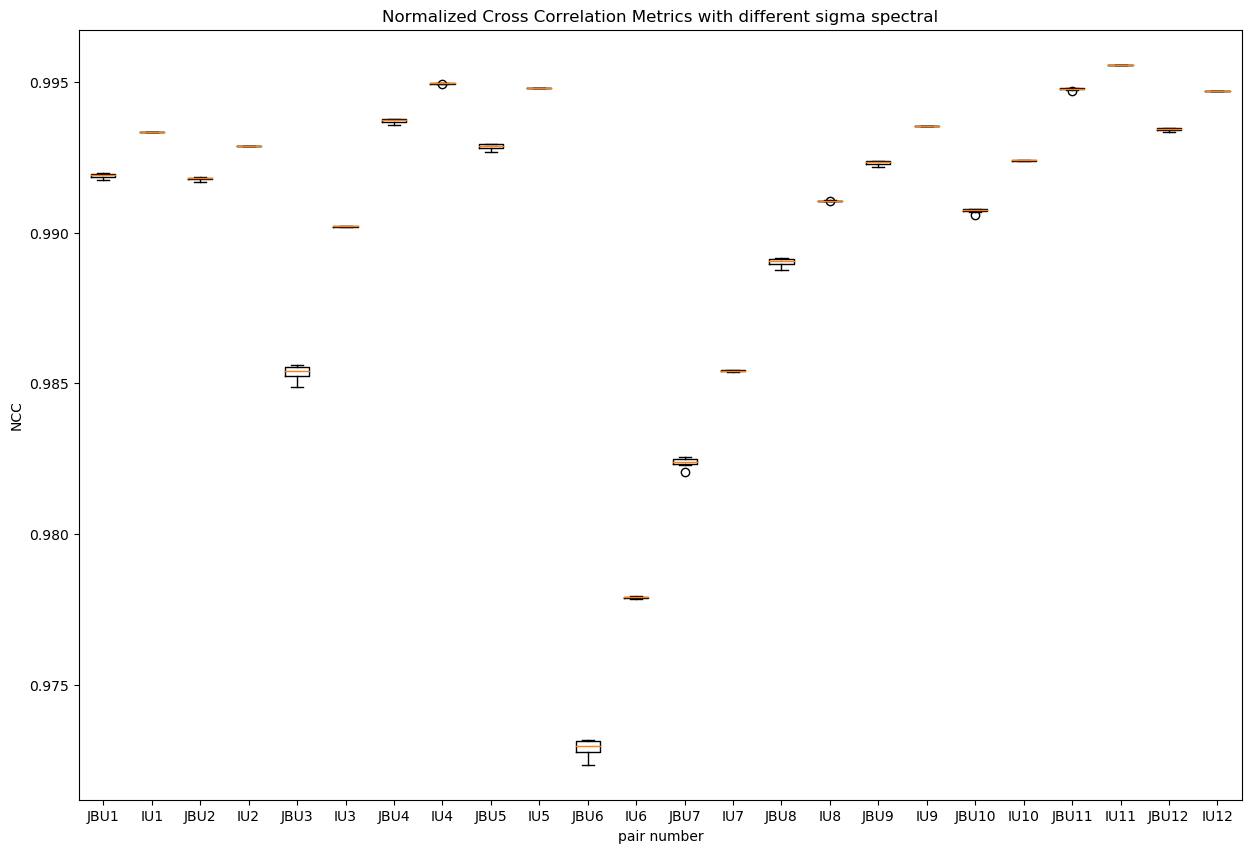

In [14]:
## JBU Approach
## Pair (1)
NCC_JBU_1_5=NCC("../dataset/pair_1/results/sigma_range_5/pair1_5_5_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_10=NCC("../dataset/pair_1/results/window_size_5/pair1_5_10_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_15=NCC("../dataset/pair_1/results/sigma_range_15/pair1_5_15_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_20=NCC("../dataset/pair_1/results/sigma_range_20/pair1_5_20_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_50=NCC("../dataset/pair_1/results/sigma_range_50/pair1_5_50_JBU.png","../dataset/pair_1/disp1.png")
NCC_JBU_1_100=NCC("../dataset/pair_1/results/sigma_range_100/pair1_5_100_JBU.png","../dataset/pair_1/disp1.png")

## Pair (2)
NCC_JBU_2_5=NCC("../dataset/pair_2/results/sigma_range_5/pair2_5_5_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_10=NCC("../dataset/pair_2/results/window_size_5/pair2_5_10_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_15=NCC("../dataset/pair_2/results/sigma_range_15/pair2_5_15_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_20=NCC("../dataset/pair_2/results/sigma_range_20/pair2_5_20_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_50=NCC("../dataset/pair_2/results/sigma_range_50/pair2_5_50_JBU.png","../dataset/pair_2/disp1.png")
NCC_JBU_2_100=NCC("../dataset/pair_2/results/sigma_range_100/pair2_5_100_JBU.png","../dataset/pair_2/disp1.png")

## Pair (3)
NCC_JBU_3_5=NCC("../dataset/pair_3/results/sigma_range_5/pair3_5_5_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_10=NCC("../dataset/pair_3/results/window_size_5/pair3_5_10_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_15=NCC("../dataset/pair_3/results/sigma_range_15/pair3_5_15_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_20=NCC("../dataset/pair_3/results/sigma_range_20/pair3_5_20_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_50=NCC("../dataset/pair_3/results/sigma_range_50/pair3_5_50_JBU.png","../dataset/pair_3/disp1.png")
NCC_JBU_3_100=NCC("../dataset/pair_3/results/sigma_range_100/pair3_5_100_JBU.png","../dataset/pair_3/disp1.png")

## Pair (4)
NCC_JBU_4_5=NCC("../dataset/pair_4/results/sigma_range_5/pair4_5_5_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_10=NCC("../dataset/pair_4/results/window_size_5/pair4_5_10_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_15=NCC("../dataset/pair_4/results/sigma_range_15/pair4_5_15_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_20=NCC("../dataset/pair_4/results/sigma_range_20/pair4_5_20_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_50=NCC("../dataset/pair_4/results/sigma_range_50/pair4_5_50_JBU.png","../dataset/pair_4/disp1.png")
NCC_JBU_4_100=NCC("../dataset/pair_4/results/sigma_range_100/pair4_5_100_JBU.png","../dataset/pair_4/disp1.png")

## Pair (5)
NCC_JBU_5_5=NCC("../dataset/pair_5/results/sigma_range_5/pair5_5_5_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_10=NCC("../dataset/pair_5/results/window_size_5/pair5_5_10_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_15=NCC("../dataset/pair_5/results/sigma_range_15/pair5_5_15_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_20=NCC("../dataset/pair_5/results/sigma_range_20/pair5_5_20_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_50=NCC("../dataset/pair_5/results/sigma_range_50/pair5_5_50_JBU.png","../dataset/pair_5/disp1.png")
NCC_JBU_5_100=NCC("../dataset/pair_5/results/sigma_range_100/pair5_5_100_JBU.png","../dataset/pair_5/disp1.png")

## Pair (6)
NCC_JBU_6_5=NCC("../dataset/pair_6/results/sigma_range_5/pair6_5_5_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_10=NCC("../dataset/pair_6/results/window_size_5/pair6_5_10_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_15=NCC("../dataset/pair_6/results/sigma_range_15/pair6_5_15_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_20=NCC("../dataset/pair_6/results/sigma_range_20/pair6_5_20_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_50=NCC("../dataset/pair_6/results/sigma_range_50/pair6_5_50_JBU.png","../dataset/pair_6/disp1.png")
NCC_JBU_6_100=NCC("../dataset/pair_6/results/sigma_range_100/pair6_5_100_JBU.png","../dataset/pair_6/disp1.png")

## Pair (7)
NCC_JBU_7_5=NCC("../dataset/pair_7/results/sigma_range_5/pair7_5_5_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_10=NCC("../dataset/pair_7/results/window_size_5/pair7_5_10_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_15=NCC("../dataset/pair_7/results/sigma_range_15/pair7_5_15_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_20=NCC("../dataset/pair_7/results/sigma_range_20/pair7_5_20_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_50=NCC("../dataset/pair_7/results/sigma_range_50/pair7_5_50_JBU.png","../dataset/pair_7/disp1.png")
NCC_JBU_7_100=NCC("../dataset/pair_7/results/sigma_range_100/pair7_5_100_JBU.png","../dataset/pair_7/disp1.png")

## Pair (8)
NCC_JBU_8_5=NCC("../dataset/pair_8/results/sigma_range_5/pair8_5_5_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_10=NCC("../dataset/pair_8/results/window_size_5/pair8_5_10_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_15=NCC("../dataset/pair_8/results/sigma_range_15/pair8_5_15_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_20=NCC("../dataset/pair_8/results/sigma_range_20/pair8_5_20_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_50=NCC("../dataset/pair_8/results/sigma_range_50/pair8_5_50_JBU.png","../dataset/pair_8/disp1.png")
NCC_JBU_8_100=NCC("../dataset/pair_8/results/sigma_range_100/pair8_5_100_JBU.png","../dataset/pair_8/disp1.png")

## Pair (9)
NCC_JBU_9_5=NCC("../dataset/pair_9/results/sigma_range_5/pair9_5_5_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_10=NCC("../dataset/pair_9/results/window_size_5/pair9_5_10_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_15=NCC("../dataset/pair_9/results/sigma_range_15/pair9_5_15_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_20=NCC("../dataset/pair_9/results/sigma_range_20/pair9_5_20_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_50=NCC("../dataset/pair_9/results/sigma_range_50/pair9_5_50_JBU.png","../dataset/pair_9/disp1.png")
NCC_JBU_9_100=NCC("../dataset/pair_9/results/sigma_range_100/pair9_5_100_JBU.png","../dataset/pair_9/disp1.png")

## Pair (10)
NCC_JBU_10_5=NCC("../dataset/pair_10/results/sigma_range_5/pair10_5_5_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_10=NCC("../dataset/pair_10/results/window_size_5/pair10_5_10_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_15=NCC("../dataset/pair_10/results/sigma_range_15/pair10_5_15_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_20=NCC("../dataset/pair_10/results/sigma_range_20/pair10_5_20_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_50=NCC("../dataset/pair_10/results/sigma_range_50/pair10_5_50_JBU.png","../dataset/pair_10/disp1.png")
NCC_JBU_10_100=NCC("../dataset/pair_10/results/sigma_range_100/pair10_5_100_JBU.png","../dataset/pair_10/disp1.png")

## Pair (11)
NCC_JBU_11_5=NCC("../dataset/pair_11/results/sigma_range_5/pair11_5_5_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_10=NCC("../dataset/pair_11/results/window_size_5/pair11_5_10_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_15=NCC("../dataset/pair_11/results/sigma_range_15/pair11_5_15_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_20=NCC("../dataset/pair_11/results/sigma_range_20/pair11_5_20_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_50=NCC("../dataset/pair_11/results/sigma_range_50/pair11_5_50_JBU.png","../dataset/pair_11/disp1.png")
NCC_JBU_11_100=NCC("../dataset/pair_11/results/sigma_range_100/pair11_5_100_JBU.png","../dataset/pair_11/disp1.png")

## Pair (12)
NCC_JBU_12_5=NCC("../dataset/pair_12/results/sigma_range_5/pair12_5_5_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_10=NCC("../dataset/pair_12/results/window_size_5/pair12_5_10_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_15=NCC("../dataset/pair_12/results/sigma_range_15/pair12_5_15_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_20=NCC("../dataset/pair_12/results/sigma_range_20/pair12_5_20_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_50=NCC("../dataset/pair_12/results/sigma_range_50/pair12_5_50_JBU.png","../dataset/pair_12/disp1.png")
NCC_JBU_12_100=NCC("../dataset/pair_12/results/sigma_range_100/pair12_5_100_JBU.png","../dataset/pair_12/disp1.png")

## Iterative Upsampling
## Pair (1)
NCC_IU_1_5=NCC("../dataset/pair_1/results/sigma_range_5/pair1_5_5_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_10=NCC("../dataset/pair_1/results/window_size_5/pair1_5_10_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_15=NCC("../dataset/pair_1/results/sigma_range_15/pair1_5_15_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_20=NCC("../dataset/pair_1/results/sigma_range_20/pair1_5_20_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_50=NCC("../dataset/pair_1/results/sigma_range_50/pair1_5_50_IU.png","../dataset/pair_1/disp1.png")
NCC_IU_1_100=NCC("../dataset/pair_1/results/sigma_range_100/pair1_5_100_IU.png","../dataset/pair_1/disp1.png")

## Pair (2)
NCC_IU_2_5=NCC("../dataset/pair_2/results/sigma_range_5/pair2_5_5_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_10=NCC("../dataset/pair_2/results/window_size_5/pair2_5_10_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_15=NCC("../dataset/pair_2/results/sigma_range_15/pair2_5_15_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_20=NCC("../dataset/pair_2/results/sigma_range_20/pair2_5_20_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_50=NCC("../dataset/pair_2/results/sigma_range_50/pair2_5_50_IU.png","../dataset/pair_2/disp1.png")
NCC_IU_2_100=NCC("../dataset/pair_2/results/sigma_range_100/pair2_5_100_IU.png","../dataset/pair_2/disp1.png")

## Pair (3)
NCC_IU_3_5=NCC("../dataset/pair_3/results/sigma_range_5/pair3_5_5_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_10=NCC("../dataset/pair_3/results/window_size_5/pair3_5_10_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_15=NCC("../dataset/pair_3/results/sigma_range_15/pair3_5_15_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_20=NCC("../dataset/pair_3/results/sigma_range_20/pair3_5_20_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_50=NCC("../dataset/pair_3/results/sigma_range_50/pair3_5_50_IU.png","../dataset/pair_3/disp1.png")
NCC_IU_3_100=NCC("../dataset/pair_3/results/sigma_range_100/pair3_5_100_IU.png","../dataset/pair_3/disp1.png")

## Pair (4)
NCC_IU_4_5=NCC("../dataset/pair_4/results/sigma_range_5/pair4_5_5_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_10=NCC("../dataset/pair_4/results/window_size_5/pair4_5_10_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_15=NCC("../dataset/pair_4/results/sigma_range_15/pair4_5_15_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_20=NCC("../dataset/pair_4/results/sigma_range_20/pair4_5_20_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_50=NCC("../dataset/pair_4/results/sigma_range_50/pair4_5_50_IU.png","../dataset/pair_4/disp1.png")
NCC_IU_4_100=NCC("../dataset/pair_4/results/sigma_range_100/pair4_5_100_IU.png","../dataset/pair_4/disp1.png")

## Pair (5)
NCC_IU_5_5=NCC("../dataset/pair_5/results/sigma_range_5/pair5_5_5_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_10=NCC("../dataset/pair_5/results/window_size_5/pair5_5_10_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_15=NCC("../dataset/pair_5/results/sigma_range_15/pair5_5_15_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_20=NCC("../dataset/pair_5/results/sigma_range_20/pair5_5_20_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_50=NCC("../dataset/pair_5/results/sigma_range_50/pair5_5_50_IU.png","../dataset/pair_5/disp1.png")
NCC_IU_5_100=NCC("../dataset/pair_5/results/sigma_range_100/pair5_5_100_IU.png","../dataset/pair_5/disp1.png")

## Pair (6)
NCC_IU_6_5=NCC("../dataset/pair_6/results/sigma_range_5/pair6_5_5_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_10=NCC("../dataset/pair_6/results/window_size_5/pair6_5_10_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_15=NCC("../dataset/pair_6/results/sigma_range_15/pair6_5_15_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_20=NCC("../dataset/pair_6/results/sigma_range_20/pair6_5_20_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_50=NCC("../dataset/pair_6/results/sigma_range_50/pair6_5_50_IU.png","../dataset/pair_6/disp1.png")
NCC_IU_6_100=NCC("../dataset/pair_6/results/sigma_range_100/pair6_5_100_IU.png","../dataset/pair_6/disp1.png")

## Pair (7)
NCC_IU_7_5=NCC("../dataset/pair_7/results/sigma_range_5/pair7_5_5_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_10=NCC("../dataset/pair_7/results/window_size_5/pair7_5_10_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_15=NCC("../dataset/pair_7/results/sigma_range_15/pair7_5_15_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_20=NCC("../dataset/pair_7/results/sigma_range_20/pair7_5_20_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_50=NCC("../dataset/pair_7/results/sigma_range_50/pair7_5_50_IU.png","../dataset/pair_7/disp1.png")
NCC_IU_7_100=NCC("../dataset/pair_7/results/sigma_range_100/pair7_5_100_IU.png","../dataset/pair_7/disp1.png")

## Pair (8)
NCC_IU_8_5=NCC("../dataset/pair_8/results/sigma_range_5/pair8_5_5_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_10=NCC("../dataset/pair_8/results/window_size_5/pair8_5_10_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_15=NCC("../dataset/pair_8/results/sigma_range_15/pair8_5_15_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_20=NCC("../dataset/pair_8/results/sigma_range_20/pair8_5_20_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_50=NCC("../dataset/pair_8/results/sigma_range_50/pair8_5_50_IU.png","../dataset/pair_8/disp1.png")
NCC_IU_8_100=NCC("../dataset/pair_8/results/sigma_range_100/pair8_5_100_IU.png","../dataset/pair_8/disp1.png")

## Pair (9)
NCC_IU_9_5=NCC("../dataset/pair_9/results/sigma_range_5/pair9_5_5_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_10=NCC("../dataset/pair_9/results/window_size_5/pair9_5_10_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_15=NCC("../dataset/pair_9/results/sigma_range_15/pair9_5_15_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_20=NCC("../dataset/pair_9/results/sigma_range_20/pair9_5_20_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_50=NCC("../dataset/pair_9/results/sigma_range_50/pair9_5_50_IU.png","../dataset/pair_9/disp1.png")
NCC_IU_9_100=NCC("../dataset/pair_9/results/sigma_range_100/pair9_5_100_IU.png","../dataset/pair_9/disp1.png")

## Pair (10)
NCC_IU_10_5=NCC("../dataset/pair_10/results/sigma_range_5/pair10_5_5_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_10=NCC("../dataset/pair_10/results/window_size_5/pair10_5_10_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_15=NCC("../dataset/pair_10/results/sigma_range_15/pair10_5_15_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_20=NCC("../dataset/pair_10/results/sigma_range_20/pair10_5_20_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_50=NCC("../dataset/pair_10/results/sigma_range_50/pair10_5_50_IU.png","../dataset/pair_10/disp1.png")
NCC_IU_10_100=NCC("../dataset/pair_10/results/sigma_range_100/pair10_5_100_IU.png","../dataset/pair_10/disp1.png")

## Pair (11)
NCC_IU_11_5=NCC("../dataset/pair_11/results/sigma_range_5/pair11_5_5_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_10=NCC("../dataset/pair_11/results/window_size_5/pair11_5_10_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_15=NCC("../dataset/pair_11/results/sigma_range_15/pair11_5_15_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_20=NCC("../dataset/pair_11/results/sigma_range_20/pair11_5_20_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_50=NCC("../dataset/pair_11/results/sigma_range_50/pair11_5_50_IU.png","../dataset/pair_11/disp1.png")
NCC_IU_11_100=NCC("../dataset/pair_11/results/sigma_range_100/pair11_5_100_IU.png","../dataset/pair_11/disp1.png")

## Pair (12)
NCC_IU_12_5=NCC("../dataset/pair_12/results/sigma_range_5/pair12_5_5_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_10=NCC("../dataset/pair_12/results/window_size_5/pair12_5_10_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_15=NCC("../dataset/pair_12/results/sigma_range_15/pair12_5_15_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_20=NCC("../dataset/pair_12/results/sigma_range_20/pair12_5_20_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_50=NCC("../dataset/pair_12/results/sigma_range_50/pair12_5_50_IU.png","../dataset/pair_12/disp1.png")
NCC_IU_12_100=NCC("../dataset/pair_12/results/sigma_range_100/pair12_5_100_IU.png","../dataset/pair_12/disp1.png")

# Plotting NCC 
JBU_Pair1_NCC=[NCC_JBU_1_5[0][0],NCC_JBU_1_10[0][0],NCC_JBU_1_15[0][0],NCC_JBU_1_20[0][0],NCC_JBU_1_50[0][0],NCC_JBU_1_100[0][0]]
IU_Pair1_NCC=[NCC_IU_1_5[0][0],NCC_IU_1_10[0][0],NCC_IU_1_15[0][0],NCC_IU_1_20[0][0],NCC_IU_1_50[0][0],NCC_IU_1_100[0][0]]

JBU_Pair2_NCC=[NCC_JBU_2_5[0][0],NCC_JBU_2_10[0][0],NCC_JBU_2_15[0][0],NCC_JBU_2_20[0][0],NCC_JBU_2_50[0][0],NCC_JBU_2_100[0][0]]
IU_Pair2_NCC=[NCC_IU_2_5[0][0],NCC_IU_2_10[0][0],NCC_IU_2_15[0][0],NCC_IU_2_20[0][0],NCC_IU_2_50[0][0],NCC_IU_2_100[0][0]]

JBU_Pair3_NCC=[NCC_JBU_3_5[0][0],NCC_JBU_3_10[0][0],NCC_JBU_3_15[0][0],NCC_JBU_3_20[0][0],NCC_JBU_3_50[0][0],NCC_JBU_3_100[0][0]]
IU_Pair3_NCC=[NCC_IU_3_5[0][0],NCC_IU_3_10[0][0],NCC_IU_3_15[0][0],NCC_IU_3_20[0][0],NCC_IU_3_50[0][0],NCC_IU_3_100[0][0]]

JBU_Pair4_NCC=[NCC_JBU_4_5[0][0],NCC_JBU_4_10[0][0],NCC_JBU_4_15[0][0],NCC_JBU_4_20[0][0],NCC_JBU_4_50[0][0],NCC_JBU_4_100[0][0]]
IU_Pair4_NCC=[NCC_IU_4_5[0][0],NCC_IU_4_10[0][0],NCC_IU_4_15[0][0],NCC_IU_4_20[0][0],NCC_IU_4_50[0][0],NCC_IU_4_100[0][0]]

JBU_Pair5_NCC=[NCC_JBU_5_5[0][0],NCC_JBU_5_10[0][0],NCC_JBU_5_15[0][0],NCC_JBU_5_20[0][0],NCC_JBU_5_50[0][0],NCC_JBU_5_100[0][0]]
IU_Pair5_NCC=[NCC_IU_5_5[0][0],NCC_IU_5_10[0][0],NCC_IU_5_15[0][0],NCC_IU_5_20[0][0],NCC_IU_5_50[0][0],NCC_IU_5_100[0][0]]

JBU_Pair6_NCC=[NCC_JBU_6_5[0][0],NCC_JBU_6_10[0][0],NCC_JBU_6_15[0][0],NCC_JBU_6_20[0][0],NCC_JBU_6_50[0][0],NCC_JBU_6_100[0][0]]
IU_Pair6_NCC=[NCC_IU_6_5[0][0],NCC_IU_6_10[0][0],NCC_IU_6_15[0][0],NCC_IU_6_20[0][0],NCC_IU_6_50[0][0],NCC_IU_6_100[0][0]]

JBU_Pair7_NCC=[NCC_JBU_7_5[0][0],NCC_JBU_7_10[0][0],NCC_JBU_7_15[0][0],NCC_JBU_7_20[0][0],NCC_JBU_7_50[0][0],NCC_JBU_7_100[0][0]]
IU_Pair7_NCC=[NCC_IU_7_5[0][0],NCC_IU_7_10[0][0],NCC_IU_7_15[0][0],NCC_IU_7_20[0][0],NCC_IU_7_50[0][0],NCC_IU_7_100[0][0]]

JBU_Pair8_NCC=[NCC_JBU_8_5[0][0],NCC_JBU_8_10[0][0],NCC_JBU_8_15[0][0],NCC_JBU_8_20[0][0],NCC_JBU_8_50[0][0],NCC_JBU_8_100[0][0]]
IU_Pair8_NCC=[NCC_IU_8_5[0][0],NCC_IU_8_10[0][0],NCC_IU_8_15[0][0],NCC_IU_8_20[0][0],NCC_IU_8_50[0][0],NCC_IU_8_100[0][0]]

JBU_Pair9_NCC=[NCC_JBU_9_5[0][0],NCC_JBU_9_10[0][0],NCC_JBU_9_15[0][0],NCC_JBU_9_20[0][0],NCC_JBU_9_50[0][0],NCC_JBU_9_100[0][0]]
IU_Pair9_NCC=[NCC_IU_9_5[0][0],NCC_IU_9_10[0][0],NCC_IU_9_15[0][0],NCC_IU_9_20[0][0],NCC_IU_9_50[0][0],NCC_IU_9_100[0][0]]

JBU_Pair10_NCC=[NCC_JBU_10_5[0][0],NCC_JBU_10_10[0][0],NCC_JBU_10_15[0][0],NCC_JBU_10_20[0][0],NCC_JBU_10_50[0][0],NCC_JBU_10_100[0][0]]
IU_Pair10_NCC=[NCC_IU_10_5[0][0],NCC_IU_10_10[0][0],NCC_IU_10_15[0][0],NCC_IU_10_20[0][0],NCC_IU_10_50[0][0],NCC_IU_10_100[0][0]]

JBU_Pair11_NCC=[NCC_JBU_11_5[0][0],NCC_JBU_11_10[0][0],NCC_JBU_11_15[0][0],NCC_JBU_11_20[0][0],NCC_JBU_11_50[0][0],NCC_JBU_11_100[0][0]]
IU_Pair11_NCC=[NCC_IU_11_5[0][0],NCC_IU_11_10[0][0],NCC_IU_11_15[0][0],NCC_IU_11_20[0][0],NCC_IU_11_50[0][0],NCC_IU_11_100[0][0]]

JBU_Pair12_NCC=[NCC_JBU_12_5[0][0],NCC_JBU_12_10[0][0],NCC_JBU_12_15[0][0],NCC_JBU_12_20[0][0],NCC_JBU_12_50[0][0],NCC_JBU_12_100[0][0]]
IU_Pair12_NCC=[NCC_IU_12_5[0][0],NCC_IU_12_10[0][0],NCC_IU_12_15[0][0],NCC_IU_12_20[0][0],NCC_IU_12_50[0][0],NCC_IU_12_100[0][0]]

plot_Metrics(["JBU1","IU1","JBU2","IU2","JBU3","IU3","JBU4","IU4","JBU5","IU5"
            ,"JBU6","IU6","JBU7","IU7","JBU8","IU8","JBU9","IU9","JBU10","IU10","JBU11","IU11"
            ,"JBU12","IU12"],JBU_Pair1_NCC,IU_Pair1_NCC,JBU_Pair2_NCC,IU_Pair2_NCC,JBU_Pair3_NCC,IU_Pair3_NCC
            ,JBU_Pair4_NCC,IU_Pair4_NCC,JBU_Pair5_NCC,IU_Pair5_NCC
            ,JBU_Pair6_NCC,IU_Pair6_NCC,JBU_Pair7_NCC,IU_Pair7_NCC,JBU_Pair8_NCC,IU_Pair8_NCC,JBU_Pair9_NCC,IU_Pair9_NCC
            ,JBU_Pair10_NCC,IU_Pair10_NCC,JBU_Pair11_NCC,IU_Pair11_NCC
            ,JBU_Pair12_NCC,IU_Pair12_NCC,"NCC","Normalized Cross Correlation Metrics with different sigma spectral","pair number")

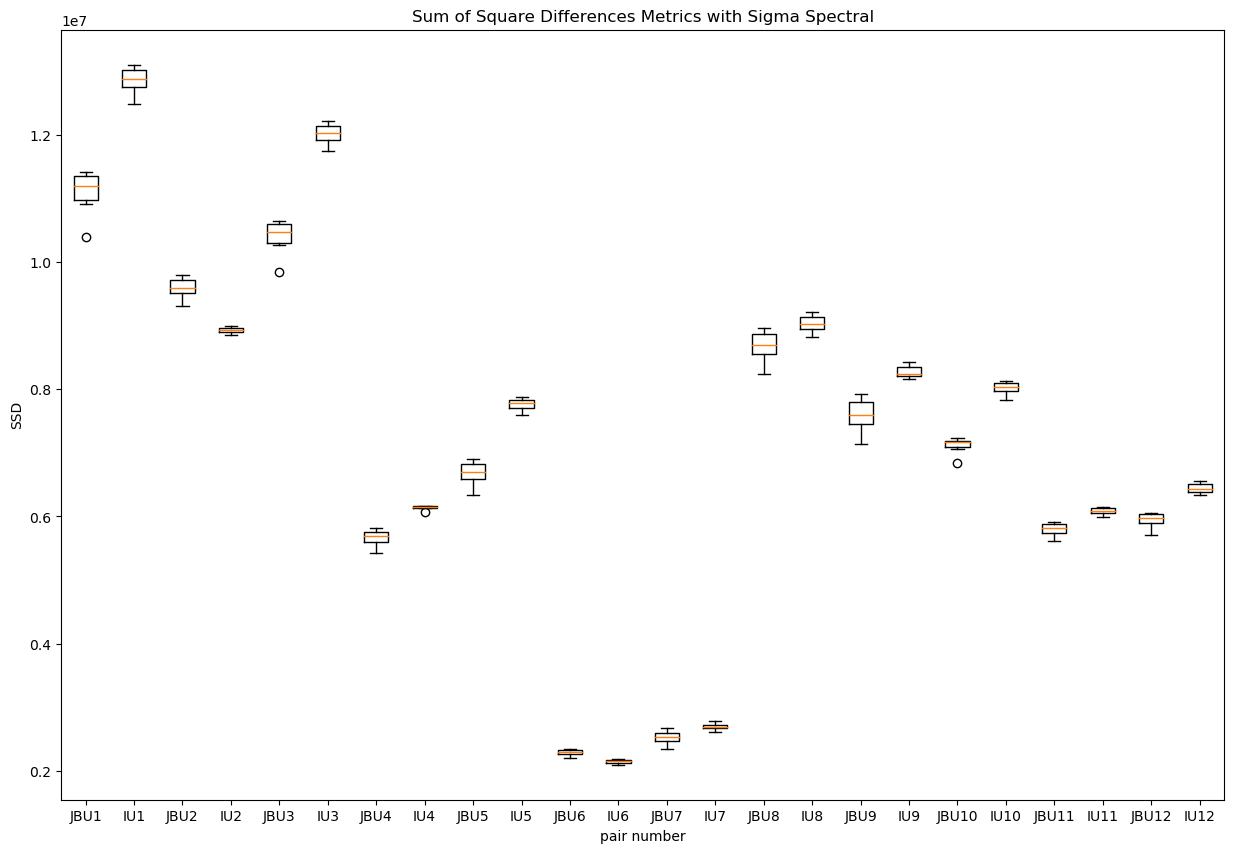

In [13]:
## Joint Bilateral Upsampling
## Pair (1)
SSD_JBU_1_5=SSD("../dataset/pair_1/results/sigma_range_5/pair1_5_5_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_10=SSD("../dataset/pair_1/results/window_size_5/pair1_5_10_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_15=SSD("../dataset/pair_1/results/sigma_range_15/pair1_5_15_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_20=SSD("../dataset/pair_1/results/sigma_range_20/pair1_5_20_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_50=SSD("../dataset/pair_1/results/sigma_range_50/pair1_5_50_JBU.png","../dataset/pair_1/disp1.png")
SSD_JBU_1_100=SSD("../dataset/pair_1/results/sigma_range_100/pair1_5_100_JBU.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSD_JBU_2_5=SSD("../dataset/pair_2/results/sigma_range_5/pair2_5_5_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_10=SSD("../dataset/pair_2/results/window_size_5/pair2_5_10_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_15=SSD("../dataset/pair_2/results/sigma_range_15/pair2_5_15_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_20=SSD("../dataset/pair_2/results/sigma_range_20/pair2_5_20_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_50=SSD("../dataset/pair_2/results/sigma_range_50/pair2_5_50_JBU.png","../dataset/pair_2/disp1.png")
SSD_JBU_2_100=SSD("../dataset/pair_2/results/sigma_range_100/pair2_5_100_JBU.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSD_JBU_3_5=SSD("../dataset/pair_3/results/sigma_range_5/pair3_5_5_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_10=SSD("../dataset/pair_3/results/window_size_5/pair3_5_10_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_15=SSD("../dataset/pair_3/results/sigma_range_15/pair3_5_15_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_20=SSD("../dataset/pair_3/results/sigma_range_20/pair3_5_20_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_50=SSD("../dataset/pair_3/results/sigma_range_50/pair3_5_50_JBU.png","../dataset/pair_3/disp1.png")
SSD_JBU_3_100=SSD("../dataset/pair_3/results/sigma_range_100/pair3_5_100_JBU.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSD_JBU_4_5=SSD("../dataset/pair_4/results/sigma_range_5/pair4_5_5_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_10=SSD("../dataset/pair_4/results/window_size_5/pair4_5_10_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_15=SSD("../dataset/pair_4/results/sigma_range_15/pair4_5_15_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_20=SSD("../dataset/pair_4/results/sigma_range_20/pair4_5_20_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_50=SSD("../dataset/pair_4/results/sigma_range_50/pair4_5_50_JBU.png","../dataset/pair_4/disp1.png")
SSD_JBU_4_100=SSD("../dataset/pair_4/results/sigma_range_100/pair4_5_100_JBU.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSD_JBU_5_5=SSD("../dataset/pair_5/results/sigma_range_5/pair5_5_5_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_10=SSD("../dataset/pair_5/results/window_size_5/pair5_5_10_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_15=SSD("../dataset/pair_5/results/sigma_range_15/pair5_5_15_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_20=SSD("../dataset/pair_5/results/sigma_range_20/pair5_5_20_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_50=SSD("../dataset/pair_5/results/sigma_range_50/pair5_5_50_JBU.png","../dataset/pair_5/disp1.png")
SSD_JBU_5_100=SSD("../dataset/pair_5/results/sigma_range_100/pair5_5_100_JBU.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSD_JBU_6_5=SSD("../dataset/pair_6/results/sigma_range_5/pair6_5_5_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_10=SSD("../dataset/pair_6/results/window_size_5/pair6_5_10_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_15=SSD("../dataset/pair_6/results/sigma_range_15/pair6_5_15_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_20=SSD("../dataset/pair_6/results/sigma_range_20/pair6_5_20_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_50=SSD("../dataset/pair_6/results/sigma_range_50/pair6_5_50_JBU.png","../dataset/pair_6/disp1.png")
SSD_JBU_6_100=SSD("../dataset/pair_6/results/sigma_range_100/pair6_5_100_JBU.png","../dataset/pair_6/disp1.png")

## Pair (7)
SSD_JBU_7_5=SSD("../dataset/pair_7/results/sigma_range_5/pair7_5_5_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_10=SSD("../dataset/pair_7/results/window_size_5/pair7_5_10_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_15=SSD("../dataset/pair_7/results/sigma_range_15/pair7_5_15_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_20=SSD("../dataset/pair_7/results/sigma_range_20/pair7_5_20_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_50=SSD("../dataset/pair_7/results/sigma_range_50/pair7_5_50_JBU.png","../dataset/pair_7/disp1.png")
SSD_JBU_7_100=SSD("../dataset/pair_7/results/sigma_range_100/pair7_5_100_JBU.png","../dataset/pair_7/disp1.png")

## Pair (8)
SSD_JBU_8_5=SSD("../dataset/pair_8/results/sigma_range_5/pair8_5_5_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_10=SSD("../dataset/pair_8/results/window_size_5/pair8_5_10_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_15=SSD("../dataset/pair_8/results/sigma_range_15/pair8_5_15_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_20=SSD("../dataset/pair_8/results/sigma_range_20/pair8_5_20_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_50=SSD("../dataset/pair_8/results/sigma_range_50/pair8_5_50_JBU.png","../dataset/pair_8/disp1.png")
SSD_JBU_8_100=SSD("../dataset/pair_8/results/sigma_range_100/pair8_5_100_JBU.png","../dataset/pair_8/disp1.png")

## Pair (9)
SSD_JBU_9_5=SSD("../dataset/pair_9/results/sigma_range_5/pair9_5_5_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_10=SSD("../dataset/pair_9/results/window_size_5/pair9_5_10_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_15=SSD("../dataset/pair_9/results/sigma_range_15/pair9_5_15_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_20=SSD("../dataset/pair_9/results/sigma_range_20/pair9_5_20_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_50=SSD("../dataset/pair_9/results/sigma_range_50/pair9_5_50_JBU.png","../dataset/pair_9/disp1.png")
SSD_JBU_9_100=SSD("../dataset/pair_9/results/sigma_range_100/pair9_5_100_JBU.png","../dataset/pair_9/disp1.png")

## Pair (10)
SSD_JBU_10_5=SSD("../dataset/pair_10/results/sigma_range_5/pair10_5_5_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_10=SSD("../dataset/pair_10/results/window_size_5/pair10_5_10_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_15=SSD("../dataset/pair_10/results/sigma_range_15/pair10_5_15_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_20=SSD("../dataset/pair_10/results/sigma_range_20/pair10_5_20_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_50=SSD("../dataset/pair_10/results/sigma_range_50/pair10_5_50_JBU.png","../dataset/pair_10/disp1.png")
SSD_JBU_10_100=SSD("../dataset/pair_10/results/sigma_range_100/pair10_5_100_JBU.png","../dataset/pair_10/disp1.png")

## Pair (11)
SSD_JBU_11_5=SSD("../dataset/pair_11/results/sigma_range_5/pair11_5_5_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_10=SSD("../dataset/pair_11/results/window_size_5/pair11_5_10_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_15=SSD("../dataset/pair_11/results/sigma_range_15/pair11_5_15_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_20=SSD("../dataset/pair_11/results/sigma_range_20/pair11_5_20_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_50=SSD("../dataset/pair_11/results/sigma_range_50/pair11_5_50_JBU.png","../dataset/pair_11/disp1.png")
SSD_JBU_11_100=SSD("../dataset/pair_11/results/sigma_range_100/pair11_5_100_JBU.png","../dataset/pair_11/disp1.png")

## Pair (12)
SSD_JBU_12_5=SSD("../dataset/pair_12/results/sigma_range_5/pair12_5_5_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_10=SSD("../dataset/pair_12/results/window_size_5/pair12_5_10_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_15=SSD("../dataset/pair_12/results/sigma_range_15/pair12_5_15_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_20=SSD("../dataset/pair_12/results/sigma_range_20/pair12_5_20_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_50=SSD("../dataset/pair_12/results/sigma_range_50/pair12_5_50_JBU.png","../dataset/pair_12/disp1.png")
SSD_JBU_12_100=SSD("../dataset/pair_12/results/sigma_range_100/pair12_5_100_JBU.png","../dataset/pair_12/disp1.png")

## Iterative Upsampling  
## Pair (1)
SSD_IU_1_5=SSD("../dataset/pair_1/results/sigma_range_5/pair1_5_5_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_10=SSD("../dataset/pair_1/results/window_size_5/pair1_5_10_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_15=SSD("../dataset/pair_1/results/sigma_range_15/pair1_5_15_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_20=SSD("../dataset/pair_1/results/sigma_range_20/pair1_5_20_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_50=SSD("../dataset/pair_1/results/sigma_range_50/pair1_5_50_IU.png","../dataset/pair_1/disp1.png")
SSD_IU_1_100=SSD("../dataset/pair_1/results/sigma_range_100/pair1_5_100_IU.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSD_IU_2_5=SSD("../dataset/pair_2/results/sigma_range_5/pair2_5_5_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_10=SSD("../dataset/pair_2/results/window_size_5/pair2_5_10_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_15=SSD("../dataset/pair_2/results/sigma_range_15/pair2_5_15_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_20=SSD("../dataset/pair_2/results/sigma_range_20/pair2_5_20_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_50=SSD("../dataset/pair_2/results/sigma_range_50/pair2_5_50_IU.png","../dataset/pair_2/disp1.png")
SSD_IU_2_100=SSD("../dataset/pair_2/results/sigma_range_100/pair2_5_100_IU.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSD_IU_3_5=SSD("../dataset/pair_3/results/sigma_range_5/pair3_5_5_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_10=SSD("../dataset/pair_3/results/window_size_5/pair3_5_10_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_15=SSD("../dataset/pair_3/results/sigma_range_15/pair3_5_15_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_20=SSD("../dataset/pair_3/results/sigma_range_20/pair3_5_20_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_50=SSD("../dataset/pair_3/results/sigma_range_50/pair3_5_50_IU.png","../dataset/pair_3/disp1.png")
SSD_IU_3_100=SSD("../dataset/pair_3/results/sigma_range_100/pair3_5_100_IU.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSD_IU_4_5=SSD("../dataset/pair_4/results/sigma_range_5/pair4_5_5_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_10=SSD("../dataset/pair_4/results/window_size_5/pair4_5_10_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_15=SSD("../dataset/pair_4/results/sigma_range_15/pair4_5_15_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_20=SSD("../dataset/pair_4/results/sigma_range_20/pair4_5_20_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_50=SSD("../dataset/pair_4/results/sigma_range_50/pair4_5_50_IU.png","../dataset/pair_4/disp1.png")
SSD_IU_4_100=SSD("../dataset/pair_4/results/sigma_range_100/pair4_5_100_IU.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSD_IU_5_5=SSD("../dataset/pair_5/results/sigma_range_5/pair5_5_5_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_10=SSD("../dataset/pair_5/results/window_size_5/pair5_5_10_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_15=SSD("../dataset/pair_5/results/sigma_range_15/pair5_5_15_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_20=SSD("../dataset/pair_5/results/sigma_range_20/pair5_5_20_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_50=SSD("../dataset/pair_5/results/sigma_range_50/pair5_5_50_IU.png","../dataset/pair_5/disp1.png")
SSD_IU_5_100=SSD("../dataset/pair_5/results/sigma_range_100/pair5_5_100_IU.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSD_IU_6_5=SSD("../dataset/pair_6/results/sigma_range_5/pair6_5_5_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_10=SSD("../dataset/pair_6/results/window_size_5/pair6_5_10_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_15=SSD("../dataset/pair_6/results/sigma_range_15/pair6_5_15_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_20=SSD("../dataset/pair_6/results/sigma_range_20/pair6_5_20_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_50=SSD("../dataset/pair_6/results/sigma_range_50/pair6_5_50_IU.png","../dataset/pair_6/disp1.png")
SSD_IU_6_100=SSD("../dataset/pair_6/results/sigma_range_100/pair6_5_100_IU.png","../dataset/pair_6/disp1.png")

## Pair (7)
SSD_IU_7_5=SSD("../dataset/pair_7/results/sigma_range_5/pair7_5_5_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_10=SSD("../dataset/pair_7/results/window_size_5/pair7_5_10_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_15=SSD("../dataset/pair_7/results/sigma_range_15/pair7_5_15_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_20=SSD("../dataset/pair_7/results/sigma_range_20/pair7_5_20_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_50=SSD("../dataset/pair_7/results/sigma_range_50/pair7_5_50_IU.png","../dataset/pair_7/disp1.png")
SSD_IU_7_100=SSD("../dataset/pair_7/results/sigma_range_100/pair7_5_100_IU.png","../dataset/pair_7/disp1.png")

## Pair (8)
SSD_IU_8_5=SSD("../dataset/pair_8/results/sigma_range_5/pair8_5_5_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_10=SSD("../dataset/pair_8/results/window_size_5/pair8_5_10_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_15=SSD("../dataset/pair_8/results/sigma_range_15/pair8_5_15_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_20=SSD("../dataset/pair_8/results/sigma_range_20/pair8_5_20_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_50=SSD("../dataset/pair_8/results/sigma_range_50/pair8_5_50_IU.png","../dataset/pair_8/disp1.png")
SSD_IU_8_100=SSD("../dataset/pair_8/results/sigma_range_100/pair8_5_100_IU.png","../dataset/pair_8/disp1.png")

## Pair (9)
SSD_IU_9_5=SSD("../dataset/pair_9/results/sigma_range_5/pair9_5_5_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_10=SSD("../dataset/pair_9/results/window_size_5/pair9_5_10_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_15=SSD("../dataset/pair_9/results/sigma_range_15/pair9_5_15_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_20=SSD("../dataset/pair_9/results/sigma_range_20/pair9_5_20_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_50=SSD("../dataset/pair_9/results/sigma_range_50/pair9_5_50_IU.png","../dataset/pair_9/disp1.png")
SSD_IU_9_100=SSD("../dataset/pair_9/results/sigma_range_100/pair9_5_100_IU.png","../dataset/pair_9/disp1.png")

## Pair (10)
SSD_IU_10_5=SSD("../dataset/pair_10/results/sigma_range_5/pair10_5_5_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_10=SSD("../dataset/pair_10/results/window_size_5/pair10_5_10_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_15=SSD("../dataset/pair_10/results/sigma_range_15/pair10_5_15_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_20=SSD("../dataset/pair_10/results/sigma_range_20/pair10_5_20_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_50=SSD("../dataset/pair_10/results/sigma_range_50/pair10_5_50_IU.png","../dataset/pair_10/disp1.png")
SSD_IU_10_100=SSD("../dataset/pair_10/results/sigma_range_100/pair10_5_100_IU.png","../dataset/pair_10/disp1.png")

## Pair (11)
SSD_IU_11_5=SSD("../dataset/pair_11/results/sigma_range_5/pair11_5_5_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_10=SSD("../dataset/pair_11/results/window_size_5/pair11_5_10_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_15=SSD("../dataset/pair_11/results/sigma_range_15/pair11_5_15_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_20=SSD("../dataset/pair_11/results/sigma_range_20/pair11_5_20_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_50=SSD("../dataset/pair_11/results/sigma_range_50/pair11_5_50_IU.png","../dataset/pair_11/disp1.png")
SSD_IU_11_100=SSD("../dataset/pair_11/results/sigma_range_100/pair11_5_100_IU.png","../dataset/pair_11/disp1.png")

## Pair (12)
SSD_IU_12_5=SSD("../dataset/pair_12/results/sigma_range_5/pair12_5_5_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_10=SSD("../dataset/pair_12/results/window_size_5/pair12_5_10_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_15=SSD("../dataset/pair_12/results/sigma_range_15/pair12_5_15_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_20=SSD("../dataset/pair_12/results/sigma_range_20/pair12_5_20_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_50=SSD("../dataset/pair_12/results/sigma_range_50/pair12_5_50_IU.png","../dataset/pair_12/disp1.png")
SSD_IU_12_100=SSD("../dataset/pair_12/results/sigma_range_100/pair12_5_100_IU.png","../dataset/pair_12/disp1.png")

# Plotting SSD 
JBU_Pair1_SSD=[SSD_JBU_1_5,SSD_JBU_1_10,SSD_JBU_1_15,SSD_JBU_1_20,SSD_JBU_1_50,SSD_JBU_1_100]
IU_Pair1_SSD=[SSD_IU_1_5,SSD_IU_1_10,SSD_IU_1_15,SSD_IU_1_20,SSD_IU_1_50,SSD_IU_1_100]

JBU_Pair2_SSD=[SSD_JBU_2_5,SSD_JBU_2_10,SSD_JBU_2_15,SSD_JBU_2_20,SSD_JBU_2_50,SSD_JBU_2_100]
IU_Pair2_SSD=[SSD_IU_2_5,SSD_IU_2_10,SSD_IU_2_15,SSD_IU_2_20,SSD_IU_2_50,SSD_IU_2_100]

JBU_Pair3_SSD=[SSD_JBU_3_5,SSD_JBU_3_10,SSD_JBU_3_15,SSD_JBU_3_20,SSD_JBU_3_50,SSD_JBU_3_100]
IU_Pair3_SSD=[SSD_IU_3_5,SSD_IU_3_10,SSD_IU_3_15,SSD_IU_3_20,SSD_IU_3_50,SSD_IU_3_100]

JBU_Pair4_SSD=[SSD_JBU_4_5,SSD_JBU_4_10,SSD_JBU_4_15,SSD_JBU_4_20,SSD_JBU_4_50,SSD_JBU_4_100]
IU_Pair4_SSD=[SSD_IU_4_5,SSD_IU_4_10,SSD_IU_4_15,SSD_IU_4_20,SSD_IU_4_50,SSD_IU_4_100]

JBU_Pair5_SSD=[SSD_JBU_5_5,SSD_JBU_5_10,SSD_JBU_5_15,SSD_JBU_5_20,SSD_JBU_5_50,SSD_JBU_5_100]
IU_Pair5_SSD=[SSD_IU_5_5,SSD_IU_5_10,SSD_IU_5_15,SSD_IU_5_20,SSD_IU_5_50,SSD_IU_5_100]

JBU_Pair6_SSD=[SSD_JBU_6_5,SSD_JBU_6_10,SSD_JBU_6_15,SSD_JBU_6_20,SSD_JBU_6_50,SSD_JBU_6_100]
IU_Pair6_SSD=[SSD_IU_6_5,SSD_IU_6_10,SSD_IU_6_15,SSD_IU_6_20,SSD_IU_6_50,SSD_IU_6_100]

JBU_Pair7_SSD=[SSD_JBU_7_5,SSD_JBU_7_10,SSD_JBU_7_15,SSD_JBU_7_20,SSD_JBU_7_50,SSD_JBU_7_100]
IU_Pair7_SSD=[SSD_IU_7_5,SSD_IU_7_10,SSD_IU_7_15,SSD_IU_7_20,SSD_IU_7_50,SSD_IU_7_100]

JBU_Pair8_SSD=[SSD_JBU_8_5,SSD_JBU_8_10,SSD_JBU_8_15,SSD_JBU_8_20,SSD_JBU_8_50,SSD_JBU_8_100]
IU_Pair8_SSD=[SSD_IU_8_5,SSD_IU_8_10,SSD_IU_8_15,SSD_IU_8_20,SSD_IU_8_50,SSD_IU_8_100]

JBU_Pair9_SSD=[SSD_JBU_9_5,SSD_JBU_9_10,SSD_JBU_9_15,SSD_JBU_9_20,SSD_JBU_9_50,SSD_JBU_9_100]
IU_Pair9_SSD=[SSD_IU_9_5,SSD_IU_9_10,SSD_IU_9_15,SSD_IU_9_20,SSD_IU_9_50,SSD_IU_9_100]

JBU_Pair10_SSD=[SSD_JBU_10_5,SSD_JBU_10_10,SSD_JBU_10_15,SSD_JBU_10_20,SSD_JBU_10_50,SSD_JBU_10_100]
IU_Pair10_SSD=[SSD_IU_10_5,SSD_IU_10_10,SSD_IU_10_15,SSD_IU_10_20,SSD_IU_10_50,SSD_IU_10_100]

JBU_Pair11_SSD=[SSD_JBU_11_5,SSD_JBU_11_10,SSD_JBU_11_15,SSD_JBU_11_20,SSD_JBU_11_50,SSD_JBU_11_100]
IU_Pair11_SSD=[SSD_IU_11_5,SSD_IU_11_10,SSD_IU_11_15,SSD_IU_11_20,SSD_IU_11_50,SSD_IU_11_100]

JBU_Pair12_SSD=[SSD_JBU_12_5,SSD_JBU_12_10,SSD_JBU_12_15,SSD_JBU_12_20,SSD_JBU_12_50,SSD_JBU_12_100]
IU_Pair12_SSD=[SSD_IU_12_5,SSD_IU_12_10,SSD_IU_12_15,SSD_IU_12_20,SSD_IU_12_50,SSD_IU_12_100]

plot_Metrics(["JBU1","IU1","JBU2","IU2","JBU3","IU3","JBU4","IU4","JBU5","IU5"
            ,"JBU6","IU6","JBU7","IU7","JBU8","IU8","JBU9","IU9","JBU10","IU10","JBU11","IU11"
            ,"JBU12","IU12"],JBU_Pair1_SSD,IU_Pair1_SSD,JBU_Pair2_SSD,IU_Pair2_SSD,JBU_Pair3_SSD,IU_Pair3_SSD
            ,JBU_Pair4_SSD,IU_Pair4_SSD,JBU_Pair5_SSD,IU_Pair5_SSD
            ,JBU_Pair6_SSD,IU_Pair6_SSD,JBU_Pair7_SSD,IU_Pair7_SSD,JBU_Pair8_SSD,IU_Pair8_SSD,JBU_Pair9_SSD,IU_Pair9_SSD
            ,JBU_Pair10_SSD,IU_Pair10_SSD,JBU_Pair11_SSD,IU_Pair11_SSD
            ,JBU_Pair12_SSD,IU_Pair12_SSD,"SSD","Sum of Square Differences Metrics with Sigma Spectral","pair number")

In [16]:
def time_processing(file,index):
    f = open(file, "r")
    content =int(f.readlines()[index].split("=")[1])
    return content

def plot_time(x,JBU1,IU1,JBU2,IU2,JBU3,IU3,JBU4,IU4,JBU5,IU5,JBU6,IU6,JBU7,IU7,JBU8,IU8,JBU9,IU9,JBU10,IU10,JBU11,IU11,JBU12,IU12,xlabel,title):
    fig = plt.figure(figsize =(15, 10))
    plt.boxplot([JBU1,IU1,JBU2,IU2,JBU3,IU3,JBU4,IU4,JBU5,IU5,JBU6,IU6,JBU7,IU7,JBU8,IU8,JBU9,IU9,JBU10,IU10,JBU11,IU11,JBU12,IU12],labels=x)
    plt.xlabel(xlabel)
    plt.ylabel("Time (sec)")
    plt.title(title)
    plt.show()

## Time Processing for different Sigma Spatial

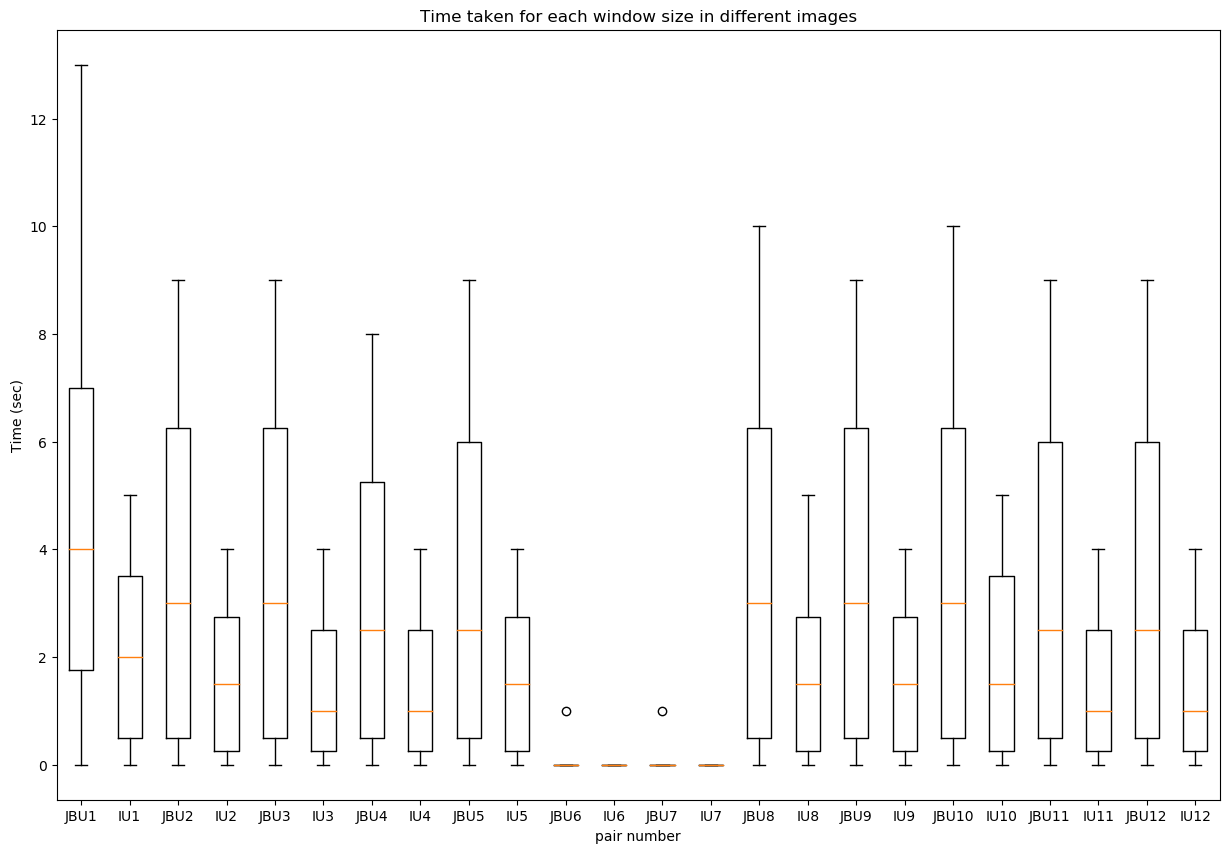

In [17]:
## Pair (1)
JBU1_3=time_processing("../dataset/pair_1/results/window_size_3/pair1_3_10.txt",3)
IU1_3=time_processing("../dataset/pair_1/results/window_size_3/pair1_3_10.txt",4)
JBU1_5=time_processing("../dataset/pair_1/results/window_size_5/pair1_5_10.txt",3)
IU1_5=time_processing("../dataset/pair_1/results/window_size_5/pair1_5_10.txt",4)
JBU1_9=time_processing("../dataset/pair_1/results/window_size_9/pair1_9_10.txt",3)
IU1_9=time_processing("../dataset/pair_1/results/window_size_9/pair1_9_10.txt",4)
JBU1_11=time_processing("../dataset/pair_1/results/window_size_11/pair1_11_10.txt",3)
IU1_11=time_processing("../dataset/pair_1/results/window_size_11/pair1_11_10.txt",4)
JBU1_15=time_processing("../dataset/pair_1/results/window_size_15/pair1_15_10.txt",3)
IU1_15=time_processing("../dataset/pair_1/results/window_size_15/pair1_15_10.txt",4)
JBU1_17=time_processing("../dataset/pair_1/results/window_size_17/pair1_17_10.txt",3)
IU1_17=time_processing("../dataset/pair_1/results/window_size_17/pair1_17_10.txt",4)

JBU1=[JBU1_3,JBU1_5,JBU1_9,JBU1_11,JBU1_15,JBU1_17]
IU1=[IU1_3,IU1_5,IU1_9,IU1_11,IU1_15,IU1_17]

## Pair (1)
JBU2_3=time_processing("../dataset/pair_2/results/window_size_3/pair2_3_10.txt",3)
IU2_3=time_processing("../dataset/pair_2/results/window_size_3/pair2_3_10.txt",4)
JBU2_5=time_processing("../dataset/pair_2/results/window_size_5/pair2_5_10.txt",3)
IU2_5=time_processing("../dataset/pair_2/results/window_size_5/pair2_5_10.txt",4)
JBU2_9=time_processing("../dataset/pair_2/results/window_size_9/pair2_9_10.txt",3)
IU2_9=time_processing("../dataset/pair_2/results/window_size_9/pair2_9_10.txt",4)
JBU2_11=time_processing("../dataset/pair_2/results/window_size_11/pair2_11_10.txt",3)
IU2_11=time_processing("../dataset/pair_2/results/window_size_11/pair2_11_10.txt",4)
JBU2_15=time_processing("../dataset/pair_2/results/window_size_15/pair2_15_10.txt",3)
IU2_15=time_processing("../dataset/pair_2/results/window_size_15/pair2_15_10.txt",4)
JBU2_17=time_processing("../dataset/pair_2/results/window_size_17/pair2_17_10.txt",3)
IU2_17=time_processing("../dataset/pair_2/results/window_size_17/pair2_17_10.txt",4)

JBU2=[JBU2_3,JBU2_5,JBU2_9,JBU2_11,JBU2_15,JBU2_17]
IU2=[IU2_3,IU2_5,IU2_9,IU2_11,IU2_15,IU2_17]

## Pair (3)
JBU3_3=time_processing("../dataset/pair_3/results/window_size_3/pair3_3_10.txt",3)
IU3_3=time_processing("../dataset/pair_3/results/window_size_3/pair3_3_10.txt",4)
JBU3_5=time_processing("../dataset/pair_3/results/window_size_5/pair3_5_10.txt",3)
IU3_5=time_processing("../dataset/pair_3/results/window_size_5/pair3_5_10.txt",4)
JBU3_9=time_processing("../dataset/pair_3/results/window_size_9/pair3_9_10.txt",3)
IU3_9=time_processing("../dataset/pair_3/results/window_size_9/pair3_9_10.txt",4)
JBU3_11=time_processing("../dataset/pair_3/results/window_size_11/pair3_11_10.txt",3)
IU3_11=time_processing("../dataset/pair_3/results/window_size_11/pair3_11_10.txt",4)
JBU3_15=time_processing("../dataset/pair_3/results/window_size_15/pair3_15_10.txt",3)
IU3_15=time_processing("../dataset/pair_3/results/window_size_15/pair3_15_10.txt",4)
JBU3_17=time_processing("../dataset/pair_3/results/window_size_17/pair3_17_10.txt",3)
IU3_17=time_processing("../dataset/pair_3/results/window_size_17/pair3_17_10.txt",4)

JBU3=[JBU3_3,JBU3_5,JBU3_9,JBU3_11,JBU3_15,JBU3_17]
IU3=[IU3_3,IU3_5,IU3_9,IU3_11,IU3_15,IU3_17]

## Pair (4)
JBU4_3=time_processing("../dataset/pair_4/results/window_size_3/pair4_3_10.txt",3)
IU4_3=time_processing("../dataset/pair_4/results/window_size_3/pair4_3_10.txt",4)
JBU4_5=time_processing("../dataset/pair_4/results/window_size_5/pair4_5_10.txt",3)
IU4_5=time_processing("../dataset/pair_4/results/window_size_5/pair4_5_10.txt",4)
JBU4_9=time_processing("../dataset/pair_4/results/window_size_9/pair4_9_10.txt",3)
IU4_9=time_processing("../dataset/pair_4/results/window_size_9/pair4_9_10.txt",4)
JBU4_11=time_processing("../dataset/pair_4/results/window_size_11/pair4_11_10.txt",3)
IU4_11=time_processing("../dataset/pair_4/results/window_size_11/pair4_11_10.txt",4)
JBU4_15=time_processing("../dataset/pair_4/results/window_size_15/pair4_15_10.txt",3)
IU4_15=time_processing("../dataset/pair_4/results/window_size_15/pair4_15_10.txt",4)
JBU4_17=time_processing("../dataset/pair_4/results/window_size_17/pair4_17_10.txt",3)
IU4_17=time_processing("../dataset/pair_4/results/window_size_17/pair4_17_10.txt",4)

JBU4=[JBU4_3,JBU4_5,JBU4_9,JBU4_11,JBU4_15,JBU4_17]
IU4=[IU4_3,IU4_5,IU4_9,IU4_11,IU4_15,IU4_17]

## Pair (5)
JBU5_3=time_processing("../dataset/pair_5/results/window_size_3/pair5_3_10.txt",3)
IU5_3=time_processing("../dataset/pair_5/results/window_size_3/pair5_3_10.txt",4)
JBU5_5=time_processing("../dataset/pair_5/results/window_size_5/pair5_5_10.txt",3)
IU5_5=time_processing("../dataset/pair_5/results/window_size_5/pair5_5_10.txt",4)
JBU5_9=time_processing("../dataset/pair_5/results/window_size_9/pair5_9_10.txt",3)
IU5_9=time_processing("../dataset/pair_5/results/window_size_9/pair5_9_10.txt",4)
JBU5_11=time_processing("../dataset/pair_5/results/window_size_11/pair5_11_10.txt",3)
IU5_11=time_processing("../dataset/pair_5/results/window_size_11/pair5_11_10.txt",4)
JBU5_15=time_processing("../dataset/pair_5/results/window_size_15/pair5_15_10.txt",3)
IU5_15=time_processing("../dataset/pair_5/results/window_size_15/pair5_15_10.txt",4)
JBU5_17=time_processing("../dataset/pair_5/results/window_size_17/pair5_17_10.txt",3)
IU5_17=time_processing("../dataset/pair_5/results/window_size_17/pair5_17_10.txt",4)

JBU5=[JBU5_3,JBU5_5,JBU5_9,JBU5_11,JBU5_15,JBU5_17]
IU5=[IU5_3,IU5_5,IU5_9,IU5_11,IU5_15,IU5_17]

## Pair (6)
JBU6_3=time_processing("../dataset/pair_6/results/window_size_3/pair6_3_10.txt",3)
IU6_3=time_processing("../dataset/pair_6/results/window_size_3/pair6_3_10.txt",4)
JBU6_5=time_processing("../dataset/pair_6/results/window_size_5/pair6_5_10.txt",3)
IU6_5=time_processing("../dataset/pair_6/results/window_size_5/pair6_5_10.txt",4)
JBU6_9=time_processing("../dataset/pair_6/results/window_size_9/pair6_9_10.txt",3)
IU6_9=time_processing("../dataset/pair_6/results/window_size_9/pair6_9_10.txt",4)
JBU6_11=time_processing("../dataset/pair_6/results/window_size_11/pair6_11_10.txt",3)
IU6_11=time_processing("../dataset/pair_6/results/window_size_11/pair6_11_10.txt",4)
JBU6_15=time_processing("../dataset/pair_6/results/window_size_15/pair6_15_10.txt",3)
IU6_15=time_processing("../dataset/pair_6/results/window_size_15/pair6_15_10.txt",4)
JBU6_17=time_processing("../dataset/pair_6/results/window_size_17/pair6_17_10.txt",3)
IU6_17=time_processing("../dataset/pair_6/results/window_size_17/pair6_17_10.txt",4)

JBU6=[JBU6_3,JBU6_5,JBU6_9,JBU6_11,JBU6_15,JBU6_17]
IU6=[IU6_3,IU6_5,IU6_9,IU6_11,IU6_15,IU6_17]

## Pair (7)
JBU7_3=time_processing("../dataset/pair_7/results/window_size_3/pair7_3_10.txt",3)
IU7_3=time_processing("../dataset/pair_7/results/window_size_3/pair7_3_10.txt",4)
JBU7_5=time_processing("../dataset/pair_7/results/window_size_5/pair7_5_10.txt",3)
IU7_5=time_processing("../dataset/pair_7/results/window_size_5/pair7_5_10.txt",4)
JBU7_9=time_processing("../dataset/pair_7/results/window_size_9/pair7_9_10.txt",3)
IU7_9=time_processing("../dataset/pair_7/results/window_size_9/pair7_9_10.txt",4)
JBU7_11=time_processing("../dataset/pair_7/results/window_size_11/pair7_11_10.txt",3)
IU7_11=time_processing("../dataset/pair_7/results/window_size_11/pair7_11_10.txt",4)
JBU7_15=time_processing("../dataset/pair_7/results/window_size_15/pair7_15_10.txt",3)
IU7_15=time_processing("../dataset/pair_7/results/window_size_15/pair7_15_10.txt",4)
JBU7_17=time_processing("../dataset/pair_7/results/window_size_17/pair7_17_10.txt",3)
IU7_17=time_processing("../dataset/pair_7/results/window_size_17/pair7_17_10.txt",4)

JBU7=[JBU7_3,JBU7_5,JBU7_9,JBU7_11,JBU7_15,JBU7_17]
IU7=[IU7_3,IU7_5,IU7_9,IU7_11,IU7_15,IU7_17]

## Pair (8)
JBU8_3=time_processing("../dataset/pair_8/results/window_size_3/pair8_3_10.txt",3)
IU8_3=time_processing("../dataset/pair_8/results/window_size_3/pair8_3_10.txt",4)
JBU8_5=time_processing("../dataset/pair_8/results/window_size_5/pair8_5_10.txt",3)
IU8_5=time_processing("../dataset/pair_8/results/window_size_5/pair8_5_10.txt",4)
JBU8_9=time_processing("../dataset/pair_8/results/window_size_9/pair8_9_10.txt",3)
IU8_9=time_processing("../dataset/pair_8/results/window_size_9/pair8_9_10.txt",4)
JBU8_11=time_processing("../dataset/pair_8/results/window_size_11/pair8_11_10.txt",3)
IU8_11=time_processing("../dataset/pair_8/results/window_size_11/pair8_11_10.txt",4)
JBU8_15=time_processing("../dataset/pair_8/results/window_size_15/pair8_15_10.txt",3)
IU8_15=time_processing("../dataset/pair_8/results/window_size_15/pair8_15_10.txt",4)
JBU8_17=time_processing("../dataset/pair_8/results/window_size_17/pair8_17_10.txt",3)
IU8_17=time_processing("../dataset/pair_8/results/window_size_17/pair8_17_10.txt",4)

JBU8=[JBU8_3,JBU8_5,JBU8_9,JBU8_11,JBU8_15,JBU8_17]
IU8=[IU8_3,IU8_5,IU8_9,IU8_11,IU8_15,IU8_17]

## Pair (9)
JBU9_3=time_processing("../dataset/pair_9/results/window_size_3/pair9_3_10.txt",3)
IU9_3=time_processing("../dataset/pair_9/results/window_size_3/pair9_3_10.txt",4)
JBU9_5=time_processing("../dataset/pair_9/results/window_size_5/pair9_5_10.txt",3)
IU9_5=time_processing("../dataset/pair_9/results/window_size_5/pair9_5_10.txt",4)
JBU9_9=time_processing("../dataset/pair_9/results/window_size_9/pair9_9_10.txt",3)
IU9_9=time_processing("../dataset/pair_9/results/window_size_9/pair9_9_10.txt",4)
JBU9_11=time_processing("../dataset/pair_9/results/window_size_11/pair9_11_10.txt",3)
IU9_11=time_processing("../dataset/pair_9/results/window_size_11/pair9_11_10.txt",4)
JBU9_15=time_processing("../dataset/pair_9/results/window_size_15/pair9_15_10.txt",3)
IU9_15=time_processing("../dataset/pair_9/results/window_size_15/pair9_15_10.txt",4)
JBU9_17=time_processing("../dataset/pair_9/results/window_size_17/pair9_17_10.txt",3)
IU9_17=time_processing("../dataset/pair_9/results/window_size_17/pair9_17_10.txt",4)

JBU9=[JBU9_3,JBU9_5,JBU9_9,JBU9_11,JBU9_15,JBU9_17]
IU9=[IU9_3,IU9_5,IU9_9,IU9_11,IU9_15,IU9_17]

## Pair (10)
JBU10_3=time_processing("../dataset/pair_10/results/window_size_3/pair10_3_10.txt",3)
IU10_3=time_processing("../dataset/pair_10/results/window_size_3/pair10_3_10.txt",4)
JBU10_5=time_processing("../dataset/pair_10/results/window_size_5/pair10_5_10.txt",3)
IU10_5=time_processing("../dataset/pair_10/results/window_size_5/pair10_5_10.txt",4)
JBU10_9=time_processing("../dataset/pair_10/results/window_size_9/pair10_9_10.txt",3)
IU10_9=time_processing("../dataset/pair_10/results/window_size_9/pair10_9_10.txt",4)
JBU10_11=time_processing("../dataset/pair_10/results/window_size_11/pair10_11_10.txt",3)
IU10_11=time_processing("../dataset/pair_10/results/window_size_11/pair10_11_10.txt",4)
JBU10_15=time_processing("../dataset/pair_10/results/window_size_15/pair10_15_10.txt",3)
IU10_15=time_processing("../dataset/pair_10/results/window_size_15/pair10_15_10.txt",4)
JBU10_17=time_processing("../dataset/pair_10/results/window_size_17/pair10_17_10.txt",3)
IU10_17=time_processing("../dataset/pair_10/results/window_size_17/pair10_17_10.txt",4)

JBU10=[JBU10_3,JBU10_5,JBU10_9,JBU10_11,JBU10_15,JBU10_17]
IU10=[IU10_3,IU10_5,IU4_9,IU10_11,IU10_15,IU10_17]

## Pair (11)
JBU11_3=time_processing("../dataset/pair_11/results/window_size_3/pair11_3_10.txt",3)
IU11_3=time_processing("../dataset/pair_11/results/window_size_3/pair11_3_10.txt",4)
JBU11_5=time_processing("../dataset/pair_11/results/window_size_5/pair11_5_10.txt",3)
IU11_5=time_processing("../dataset/pair_11/results/window_size_5/pair11_5_10.txt",4)
JBU11_9=time_processing("../dataset/pair_11/results/window_size_9/pair11_9_10.txt",3)
IU11_9=time_processing("../dataset/pair_11/results/window_size_9/pair11_9_10.txt",4)
JBU11_11=time_processing("../dataset/pair_11/results/window_size_11/pair11_11_10.txt",3)
IU11_11=time_processing("../dataset/pair_11/results/window_size_11/pair11_11_10.txt",4)
JBU11_15=time_processing("../dataset/pair_11/results/window_size_15/pair11_15_10.txt",3)
IU11_15=time_processing("../dataset/pair_11/results/window_size_15/pair11_15_10.txt",4)
JBU11_17=time_processing("../dataset/pair_11/results/window_size_17/pair11_17_10.txt",3)
IU11_17=time_processing("../dataset/pair_11/results/window_size_17/pair11_17_10.txt",4)

JBU11=[JBU11_3,JBU11_5,JBU11_9,JBU11_11,JBU11_15,JBU11_17]
IU11=[IU11_3,IU11_5,IU11_9,IU11_11,IU11_15,IU11_17]

## Pair (12)
JBU12_3=time_processing("../dataset/pair_12/results/window_size_3/pair12_3_10.txt",3)
IU12_3=time_processing("../dataset/pair_12/results/window_size_3/pair12_3_10.txt",4)
JBU12_5=time_processing("../dataset/pair_12/results/window_size_5/pair12_5_10.txt",3)
IU12_5=time_processing("../dataset/pair_12/results/window_size_5/pair12_5_10.txt",4)
JBU12_9=time_processing("../dataset/pair_12/results/window_size_9/pair12_9_10.txt",3)
IU12_9=time_processing("../dataset/pair_12/results/window_size_9/pair12_9_10.txt",4)
JBU12_11=time_processing("../dataset/pair_12/results/window_size_11/pair12_11_10.txt",3)
IU12_11=time_processing("../dataset/pair_12/results/window_size_11/pair12_11_10.txt",4)
JBU12_15=time_processing("../dataset/pair_12/results/window_size_15/pair12_15_10.txt",3)
IU12_15=time_processing("../dataset/pair_12/results/window_size_15/pair12_15_10.txt",4)
JBU12_17=time_processing("../dataset/pair_12/results/window_size_17/pair12_17_10.txt",3)
IU12_17=time_processing("../dataset/pair_12/results/window_size_17/pair12_17_10.txt",4)

JBU12=[JBU12_3,JBU12_5,JBU12_9,JBU12_11,JBU12_15,JBU12_17]
IU12=[IU12_3,IU12_5,IU12_9,IU12_11,IU12_15,IU12_17]

plot_time(["JBU1","IU1","JBU2","IU2","JBU3","IU3","JBU4","IU4","JBU5","IU5"
            ,"JBU6","IU6","JBU7","IU7","JBU8","IU8","JBU9","IU9","JBU10","IU10","JBU11","IU11"
            ,"JBU12","IU12"],JBU1,IU1,JBU2,IU2,JBU3,IU3,JBU4,IU4,JBU5,IU5,JBU6,IU6,
            JBU7,IU7,JBU8,IU8,JBU9,IU9,JBU10,IU10,JBU11,IU11,JBU12,IU12,"pair number","Time taken for each window size in different images")

## Time Processing for different Sigma Spectral

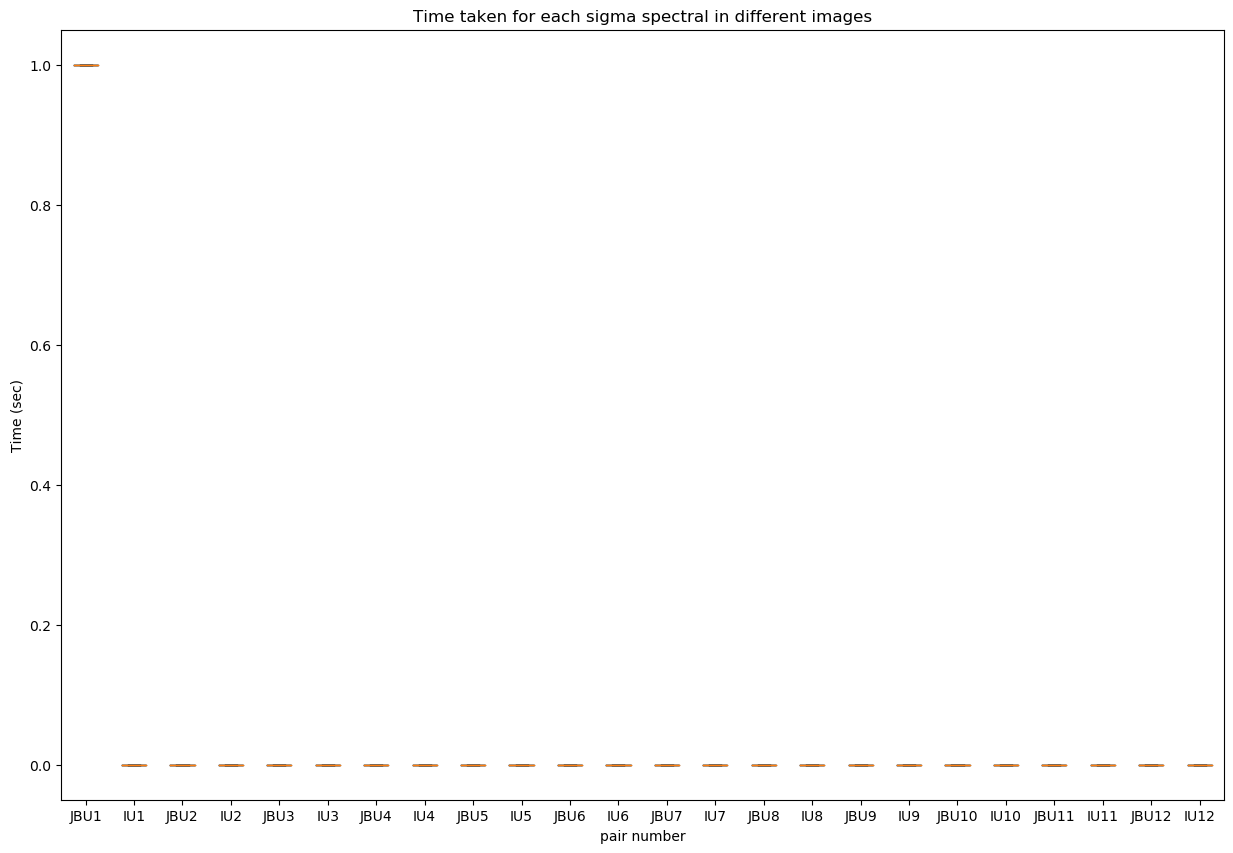

In [18]:
## Pair (1)
JBU1_5=time_processing("../dataset/pair_1/results/sigma_range_5/pair1_5_5.txt",3)
IU1_5=time_processing("../dataset/pair_1/results/sigma_range_5/pair1_5_5.txt",4)
JBU1_10=time_processing("../dataset/pair_1/results/window_size_5/pair1_5_10.txt",3)
IU1_10=time_processing("../dataset/pair_1/results/window_size_5/pair1_5_10.txt",4)
JBU1_15=time_processing("../dataset/pair_1/results/sigma_range_15/pair1_5_15.txt",3)
IU1_15=time_processing("../dataset/pair_1/results/sigma_range_15/pair1_5_15.txt",4)
JBU1_20=time_processing("../dataset/pair_1/results/sigma_range_20/pair1_5_20.txt",3)
IU1_20=time_processing("../dataset/pair_1/results/sigma_range_20/pair1_5_20.txt",4)
JBU1_50=time_processing("../dataset/pair_1/results/sigma_range_50/pair1_5_50.txt",3)
IU1_50=time_processing("../dataset/pair_1/results/sigma_range_50/pair1_5_50.txt",4)
JBU1_100=time_processing("../dataset/pair_1/results/sigma_range_100/pair1_5_100.txt",3)
IU1_100=time_processing("../dataset/pair_1/results/sigma_range_100/pair1_5_100.txt",4)

JBU1=[JBU1_5,JBU1_10,JBU1_15,JBU1_20,JBU1_50,JBU1_100]
IU1=[IU1_5,IU1_10,IU1_15,IU1_20,IU1_50,IU1_100]

## Pair (2)
JBU2_5=time_processing("../dataset/pair_2/results/sigma_range_5/pair2_5_5.txt",3)
IU2_5=time_processing("../dataset/pair_2/results/sigma_range_5/pair2_5_5.txt",4)
JBU2_10=time_processing("../dataset/pair_2/results/window_size_5/pair2_5_10.txt",3)
IU2_10=time_processing("../dataset/pair_2/results/window_size_5/pair2_5_10.txt",4)
JBU2_15=time_processing("../dataset/pair_2/results/sigma_range_15/pair2_5_15.txt",3)
IU2_15=time_processing("../dataset/pair_2/results/sigma_range_15/pair2_5_15.txt",4)
JBU2_20=time_processing("../dataset/pair_2/results/sigma_range_20/pair2_5_20.txt",3)
IU2_20=time_processing("../dataset/pair_2/results/sigma_range_20/pair2_5_20.txt",4)
JBU2_50=time_processing("../dataset/pair_2/results/sigma_range_50/pair2_5_50.txt",3)
IU2_50=time_processing("../dataset/pair_2/results/sigma_range_50/pair2_5_50.txt",4)
JBU2_100=time_processing("../dataset/pair_2/results/sigma_range_100/pair2_5_100.txt",3)
IU2_100=time_processing("../dataset/pair_2/results/sigma_range_100/pair2_5_100.txt",4)

JBU2=[JBU2_5,JBU2_10,JBU2_15,JBU2_20,JBU2_50,JBU2_100]
IU2=[IU2_5,IU2_10,IU2_15,IU2_20,IU2_50,IU2_100]

## Pair (3)
JBU3_5=time_processing("../dataset/pair_3/results/sigma_range_5/pair3_5_5.txt",3)
IU3_5=time_processing("../dataset/pair_3/results/sigma_range_5/pair3_5_5.txt",4)
JBU3_10=time_processing("../dataset/pair_3/results/window_size_5/pair3_5_10.txt",3)
IU3_10=time_processing("../dataset/pair_3/results/window_size_5/pair3_5_10.txt",4)
JBU3_15=time_processing("../dataset/pair_3/results/sigma_range_15/pair3_5_15.txt",3)
IU3_15=time_processing("../dataset/pair_3/results/sigma_range_15/pair3_5_15.txt",4)
JBU3_20=time_processing("../dataset/pair_3/results/sigma_range_20/pair3_5_20.txt",3)
IU3_20=time_processing("../dataset/pair_3/results/sigma_range_20/pair3_5_20.txt",4)
JBU3_50=time_processing("../dataset/pair_3/results/sigma_range_50/pair3_5_50.txt",3)
IU3_50=time_processing("../dataset/pair_3/results/sigma_range_50/pair3_5_50.txt",4)
JBU3_100=time_processing("../dataset/pair_3/results/sigma_range_100/pair3_5_100.txt",3)
IU3_100=time_processing("../dataset/pair_3/results/sigma_range_100/pair3_5_100.txt",4)

JBU3=[JBU3_5,JBU3_10,JBU3_15,JBU3_20,JBU3_50,JBU3_100]
IU3=[IU3_5,IU3_10,IU3_15,IU3_20,IU3_50,IU3_100]

## Pair (4)
JBU4_5=time_processing("../dataset/pair_4/results/sigma_range_5/pair4_5_5.txt",3)
IU4_5=time_processing("../dataset/pair_4/results/sigma_range_5/pair4_5_5.txt",4)
JBU4_10=time_processing("../dataset/pair_4/results/window_size_5/pair4_5_10.txt",3)
IU4_10=time_processing("../dataset/pair_4/results/window_size_5/pair4_5_10.txt",4)
JBU4_15=time_processing("../dataset/pair_4/results/sigma_range_15/pair4_5_15.txt",3)
IU4_15=time_processing("../dataset/pair_4/results/sigma_range_15/pair4_5_15.txt",4)
JBU4_20=time_processing("../dataset/pair_4/results/sigma_range_20/pair4_5_20.txt",3)
IU4_20=time_processing("../dataset/pair_4/results/sigma_range_20/pair4_5_20.txt",4)
JBU4_50=time_processing("../dataset/pair_4/results/sigma_range_50/pair4_5_50.txt",3)
IU4_50=time_processing("../dataset/pair_4/results/sigma_range_50/pair4_5_50.txt",4)
JBU4_100=time_processing("../dataset/pair_4/results/sigma_range_100/pair4_5_100.txt",3)
IU4_100=time_processing("../dataset/pair_4/results/sigma_range_100/pair4_5_100.txt",4)

JBU4=[JBU4_5,JBU4_10,JBU4_15,JBU4_20,JBU4_50,JBU4_100]
IU4=[IU4_5,IU4_10,IU4_15,IU4_20,IU4_50,IU4_100]

## Pair (5)
JBU5_5=time_processing("../dataset/pair_5/results/sigma_range_5/pair5_5_5.txt",3)
IU5_5=time_processing("../dataset/pair_5/results/sigma_range_5/pair5_5_5.txt",4)
JBU5_10=time_processing("../dataset/pair_5/results/window_size_5/pair5_5_10.txt",3)
IU5_10=time_processing("../dataset/pair_5/results/window_size_5/pair5_5_10.txt",4)
JBU5_15=time_processing("../dataset/pair_5/results/sigma_range_15/pair5_5_15.txt",3)
IU5_15=time_processing("../dataset/pair_5/results/sigma_range_15/pair5_5_15.txt",4)
JBU5_20=time_processing("../dataset/pair_5/results/sigma_range_20/pair5_5_20.txt",3)
IU5_20=time_processing("../dataset/pair_5/results/sigma_range_20/pair5_5_20.txt",4)
JBU5_50=time_processing("../dataset/pair_5/results/sigma_range_50/pair5_5_50.txt",3)
IU5_50=time_processing("../dataset/pair_5/results/sigma_range_50/pair5_5_50.txt",4)
JBU5_100=time_processing("../dataset/pair_5/results/sigma_range_100/pair5_5_100.txt",3)
IU5_100=time_processing("../dataset/pair_5/results/sigma_range_100/pair5_5_100.txt",4)

JBU5=[JBU5_5,JBU5_10,JBU5_15,JBU5_20,JBU5_50,JBU5_100]
IU5=[IU5_5,IU5_10,IU5_15,IU5_20,IU5_50,IU5_100]

## Pair (6)
JBU6_5=time_processing("../dataset/pair_6/results/sigma_range_5/pair6_5_5.txt",3)
IU6_5=time_processing("../dataset/pair_6/results/sigma_range_5/pair6_5_5.txt",4)
JBU6_10=time_processing("../dataset/pair_6/results/window_size_5/pair6_5_10.txt",3)
IU6_10=time_processing("../dataset/pair_6/results/window_size_5/pair6_5_10.txt",4)
JBU6_15=time_processing("../dataset/pair_6/results/sigma_range_15/pair6_5_15.txt",3)
IU6_15=time_processing("../dataset/pair_6/results/sigma_range_15/pair6_5_15.txt",4)
JBU6_20=time_processing("../dataset/pair_6/results/sigma_range_20/pair6_5_20.txt",3)
IU6_20=time_processing("../dataset/pair_6/results/sigma_range_20/pair6_5_20.txt",4)
JBU6_50=time_processing("../dataset/pair_6/results/sigma_range_50/pair6_5_50.txt",3)
IU6_50=time_processing("../dataset/pair_6/results/sigma_range_50/pair6_5_50.txt",4)
JBU6_100=time_processing("../dataset/pair_6/results/sigma_range_100/pair6_5_100.txt",3)
IU6_100=time_processing("../dataset/pair_6/results/sigma_range_100/pair6_5_100.txt",4)

JBU6=[JBU6_5,JBU6_10,JBU6_15,JBU6_20,JBU6_50,JBU6_100]
IU6=[IU6_5,IU6_10,IU6_15,IU6_20,IU6_50,IU6_100]

## Pair (7)
JBU7_5=time_processing("../dataset/pair_7/results/sigma_range_5/pair7_5_5.txt",3)
IU7_5=time_processing("../dataset/pair_7/results/sigma_range_5/pair7_5_5.txt",4)
JBU7_10=time_processing("../dataset/pair_7/results/window_size_5/pair7_5_10.txt",3)
IU7_10=time_processing("../dataset/pair_7/results/window_size_5/pair7_5_10.txt",4)
JBU7_15=time_processing("../dataset/pair_7/results/sigma_range_15/pair7_5_15.txt",3)
IU7_15=time_processing("../dataset/pair_7/results/sigma_range_15/pair7_5_15.txt",4)
JBU7_20=time_processing("../dataset/pair_7/results/sigma_range_20/pair7_5_20.txt",3)
IU7_20=time_processing("../dataset/pair_7/results/sigma_range_20/pair7_5_20.txt",4)
JBU7_50=time_processing("../dataset/pair_7/results/sigma_range_50/pair7_5_50.txt",3)
IU7_50=time_processing("../dataset/pair_7/results/sigma_range_50/pair7_5_50.txt",4)
JBU7_100=time_processing("../dataset/pair_7/results/sigma_range_100/pair7_5_100.txt",3)
IU7_100=time_processing("../dataset/pair_7/results/sigma_range_100/pair7_5_100.txt",4)

JBU7=[JBU7_5,JBU7_10,JBU7_15,JBU7_20,JBU7_50,JBU7_100]
IU7=[IU7_5,IU7_10,IU7_15,IU7_20,IU7_50,IU7_100]

## Pair (8)
JBU8_5=time_processing("../dataset/pair_8/results/sigma_range_5/pair8_5_5.txt",3)
IU8_5=time_processing("../dataset/pair_8/results/sigma_range_5/pair8_5_5.txt",4)
JBU8_10=time_processing("../dataset/pair_8/results/window_size_5/pair8_5_10.txt",3)
IU8_10=time_processing("../dataset/pair_8/results/window_size_5/pair8_5_10.txt",4)
JBU8_15=time_processing("../dataset/pair_8/results/sigma_range_15/pair8_5_15.txt",3)
IU8_15=time_processing("../dataset/pair_8/results/sigma_range_15/pair8_5_15.txt",4)
JBU8_20=time_processing("../dataset/pair_8/results/sigma_range_20/pair8_5_20.txt",3)
IU8_20=time_processing("../dataset/pair_8/results/sigma_range_20/pair8_5_20.txt",4)
JBU8_50=time_processing("../dataset/pair_8/results/sigma_range_50/pair8_5_50.txt",3)
IU8_50=time_processing("../dataset/pair_8/results/sigma_range_50/pair8_5_50.txt",4)
JBU8_100=time_processing("../dataset/pair_8/results/sigma_range_100/pair8_5_100.txt",3)
IU8_100=time_processing("../dataset/pair_8/results/sigma_range_100/pair8_5_100.txt",4)

JBU8=[JBU8_5,JBU8_10,JBU8_15,JBU8_20,JBU8_50,JBU8_100]
IU8=[IU8_5,IU8_10,IU8_15,IU8_20,IU8_50,IU8_100]

## Pair (9)
JBU9_5=time_processing("../dataset/pair_9/results/sigma_range_5/pair9_5_5.txt",3)
IU9_5=time_processing("../dataset/pair_9/results/sigma_range_5/pair9_5_5.txt",4)
JBU9_10=time_processing("../dataset/pair_9/results/window_size_5/pair9_5_10.txt",3)
IU9_10=time_processing("../dataset/pair_9/results/window_size_5/pair9_5_10.txt",4)
JBU9_15=time_processing("../dataset/pair_9/results/sigma_range_15/pair9_5_15.txt",3)
IU9_15=time_processing("../dataset/pair_9/results/sigma_range_15/pair9_5_15.txt",4)
JBU9_20=time_processing("../dataset/pair_9/results/sigma_range_20/pair9_5_20.txt",3)
IU9_20=time_processing("../dataset/pair_9/results/sigma_range_20/pair9_5_20.txt",4)
JBU9_50=time_processing("../dataset/pair_9/results/sigma_range_50/pair9_5_50.txt",3)
IU9_50=time_processing("../dataset/pair_9/results/sigma_range_50/pair9_5_50.txt",4)
JBU9_100=time_processing("../dataset/pair_9/results/sigma_range_100/pair9_5_100.txt",3)
IU9_100=time_processing("../dataset/pair_9/results/sigma_range_100/pair9_5_100.txt",4)

JBU9=[JBU9_5,JBU9_10,JBU9_15,JBU9_20,JBU9_50,JBU9_100]
IU9=[IU9_5,IU9_10,IU9_15,IU9_20,IU9_50,IU9_100]

## Pair (10)
JBU10_5=time_processing("../dataset/pair_10/results/sigma_range_5/pair10_5_5.txt",3)
IU10_5=time_processing("../dataset/pair_10/results/sigma_range_5/pair10_5_5.txt",4)
JBU10_10=time_processing("../dataset/pair_10/results/window_size_5/pair10_5_10.txt",3)
IU10_10=time_processing("../dataset/pair_10/results/window_size_5/pair10_5_10.txt",4)
JBU10_15=time_processing("../dataset/pair_10/results/sigma_range_15/pair10_5_15.txt",3)
IU10_15=time_processing("../dataset/pair_10/results/sigma_range_15/pair10_5_15.txt",4)
JBU10_20=time_processing("../dataset/pair_10/results/sigma_range_20/pair10_5_20.txt",3)
IU10_20=time_processing("../dataset/pair_10/results/sigma_range_20/pair10_5_20.txt",4)
JBU10_50=time_processing("../dataset/pair_10/results/sigma_range_50/pair10_5_50.txt",3)
IU10_50=time_processing("../dataset/pair_10/results/sigma_range_50/pair10_5_50.txt",4)
JBU10_100=time_processing("../dataset/pair_10/results/sigma_range_100/pair10_5_100.txt",3)
IU10_100=time_processing("../dataset/pair_10/results/sigma_range_100/pair10_5_100.txt",4)

JBU10=[JBU10_5,JBU10_10,JBU10_15,JBU10_20,JBU10_50,JBU10_100]
IU10=[IU10_5,IU10_10,IU10_15,IU10_20,IU10_50,IU10_100]

## Pair (11)
JBU11_5=time_processing("../dataset/pair_11/results/sigma_range_5/pair11_5_5.txt",3)
IU11_5=time_processing("../dataset/pair_11/results/sigma_range_5/pair11_5_5.txt",4)
JBU11_10=time_processing("../dataset/pair_11/results/window_size_5/pair11_5_10.txt",3)
IU11_10=time_processing("../dataset/pair_11/results/window_size_5/pair11_5_10.txt",4)
JBU11_15=time_processing("../dataset/pair_11/results/sigma_range_15/pair11_5_15.txt",3)
IU11_15=time_processing("../dataset/pair_11/results/sigma_range_15/pair11_5_15.txt",4)
JBU11_20=time_processing("../dataset/pair_11/results/sigma_range_20/pair11_5_20.txt",3)
IU11_20=time_processing("../dataset/pair_11/results/sigma_range_20/pair11_5_20.txt",4)
JBU11_50=time_processing("../dataset/pair_11/results/sigma_range_50/pair11_5_50.txt",3)
IU11_50=time_processing("../dataset/pair_11/results/sigma_range_50/pair11_5_50.txt",4)
JBU11_100=time_processing("../dataset/pair_11/results/sigma_range_100/pair11_5_100.txt",3)
IU11_100=time_processing("../dataset/pair_11/results/sigma_range_100/pair11_5_100.txt",4)

JBU11=[JBU11_5,JBU11_10,JBU11_15,JBU11_20,JBU11_50,JBU11_100]
IU11=[IU11_5,IU11_10,IU11_15,IU11_20,IU11_50,IU11_100]

## Pair (12)
JBU12_5=time_processing("../dataset/pair_12/results/sigma_range_5/pair12_5_5.txt",3)
IU12_5=time_processing("../dataset/pair_12/results/sigma_range_5/pair12_5_5.txt",4)
JBU12_10=time_processing("../dataset/pair_12/results/window_size_5/pair12_5_10.txt",3)
IU12_10=time_processing("../dataset/pair_12/results/window_size_5/pair12_5_10.txt",4)
JBU12_15=time_processing("../dataset/pair_12/results/sigma_range_15/pair12_5_15.txt",3)
IU12_15=time_processing("../dataset/pair_12/results/sigma_range_15/pair12_5_15.txt",4)
JBU12_20=time_processing("../dataset/pair_12/results/sigma_range_20/pair12_5_20.txt",3)
IU12_20=time_processing("../dataset/pair_12/results/sigma_range_20/pair12_5_20.txt",4)
JBU12_50=time_processing("../dataset/pair_12/results/sigma_range_50/pair12_5_50.txt",3)
IU12_50=time_processing("../dataset/pair_12/results/sigma_range_50/pair12_5_50.txt",4)
JBU12_100=time_processing("../dataset/pair_12/results/sigma_range_100/pair12_5_100.txt",3)
IU12_100=time_processing("../dataset/pair_12/results/sigma_range_100/pair12_5_100.txt",4)

JBU12=[JBU12_5,JBU12_10,JBU12_15,JBU12_20,JBU12_50,JBU12_100]
IU12=[IU12_5,IU12_10,IU12_15,IU12_20,IU12_50,IU12_100]

plot_time(["JBU1","IU1","JBU2","IU2","JBU3","IU3","JBU4","IU4","JBU5","IU5"
            ,"JBU6","IU6","JBU7","IU7","JBU8","IU8","JBU9","IU9","JBU10","IU10","JBU11","IU11"
            ,"JBU12","IU12"],JBU1,IU1,JBU2,IU2,JBU3,IU3,JBU4,IU4,JBU5,IU5,JBU6,IU6,
            JBU7,IU7,JBU8,IU8,JBU9,IU9,JBU10,IU10,JBU11,IU11,JBU12,IU12,"pair number","Time taken for each sigma spectral in different images")

## 3D_Point Cloud Visualization for JBU

Text(0.5, 1.0, 'JBU_point_cloud_pair_12_2')

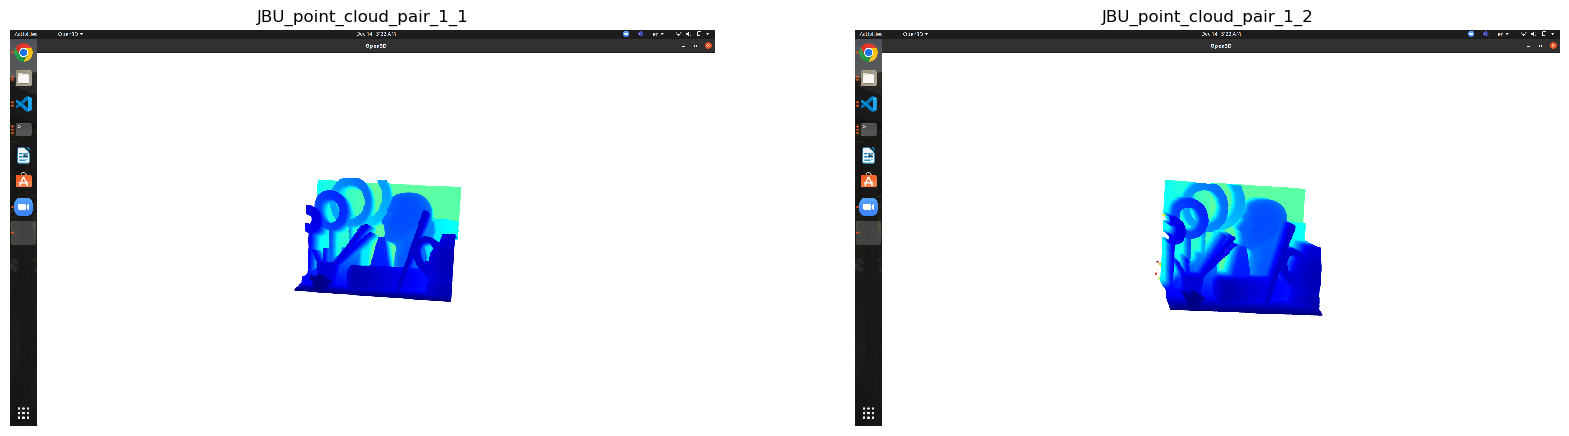

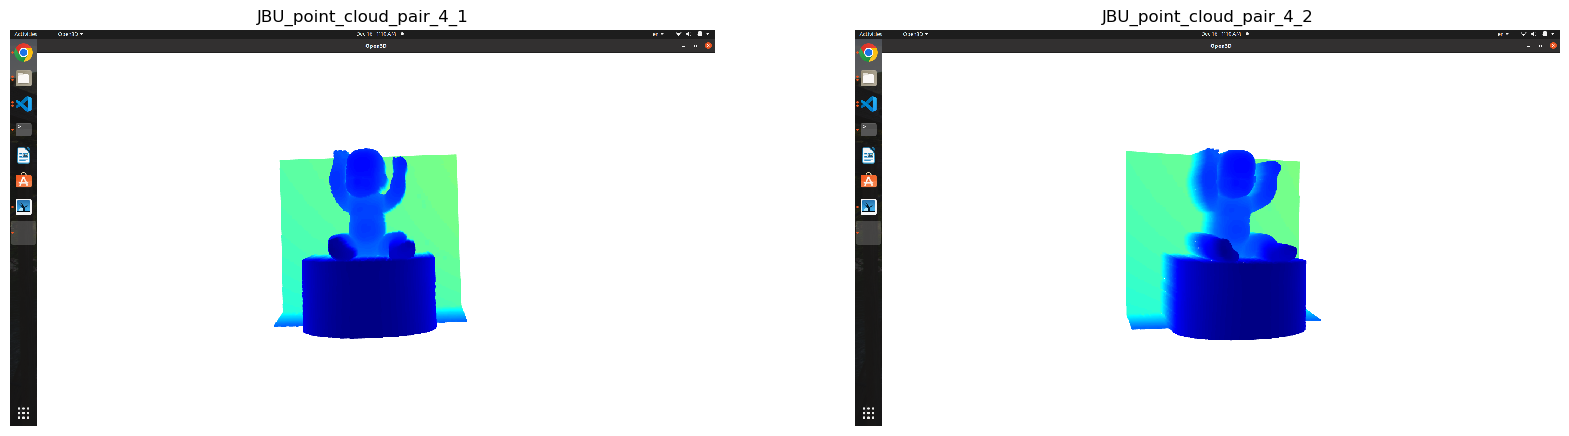

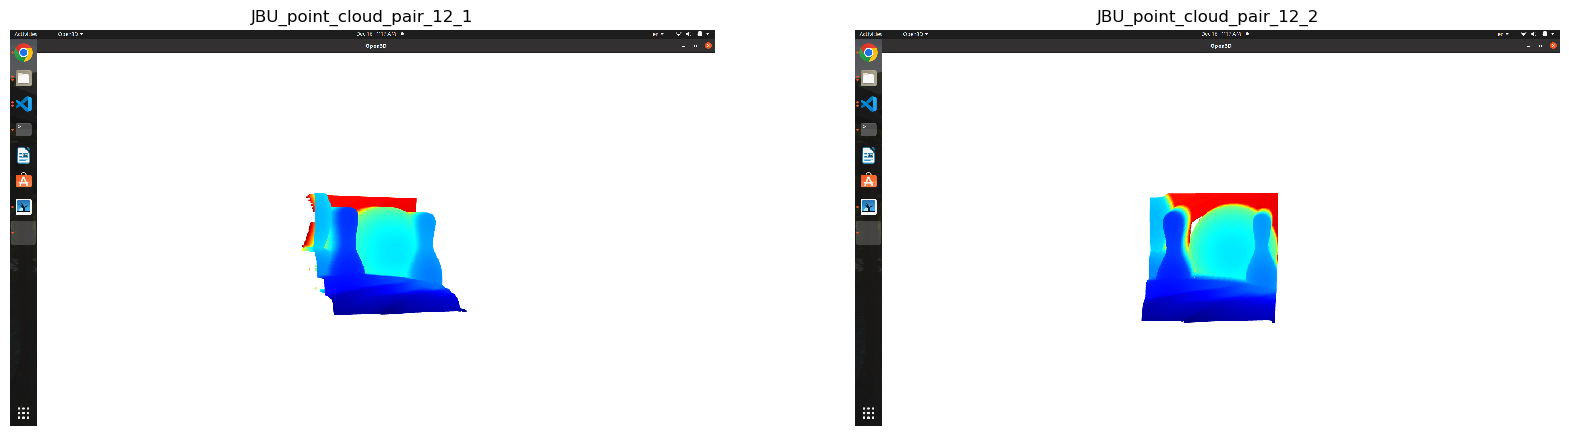

In [27]:
## Pair 1 
pc_1_1=cv2.imread("../dataset/pair_1/results/point_clouds_normals_JBU/point_cloud_1.png")
pc_1_2=cv2.imread("../dataset/pair_1/results/point_clouds_normals_JBU/point_cloud_2.png")

f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(pc_1_1,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_point_cloud_pair_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(pc_1_2,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_point_cloud_pair_1', fontsize=12)


## Pair 4 
pc_4_1=cv2.imread("../dataset/pair_4/results/point_clouds_normals_JBU/point_cloud_1.png")
pc_4_2=cv2.imread("../dataset/pair_4/results/point_clouds_normals_JBU/point_cloud_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(pc_4_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_point_cloud_pair_4', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(pc_4_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_point_cloud_pair_4', fontsize=12)

## Pair 12
pc_12_1=cv2.imread("../dataset/pair_12/results/point_clouds_normals_JBU/point_cloud_1.png")
pc_12_2=cv2.imread("../dataset/pair_12/results/point_clouds_normals_JBU/point_cloud_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(pc_12_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_point_cloud_pair_12', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(pc_12_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_point_cloud_pair_12', fontsize=12)


## 3D_Point Cloud Visualization for IU

Text(0.5, 1.0, 'IU_point_cloud_pair_12_2')

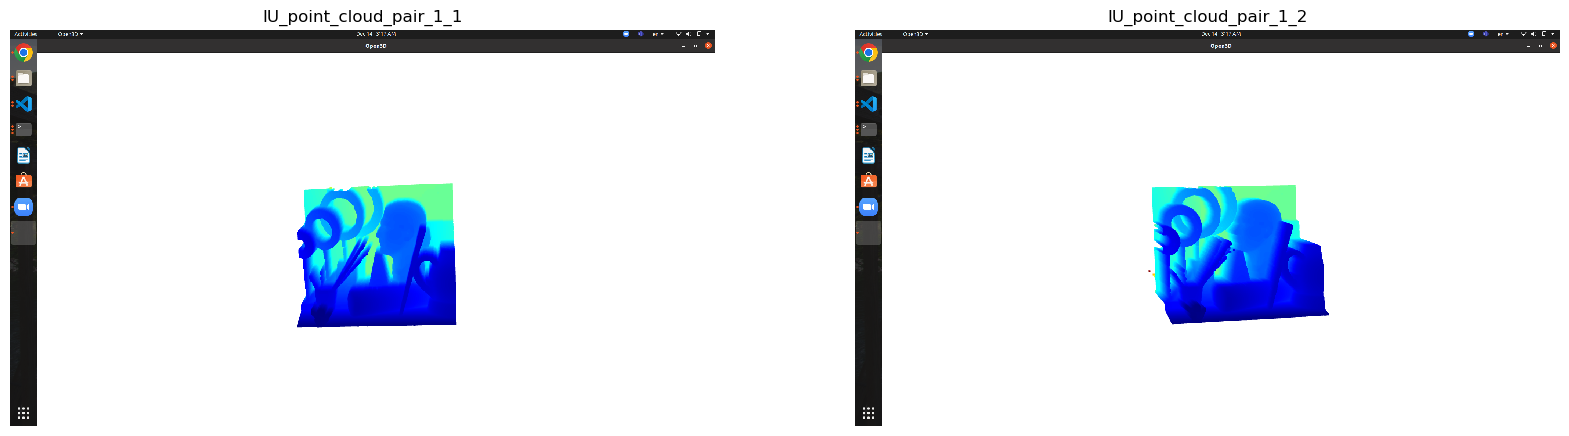

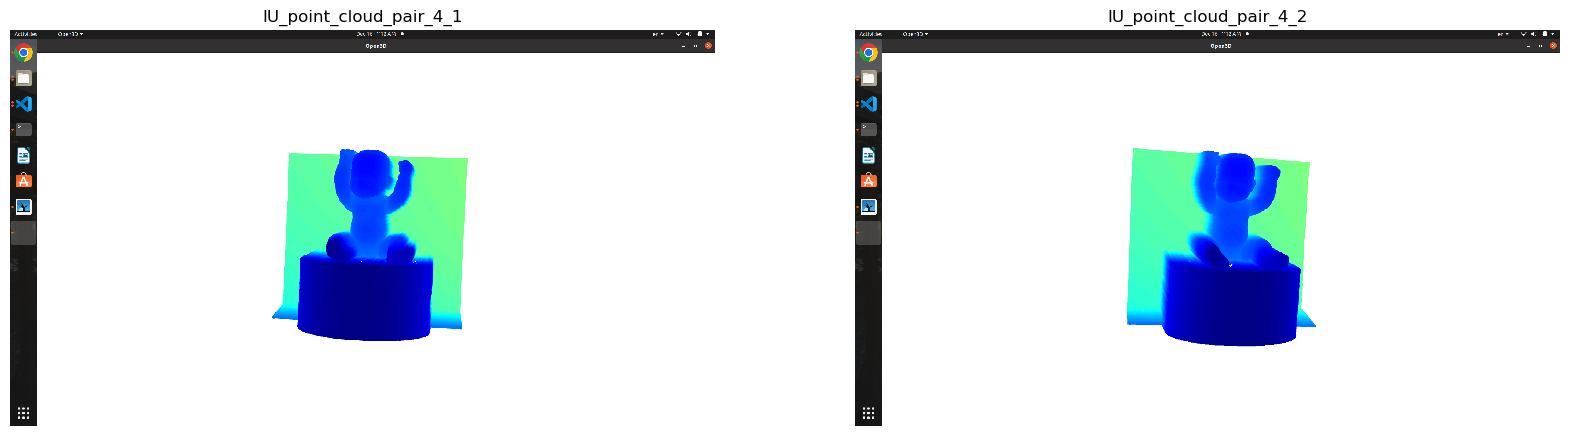

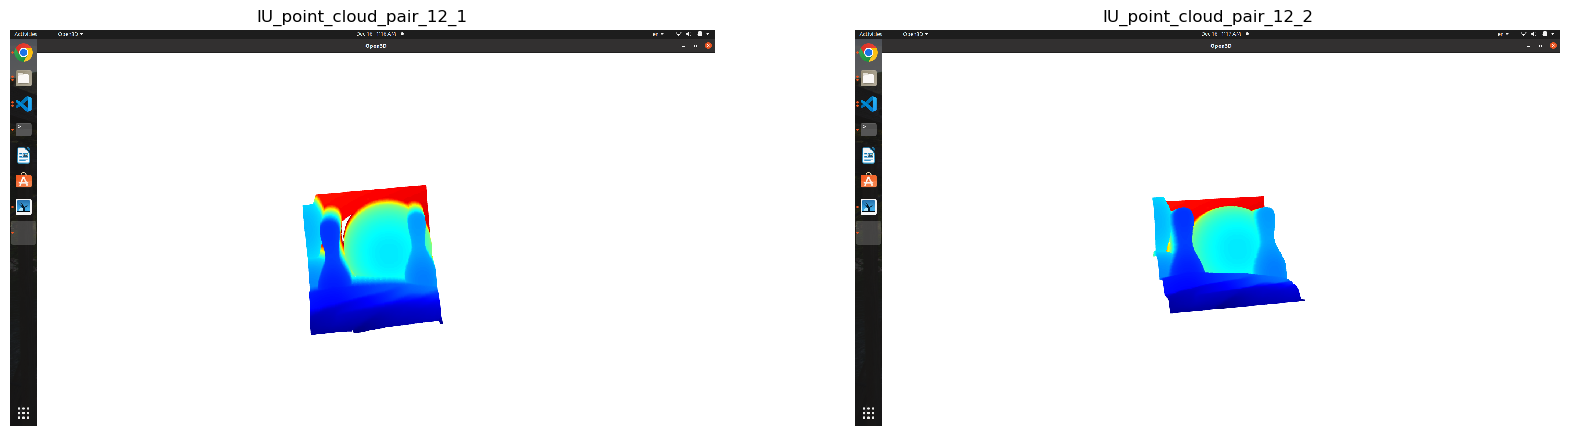

In [28]:
## Pair 1 
pc_1_1=cv2.imread("../dataset/pair_1/results/point_clouds_normals_IU/point_cloud_1.png")
pc_1_2=cv2.imread("../dataset/pair_1/results/point_clouds_normals_IU/point_cloud_2.png")

f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(pc_1_1,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_point_cloud_pair_1_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(pc_1_2,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_point_cloud_pair_1_2', fontsize=12)


## Pair 4 
pc_4_1=cv2.imread("../dataset/pair_4/results/point_clouds_normals_IU/point_cloud_1.png")
pc_4_2=cv2.imread("../dataset/pair_4/results/point_clouds_normals_IU/point_cloud_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(pc_4_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_point_cloud_pair_4_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(pc_4_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_point_cloud_pair_4_2', fontsize=12)

## Pair 12
pc_12_1=cv2.imread("../dataset/pair_12/results/point_clouds_normals_IU/point_cloud_1.png")
pc_12_2=cv2.imread("../dataset/pair_12/results/point_clouds_normals_IU/point_cloud_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(pc_12_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_point_cloud_pair_12_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(pc_12_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_point_cloud_pair_12_2', fontsize=12)


## Surface Normal Visulization for JBU

Text(0.5, 1.0, 'JBU_Normals_pair_12_2')

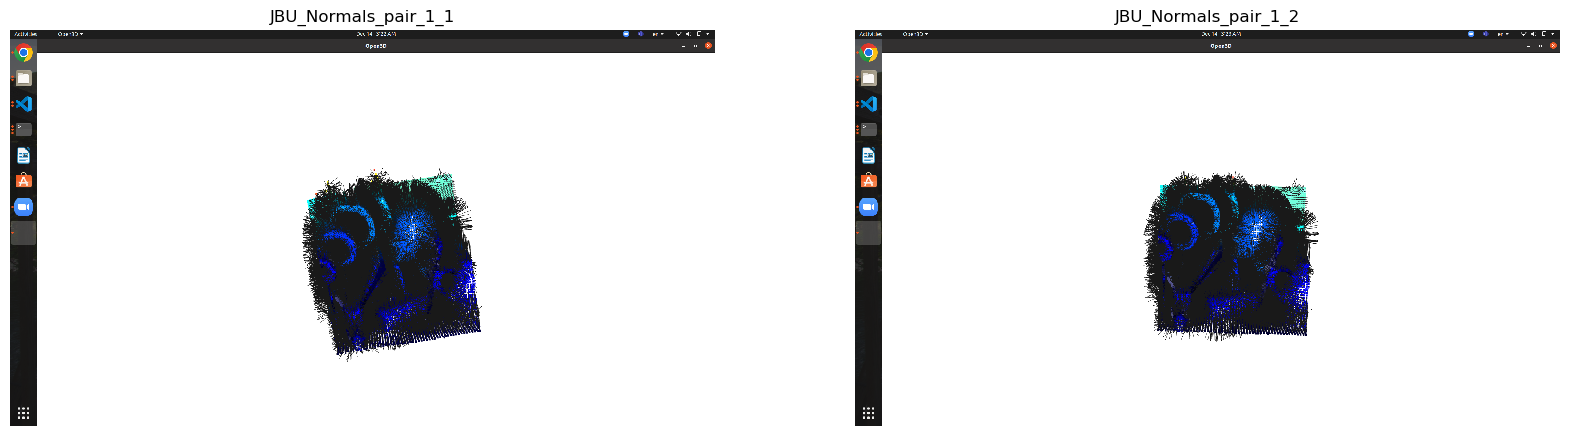

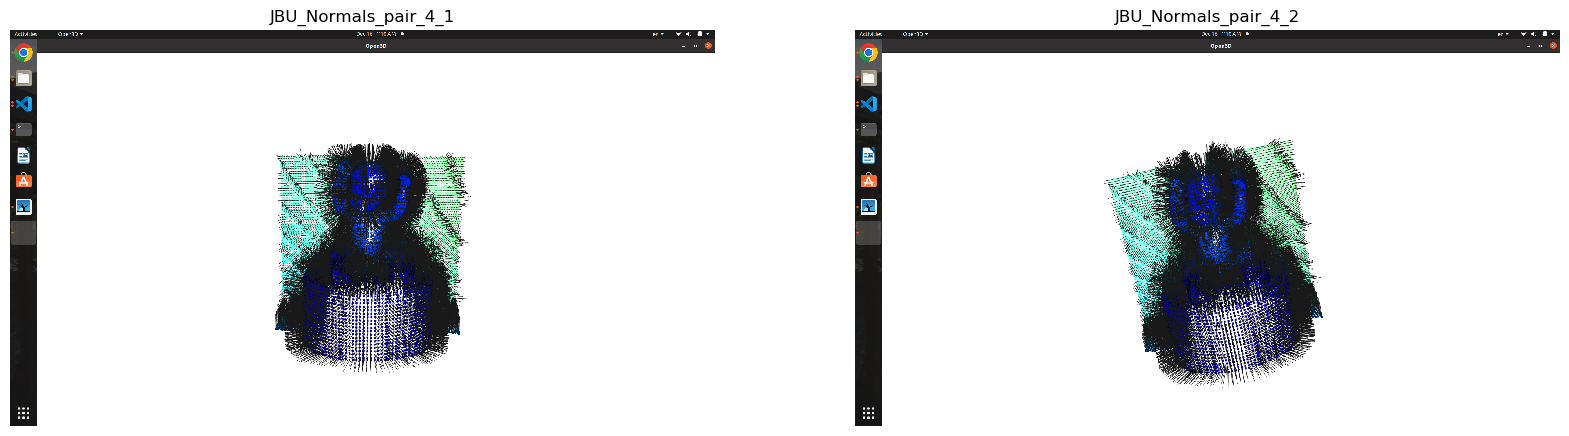

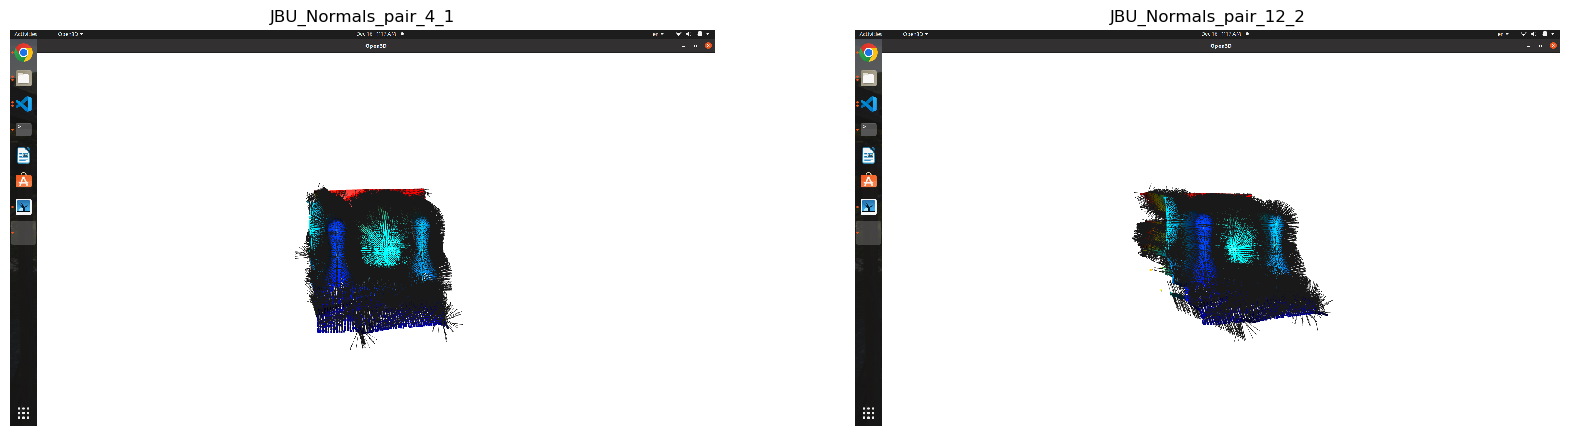

In [29]:
## Pair 1 
normals_1_1=cv2.imread("../dataset/pair_1/results/point_clouds_normals_JBU/normals_1.png")
normals_1_2=cv2.imread("../dataset/pair_1/results/point_clouds_normals_JBU/normals_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(normals_1_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_Normals_pair_1_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(normals_1_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_Normals_pair_1_2', fontsize=12)

## Pair 4 
normals_4_1=cv2.imread("../dataset/pair_4/results/point_clouds_normals_JBU/normals_1.png")
normals_4_2=cv2.imread("../dataset/pair_4/results/point_clouds_normals_JBU/normals_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(normals_4_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_Normals_pair_4_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(normals_4_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_Normals_pair_4_2', fontsize=12)


## Pair 12
normals_12_1=cv2.imread("../dataset/pair_12/results/point_clouds_normals_JBU/normals_1.png")
normals_12_2=cv2.imread("../dataset/pair_12/results/point_clouds_normals_JBU/normals_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(normals_12_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_Normals_pair_4_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(normals_12_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('JBU_Normals_pair_12_2', fontsize=12)

## Surface Normal Visulization for IU

Text(0.5, 1.0, 'IU_Normals_pair_12_2')

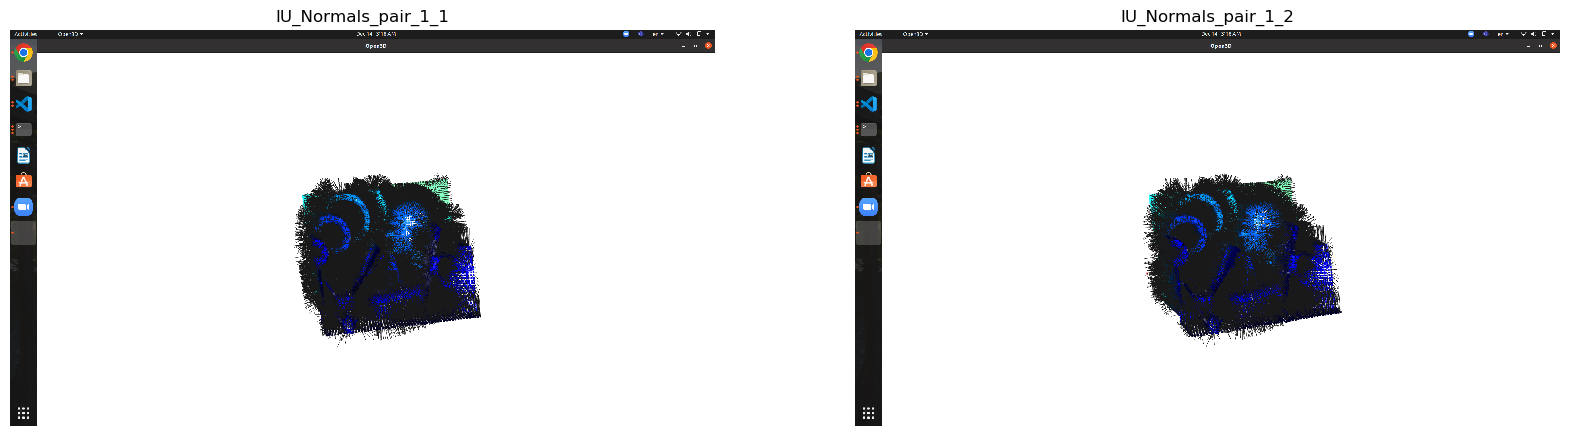

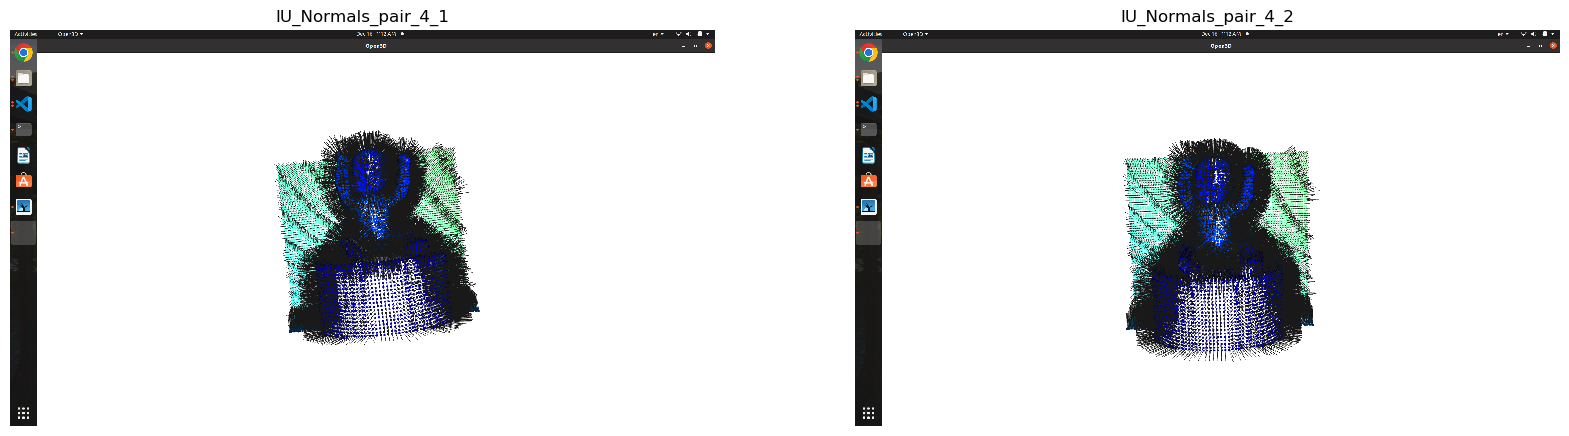

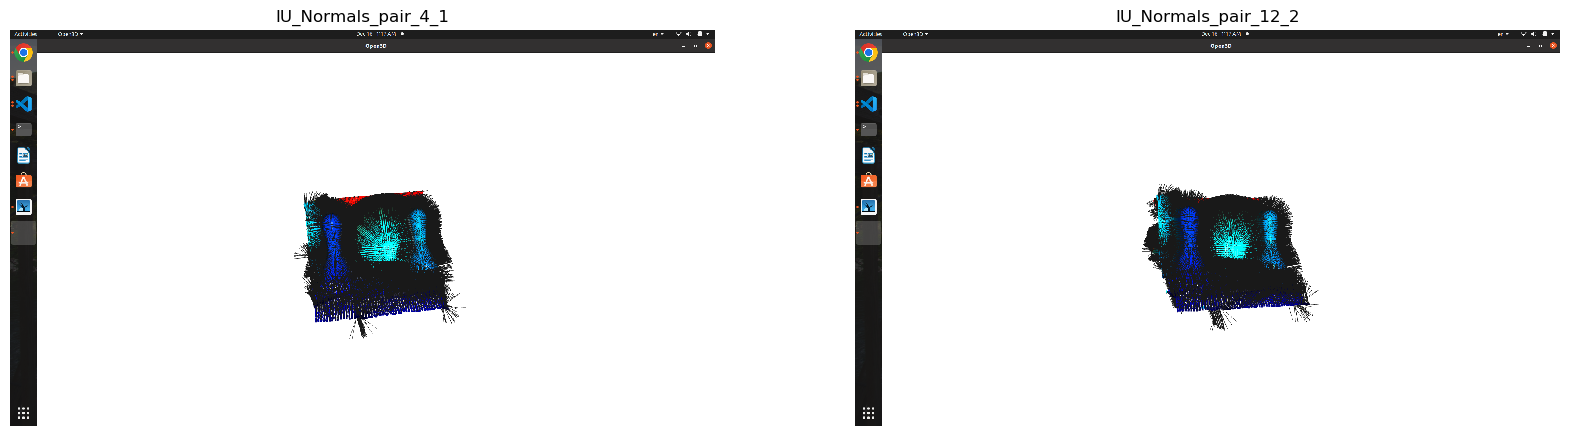

In [30]:
## Pair 1 
normals_1_1=cv2.imread("../dataset/pair_1/results/point_clouds_normals_IU/normals_1.png")
normals_1_2=cv2.imread("../dataset/pair_1/results/point_clouds_normals_IU/normals_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(normals_1_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_Normals_pair_1_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(normals_1_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_Normals_pair_1_2', fontsize=12)

## Pair 4 
normals_4_1=cv2.imread("../dataset/pair_4/results/point_clouds_normals_IU/normals_1.png")
normals_4_2=cv2.imread("../dataset/pair_4/results/point_clouds_normals_IU/normals_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(normals_4_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_Normals_pair_4_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(normals_4_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_Normals_pair_4_2', fontsize=12)


## Pair 12
normals_12_1=cv2.imread("../dataset/pair_12/results/point_clouds_normals_IU/normals_1.png")
normals_12_2=cv2.imread("../dataset/pair_12/results/point_clouds_normals_IU/normals_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(normals_12_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_Normals_pair_4_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(normals_12_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('IU_Normals_pair_12_2', fontsize=12)